In [1]:
# import packages
import glob
from pathlib import Path
import scipy.stats
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pathos.threading import ThreadPool as Pool
from scipy.stats import gaussian_kde
import xarray as xr
from matplotlib import cm
import matplotlib
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from f_sr_calculation import *

In [4]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")

In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [6]:
#colors
a = 255/255
b = 220/255
c = 201/255
d = 133/255
e = 85/255
f = 70/255
g = 46/255

c1 = (e,0,0)
c2 = (c,0,0)
c3 = (a,g,0)
c4 = (a,d,0)
c5 = (a,b,0)
c6 = (a,a,f)
c7 = (f,a,a)
c8 = (0,b,a)
c9 = (0,d,a)
c10 = (0,g,a)
c11 = (0,0,c)
c12 = (0,0,e)

colors=[c12,c11,c10,c9,c8,c7,c6,c5,c4,c3,c2,c1]
cm_col = ListedColormap(colors)

In [7]:
c1 = '#4059AD'
c2 = '#6B9AC4'
c3 = '#F4B942'
c4 = '#97D8C4'

c1 = '#D81B60'
c2 = '#1E88E5'
c3 = '#FFC107'

In [8]:
from matplotlib.colors import LinearSegmentedColormap
colors2 =['white','white','white']
cmap_white = LinearSegmentedColormap.from_list('cm',colors2, N=3)
colors =['gainsboro','none']
cmap_grey2 = LinearSegmentedColormap.from_list('cm',colors, N=2)
colors =['gainsboro','gainsboro','gainsboro']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

colors =['whitesmoke','whitesmoke','whitesmoke']
cmap_whitesmoke = LinearSegmentedColormap.from_list('cm',colors, N=3)

In [9]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

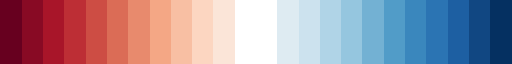

In [10]:
cmap = cm.get_cmap('RdBu', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list[11] = '#ffffff'
color_list[12] = '#ffffff'
cmap_rdbu = ListedColormap(color_list)
cmap_rdbu

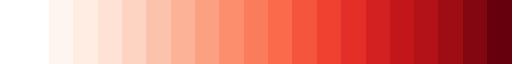

In [11]:
cmap = cm.get_cmap('Reds', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_rd = ListedColormap(color_list2)
cmap_rd

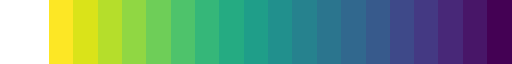

In [12]:
cmap = cm.get_cmap('viridis_r', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_vd = ListedColormap(color_list2)
cmap_vd

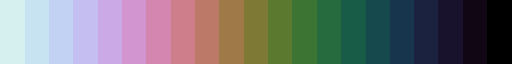

In [13]:
cmap = cm.get_cmap('cubehelix_r', 23)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
# color_list2.append('#ffffff')
# color_list2.append('#ffffff')
for i in np.arange(2,23,1):
    color_list2.append(color_list[i])
cmap_ch = ListedColormap(color_list2)
cmap_ch

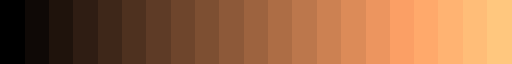

In [14]:
cmap_cv = cm.get_cmap('cividis_r', 19)
cmap_wi = cm.get_cmap('winter', 21)
cmap_cp = cm.get_cmap('copper', 21)
cmap_vd2 = cm.get_cmap('viridis_r', 21)
cmap_cp

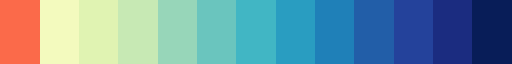

In [15]:
cmap = cm.get_cmap('YlGnBu', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#fb6a4a')
# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff


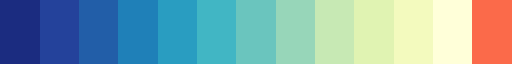

In [16]:
cmap = cm.get_cmap('YlGnBu_r', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []

# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
color_list2.append('#fb6a4a')
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff

In [17]:
colors =['white','white','white']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

## 1. IWU VS IRRIGATED AREA FRACTION

In [69]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
df = df[df.ir_mean>0]
ir = df.ir_mean
ar = df.area
# ir = ir[ir>0]
ir

br_0001850    0.010953
ca_0003156    0.000405
br_0001299    0.001512
br_0001843    0.009222
no_0000086    0.003097
                ...   
ca_0001384    0.000010
us_0001647    0.000995
gb_0000044    0.006207
br_0000392    0.002335
fr_0000694    0.006431
Name: ir_mean, Length: 7128, dtype: float64

In [70]:
# IWU IRRIGATION DATA
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
iwu = iwu['iwu_mean_mmday']
iwu = iwu[ir.index]

1.4468973547771928 0.002193102160509188
0.02579407705643864


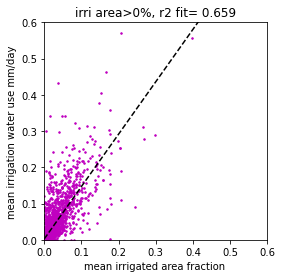

In [71]:
x = ir
y = iwu

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,0.6,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area fraction ')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>0%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)
print(slope,intercept)
rmse = np.sqrt(np.mean((x-y)**2))
print(rmse)

1.2440031569836061e-05 0.01449024164381351


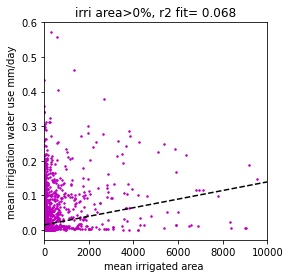

In [41]:
x = ir * ar
y = iwu

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,10000,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area ')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>0%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,10000)
# ax.set_ylim(0,0.6)
print(slope,intercept)

0.9898083935461724 0.00399059582576561


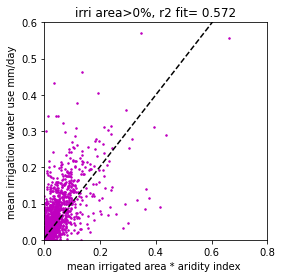

In [53]:
df = df[df.ai>0]
x = df.ir_mean * df.ai
y = iwu[df.index]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,3,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area * aridity index ')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>0%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.6)
print(slope,intercept)

In [38]:
df = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
df

ei        ec        hi        hc
de_0000778  0.000009  0.000009  0.000007  0.000007
br_0001850  0.015233  0.015508  0.015233  0.015233
ca_0003156  0.000907  0.001238  0.001189  0.000907
br_0001299  0.006525  0.006664  0.006525  0.006525
br_0001843  0.017082  0.017370  0.017082  0.017082
...              ...       ...       ...       ...
ca_0001384  0.000035  0.000100  0.000077  0.000035
us_0001647  0.001276  0.001963  0.001346  0.001276
gb_0000044  0.018554  0.018554  0.018554  0.018554
br_0000392  0.003677  0.003732  0.004089  0.004089
fr_0000694  0.018735  0.019200  0.018775  0.018685

[8658 rows x 4 columns]

0.7351182735402062 0.001899349144288966
0.026280231527594376


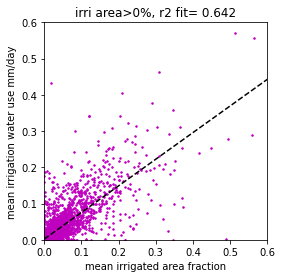

In [68]:
x = df.hi[iwu.index]
x = x.dropna()
y = iwu[x.index]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,3,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area fraction')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>0%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)
print(slope,intercept)
rmse = np.sqrt(np.mean((x-y)**2))
print(rmse)

In [62]:
df

ei        ec        hi        hc
de_0000778  0.000009  0.000009  0.000007  0.000007
br_0001850  0.015233  0.015508  0.015233  0.015233
ca_0003156  0.000907  0.001238  0.001189  0.000907
br_0001299  0.006525  0.006664  0.006525  0.006525
br_0001843  0.017082  0.017370  0.017082  0.017082
...              ...       ...       ...       ...
ca_0001384  0.000035  0.000100  0.000077  0.000035
us_0001647  0.001276  0.001963  0.001346  0.001276
gb_0000044  0.018554  0.018554  0.018554  0.018554
br_0000392  0.003677  0.003732  0.004089  0.004089
fr_0000694  0.018735  0.019200  0.018775  0.018685

[7679 rows x 4 columns]

In [61]:
y

br_0001850    0.009453
ca_0003156    0.000056
br_0001299    0.002138
br_0001843    0.009306
no_0000086    0.001348
                ...   
ca_0001384    0.000000
us_0001647    0.000000
gb_0000044    0.001495
br_0000392    0.001584
fr_0000694    0.013255
Name: iwu_mean_mmday, Length: 7128, dtype: float64

## 2. WHERE IRRIGATION AND HOW MUCH?
Use GSIM irrigation data for catchments

In [49]:
df2 = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
# ir = df.ir_mean
# ira = df.ir_mean * df.area

df = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = df.hi
ira = df.hi * df2.area

In [50]:
# make list of catchments with > 5% irrigation
df = df[df.ir_mean>0.05]
c = df.index.values
np.savetxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',c,fmt='%s')

AttributeError: 'DataFrame' object has no attribute 'ir_mean'

In [51]:
# IWU IRRIGATION DATA
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
df2 = pd.concat([df,iwu],axis=1)
df2['iwu_mean_mmyear']=df2['iwu_mean_mmday']*365

Text(0.5, 0.98, 'Mean irrigation water use (mm/year)')

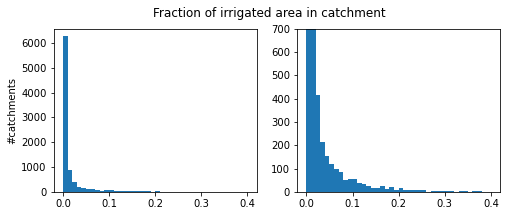

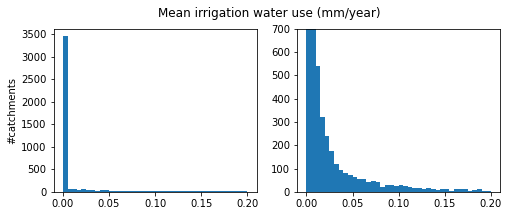

In [52]:
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.4,41)
ax = fig.add_subplot(121)
ax.hist(ir,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Fraction of irrigated area in catchment')

# histogram of IWU data
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.2,41)
ax = fig.add_subplot(121)
ax.hist(df2.iwu_mean_mmyear,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Mean irrigation water use (mm/year)')

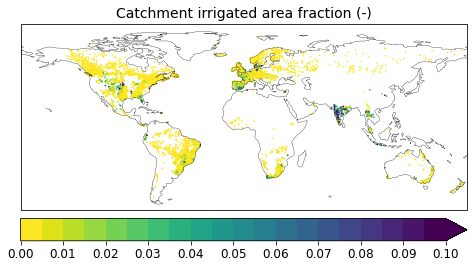

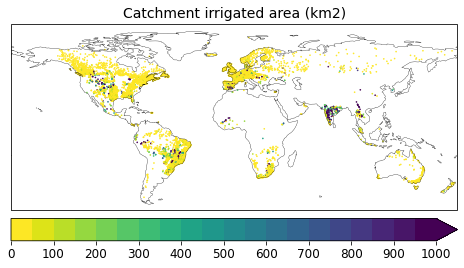

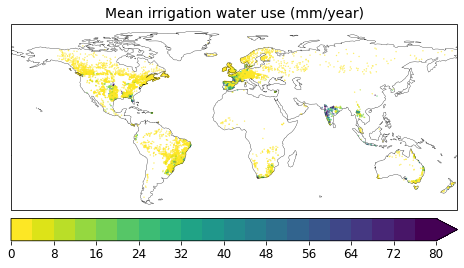

In [54]:
cmap = plt.cm.viridis_r  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# IA
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.4,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Irrigated area fraction (-)',size=12)
ax.set_title(f'Catchment irrigated area fraction (-)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_irri_area_fraction.jpg',dpi=200,bbox_inches='tight')


cmap = plt.cm.viridis_r  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1000,21)
bounds2 = np.linspace(0,1000,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# IA * AREA
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=ira,s=0.4,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Irrigated area (km2)',size=12)
ax.set_title(f'Catchment irrigated area (km2)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_irri_area.jpg',dpi=200,bbox_inches='tight')


cmap = plt.cm.viridis_r  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,80,21)
bounds2 = np.linspace(0,80,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Irrigated area (km2)',size=12)
ax.set_title(f'Mean irrigation water use (mm/year)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_mean_iwu.jpg',dpi=200,bbox_inches='tight')


## GRIDDED MAP IA AND IWU

In [218]:
iwu = xr.open_dataset(f'{work_dir}/data/IWU_irri_data/IWU_2011_2018_setyear.nc')

In [219]:
# from monthly mean values to mm/day and mm/year
dm = [31,28,31,30,31,30,31,31,30,31,30,31]
dm = dm*8

l=[]
for i in range(len(iwu.time)):
    p = iwu.IWUens[i,:,:]/dm[i]
    l.append(p)
iwu2 = xr.concat(l,dim='time')

iwu2m = iwu2.mean(dim='time')*365

In [268]:
iwu2m = iwu2m.transpose("lat", "lon")

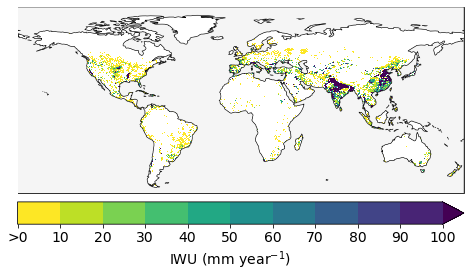

In [284]:
lvls = np.linspace(0,100,11) 
lvls2 = np.linspace(0,100,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = iwu2m.where(iwu2m==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = iwu2m.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','10','20','30','40','50','60','70','80','90','100'])
cbar.set_label(label='IWU ($\mathrm{mm}$ $\mathrm{year}^{-1}$)', size=14)
ax.set_title(f'',size=14)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_mean_iwu_gridded.jpg',dpi=200,bbox_inches='tight')


In [274]:
ia = xr.open_dataset(f'{work_dir}/data/irrigated_area/AEI_HYDE_FINAL_IR_2005_fraction.nc')
ia = ia.AEI_HYDE_FINAL_IR_2005[0,:,:]
ia

<xarray.DataArray 'AEI_HYDE_FINAL_IR_2005' (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2005-01-01
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
  * lat      (lat) float64 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92

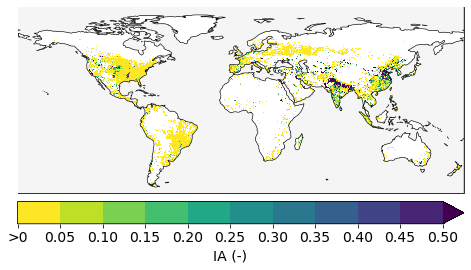

In [282]:
lvls = np.linspace(0,0.5,11) 
lvls2 = np.linspace(0,0.5,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = ia.where(ia==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
cf = ia.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='IA (-)', size=14)
ax.set_title(f'',size=12)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_mean_ia_gridded.jpg',dpi=200,bbox_inches='tight')

## PLOT SD AND SE

In [25]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir[ir>0.1]

in_0000142    0.173791
fr_0000889    0.128895
in_0000134    0.205674
in_0000064    0.115653
us_0002035    0.134372
                ...   
de_0000056    0.243320
de_0000251    0.206805
in_0000274    0.116337
us_0005144    0.204863
in_0000251    0.138393
Name: ir_mean, Length: 88, dtype: float64

Text(0.5, 1.0, 'catchment id: de_0000055')

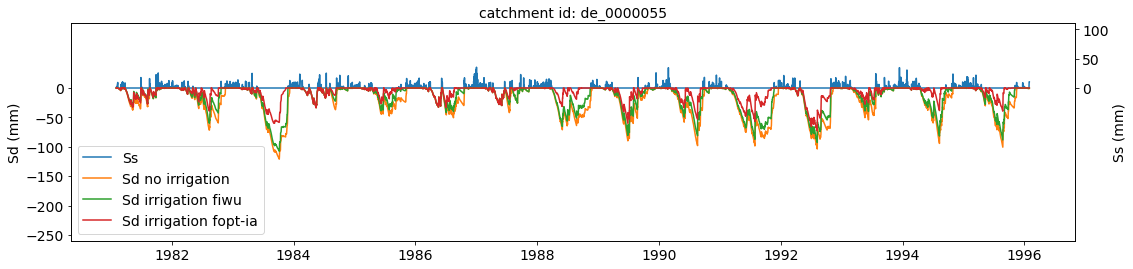

In [77]:
# catch_id = 'in_0000134'
# catch_id = 'de_0000251'
catch_id = 'de_0000055'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.85ia/sd/{catch_id}_f1.85ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)

# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_fiwu2.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)

fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(sd_fiwu.index,sd_fiwu.se2, label='Ss')
ax.plot(sd_f0.index,sd_f0.Sd, label='Sd no irrigation')
ax.plot(sd_fiwu.index,sd_fiwu.sd2, label='Sd irrigation fiwu')
ax.plot(sd_fopt.index,sd_fopt.sd2, label='Sd irrigation fopt-ia')
ax.set_yticks([0,-50,-100,-150,-200,-250])
ax2.set_yticks([0,50,100])
ax.set_ylim(-260,110)
ax2.set_ylim(-260,110)
ax.set_ylabel('Sd (mm)', size=14)
ax2.set_ylabel('Ss (mm)', size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

ax.legend(fontsize=14)
ax.set_title(f'catchment id: {catch_id}',size=14)
# fig.savefig(f'{work_dir}/output/figures/irrigation/sd_ss_timeseries.jpg',dpi=200,bbox_inches='tight')


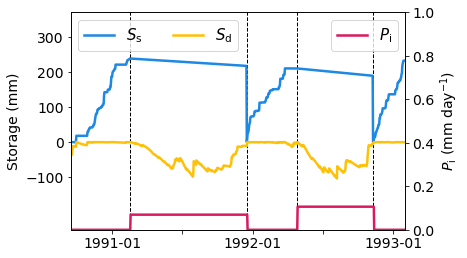

In [200]:
sd_fiwu2 = sd_fiwu.loc['1990-09-01':'1993-03-31']
sd_fiwu3 = sd_fiwu.loc['1990-09-01':'1993-03-31']
# sd_fiwu2 = sd_fiwu.loc['2005-01-01':'2006-12-31']
sd_fiwu2.index = pd.to_datetime(sd_fiwu2.index)
b1 = sd_fiwu.loc['2004-11-19':'2005-12-15'].se2.cumsum()
b2 = sd_fiwu.loc['2005-12-15':'2006-12-29'].se2.cumsum()
b3 = sd_fiwu.loc['2006-12-29':'2007-02-28'].se2.cumsum()
b4 = pd.concat([b1,b2,b3])
# b.index = b['index']
# b.loc['2005-12-15':'2005-12-31'].se2 = [b.loc['2005-06-30'].values[1]]*17
# b.se2.plot()

sd_fiwu.p_irri.loc['1990-09-10':'1990-09-30']= np.zeros(21)

# add irrigation Ss decline in Se-cum variable for the two irrigation periods
sd_fiwu4 = sd_fiwu3.loc['1991-02-16':'1991-12-17']
ini = sd_fiwu4.loc['1991-02-16'].se_cum
rate = sd_fiwu4.loc['1991-02-18'].p_irri
se_cum2=np.zeros(len(sd_fiwu4))
for i in range(len(sd_fiwu4)-1):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu4['se_cum2'] = se_cum2
sd_fiwu3['se_cum2'] = sd_fiwu3['se_cum']
sd_fiwu3.loc['1991-02-16':'1991-12-17']['se_cum2'] = sd_fiwu4['se_cum2']

sd_fiwu5 = sd_fiwu3.loc['1992-04-25':'1992-11-10']
ini = sd_fiwu5.loc['1992-04-25'].se_cum
rate = sd_fiwu5.loc['1992-04-27'].p_irri
se_cum2=np.zeros(len(sd_fiwu5))
for i in range(len(sd_fiwu5)-2):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu5['se_cum2'] = se_cum2
sd_fiwu3.loc['1992-04-26':'1992-11-10']['se_cum2'] = sd_fiwu5['se_cum2']


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.vlines(pd.to_datetime('1992-04-26'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1992-11-10'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-02-16'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-12-17'),-400,400,color='k',linestyle='--',linewidth=1)
# ax.plot(sd_fiwu.index,sd_fiwu.se2, label='$S_{\mathrm{s}$')
# ax.plot(b1.index, b1, color='tab:blue',linewidth=2.5, label='$S_{\mathrm{s}}$')
# ax.plot(b2.index, b2, color='tab:blue',linewidth=2.5)
# ax.plot(b3.index, b3, color='tab:blue',linewidth=2.5)
# ax.plot(b4.index, b4, color=c1, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu3.index,sd_fiwu3['se_cum2'], color=c2, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu.index,sd_fiwu.Sd, color=c3, linewidth=2.5,label='$S_{\mathrm{d}}$')
ax2.plot(sd_fiwu2.index,sd_fiwu2.p_irri, color=c1, linewidth=2.5,label='$P_{\mathrm{i}}$')
ax.set_yticks([-100,0,100,200,300])
    # 50,100,150,200,250,0,-50,-100,-150,-200,-250])
# ax2.set_yticks([0,50,100,150,200,250])
ax.set_ylim(-250,370)
ax2.set_ylim(0,1)
# ax.set_xlim(pd.to_datetime('1988-11-25'),pd.to_datetime('1990-12-15'))
ax.set_xlim(pd.to_datetime('1990-09-15'),pd.to_datetime('1993-02-01'))
ax.set_xticks(['1991-01-01','1991-07-01','1992-01-01','1992-07-01','1993-01-01'])
ax.set_xticklabels(['1991-01','','1992-01','','1993-01'])


# ax.set_xlim(pd.to_datetime('2004-11-19'),pd.to_datetime('2007-02-28'))
# ax.set_xticks(['2005-01-01','2005-07-01','2006-01-01','2006-07-01','2007-01-01'])
# ax.set_xticklabels(['2005-01','','2006-01','','2007-01'])
# ax.set_xlim('1992-01-01','1994-11-20')
# ax.set_xlim('1995-08-01','1998-08-01')
ax.set_ylabel('Storage (mm)', size=14)
ax2.set_ylabel('$P_{\mathrm{i}}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)', size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax.legend(ncol=2, fontsize=15,loc='upper left')
ax2.legend(ncol=1, fontsize=15,loc='upper right')
fig.savefig(f'{work_dir}/output/figures/irrigation/sd_ss_timeseries_zoom.jpg',dpi=200,bbox_inches='tight')


Text(0.5, 1.0, 'catchment id: in_0000134, $\\mathrm{IWU}_{\\mathrm{mean}}$ = 67 $\\mathrm{mm}$ $\\mathrm{year}^{-1}$, IA = 0.27')

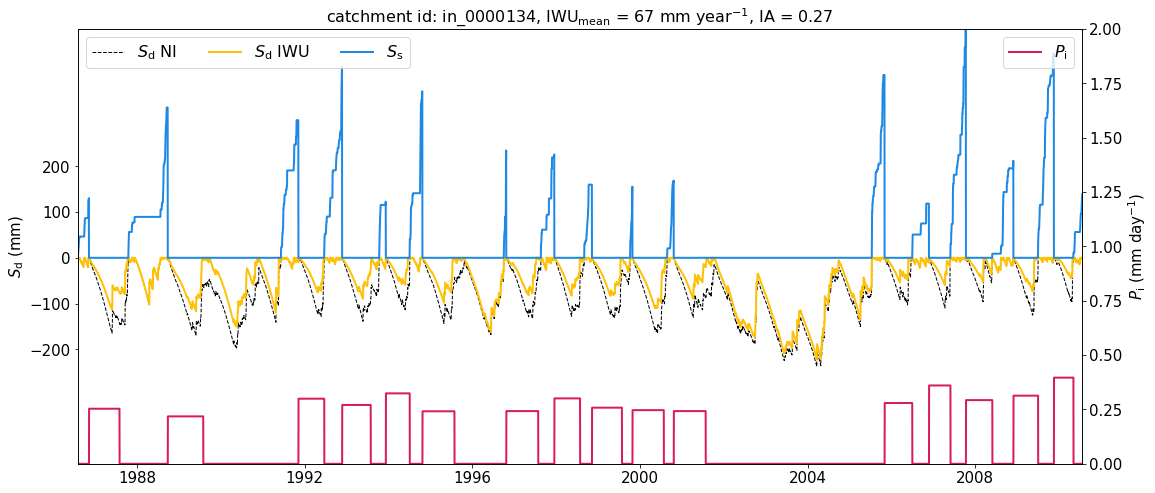

In [205]:
catch_id = 'in_0000134'
# catch_id = 'de_0000251'
# catch_id = 'de_0000056'
# catch_id = 'de_0000664'
# catch_id = 'de_0000054'
# catch_id = 'fr_0000863'
# catch_id = 'in_0000196'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 


fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='--', label='$S_\mathrm{d}$ NI',linewidth=1)
ax.plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='$S_\mathrm{d}$ IWU',linewidth=2)
# ax.plot(sd_fopt.index,sd_fopt.sd2, label='$S_\mathrm{d}$ IA',linewidth=2)
ax.plot(sd_fiwu.index,sd_fiwu.se_cum, color=c2, label='$S_\mathrm{s}$',linewidth=2)
ax2.plot(sd_fiwu.index,sd_fiwu.p_irri, color=c1, label='$P_\mathrm{i}$',linewidth=2)
ax.set_xlim(sd_fopt.index[0],sd_fopt.index[-10])

ax.set_yticks([-200,-100,0,100,200])
# ax2.set_yticks([0,50,100])
ax.set_ylim(-450,500)
ax2.set_ylim(0,2)
ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax2.set_ylabel('$P_{\mathrm{i}}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)', size=15)
ax.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

ax.legend(ncol=3, fontsize=16, loc='upper left')
ax2.legend(ncol=1, fontsize=16, loc='upper right')
ax.set_title('catchment id: '+str(catch_id)+', $\mathrm{IWU}_{\mathrm{mean}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$, IA = '+str(ir_area),size=16)

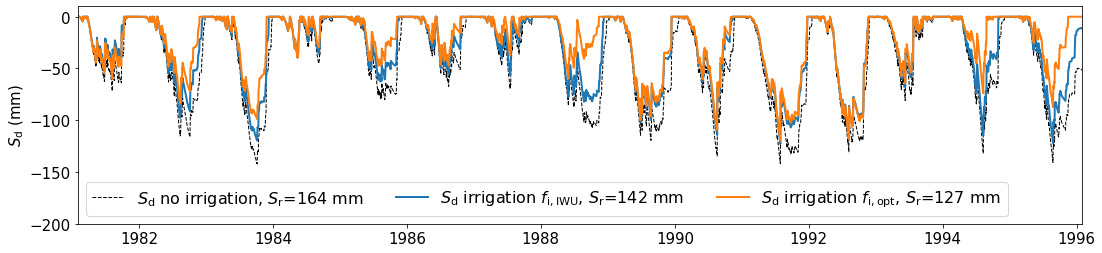

In [75]:
# catch_id = 'in_0000134'
catch_id = 'de_0000251'
# catch_id = 'de_0000056'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)
sr_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{catch_id}.csv',index_col=0)
sr_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{catch_id}_fiwu2.csv',index_col=0)
sr_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{catch_id}_f0.9ia.csv',index_col=0)
sr_f0 = int(sr_f0['20'].values[0])
sr_fiwu = int(sr_fiwu['20'].values[0])
sr_fopt = int(sr_fopt['20'].values[0])

se = sd_fopt.se2
se_cum=[]
for i in range(1,len(se_fopt)):
    start = se_fopt.start_date_se[i-1]
    end = se_fopt.start_date_se[i]
    # end = se_fopt.end_date_irri[i]
    se0 = se[start:end]
    se0 = se0.cumsum()
    se_cum.append(se0)
se_c = pd.concat(se_cum)

# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/se/{catch_id}_fiwu.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)

fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()

# ax.plot(se_c.index,se_c, label='Ss')
ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='--', label='$S_\mathrm{d}$ no irrigation, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax.plot(sd_fiwu.index,sd_fiwu.sd2, label='$S_\mathrm{d}$ irrigation $f_{\mathrm{i,IWU}}$, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=2)
ax.plot(sd_fopt.index,sd_fopt.sd2, label='$S_\mathrm{d}$ irrigation $f_{\mathrm{i,opt}}$, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=2)
ax.set_xlim(sd_fopt.index[0],sd_fopt.index[-1])

ax.set_yticks([0,-50,-100,-150,-200,-250])
# ax2.set_yticks([0,50,100])
ax.set_ylim(-200,10)
# ax2.set_ylim(-260,110)
ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
# ax2.set_ylabel('Ss (mm)', size=14)
ax.tick_params(axis='both', labelsize=15)
# ax2.tick_params(axis='y', labelsize=14)

ax.legend(ncol=3,fontsize=16)
# ax.set_title(f'',size=14)
# print(sr_f0['20'].values[0])
# fig.savefig(f'{work_dir}/output/figures/irrigation/sd_timeseries_irri.jpg',dpi=200,bbox_inches='tight')


<AxesSubplot:>

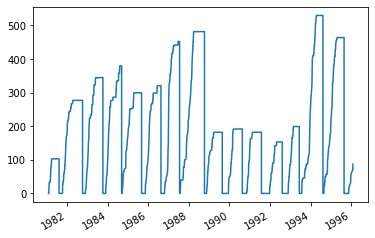

In [47]:
se_c.plot()

## 3. OPTIMIZE F

In [13]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean

In [14]:
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/se/*.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-9] # remove .year extension
    el_id_list.append(f)
print(len(el_id_list))

4603


In [9]:
# get fiwu values for catchments with ia>0, se only written for ia>0, sd for all catchments
f = 'iwu'
fm = []
for catch_id in el_id_list:
    if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/se/{catch_id}_f{f}.csv'):
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/se/{catch_id}_f{f}.csv',index_col=0)
        fmean = d['f'][:-1].mean()
        fm.append(fmean)
print(len(fm))

4603


Text(0.5, 1.0, 'mean:0.026, median:0.001, std:0.062, iqr:0.016')

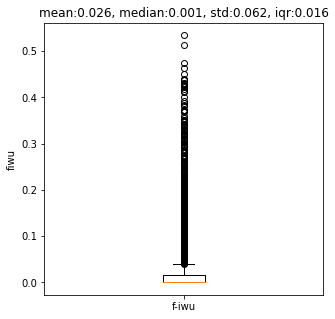

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.boxplot(fm)
ax.set_xticklabels(['f-iwu'])
ax.set_ylabel('fiwu')
fmmean = np.round(np.mean(fm),3)
fmmedian = np.round(np.median(fm),3)
fmstd = np.round(np.std(fm),3)
fmiqr = np.round((np.quantile(fm,0.75) - np.quantile(fm,0.25)),3)
ax.set_title(f'mean:{fmmean}, median:{fmmedian}, std:{fmstd}, iqr:{fmiqr}')

In [11]:
d=pd.DataFrame(index=el_id_list, columns=['fiwu'])
d['fiwu']=fm
d['ia'] = ir
d['fopt'] = d['fiwu']/d['ia']
d.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization.csv')

In [11]:
d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization.csv', index_col=0)
d

fiwu        ia      fopt
de_0000401  0.000000  0.000181  0.000000
es_0000199  0.038658  0.009154  4.223202
br_0000380  0.000447  0.000772  0.579474
es_0000468  0.016736  0.004352  3.845690
at_0000087  0.000000  0.000011  0.000000
...              ...       ...       ...
br_0000469  0.000000  0.000201  0.000000
at_0000174  0.000211  0.000143  1.479125
de_0000123  0.007957  0.025498  0.312084
ca_0004063  0.000000  0.000993  0.000000
de_0000560  0.031323  0.024883  1.258832

[4603 rows x 3 columns]

In [86]:
# MINIMIZE ABSOLUTE ERROR
f_min=0
f_max=4
nmax=10000
A=np.zeros((int(nmax),6))

for n in range(1,int(nmax+1)): 
    Rnum=np.random.rand(1)
    f = f_min+(f_max-f_min)*Rnum

    o = f*d['ia']
    er = o-d['fiwu']
    er_m = er.mean()
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_std,er_med,er_iqr,er_rmse]
    
ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)

ind=np.argmin(A[:,2])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,3],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,5])
fopt_rmse=np.round(A[ind,0],3)

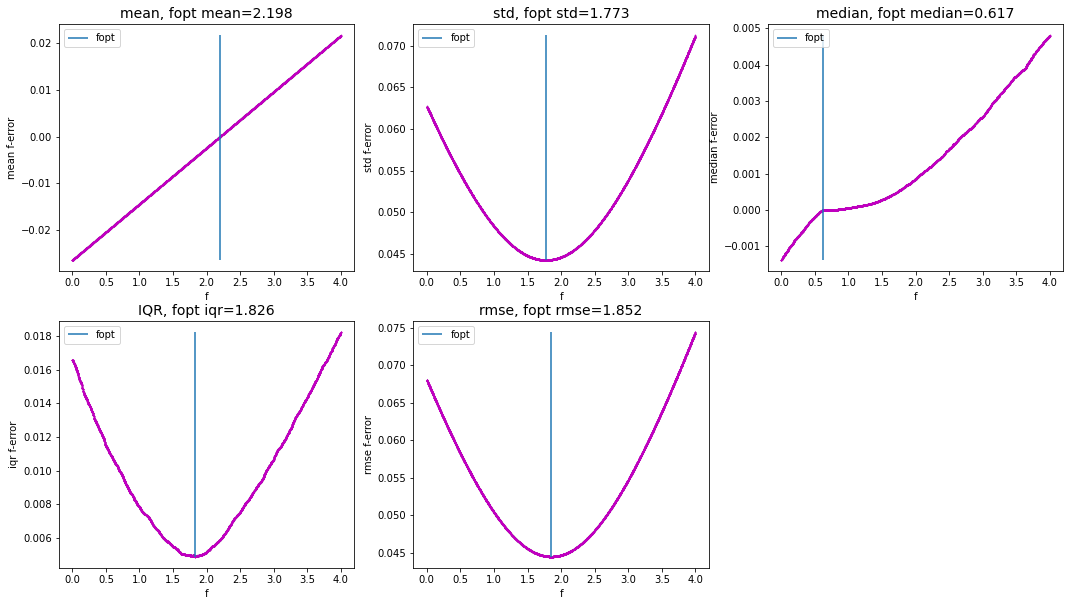

In [87]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
ax.plot(A[:,0], A[:,1],'mo',markersize=0.5)
ax.vlines(fopt_mean,A[:,1].min(),A[:,1].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mean f-error')
ax.set_title(f'mean, fopt mean={fopt_mean}',size=14)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(A[:,0], A[:,2],'mo',markersize=0.5)
ax.vlines(fopt_std,A[:,2].min(),A[:,2].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('std f-error')
ax.set_title(f'std, fopt std={fopt_std}',size=14)
ax.legend()

ax = fig.add_subplot(233)
ax.plot(A[:,0], A[:,3],'mo',markersize=0.5)
ax.vlines(fopt_median,A[:,3].min(),A[:,3].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('median f-error')
ax.set_title(f'median, fopt median={fopt_median}',size=14)
ax.legend()

ax = fig.add_subplot(234)
ax.plot(A[:,0], A[:,4],'mo',markersize=0.5)
ax.vlines(fopt_iqr,A[:,4].min(),A[:,4].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('iqr f-error')
ax.set_title(f'IQR, fopt iqr={fopt_iqr}',size=14)
ax.legend()

ax = fig.add_subplot(235)
ax.plot(A[:,0], A[:,5],'mo',markersize=0.5)
ax.vlines(fopt_rmse,A[:,5].min(),A[:,5].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('rmse f-error')
ax.set_title(f'rmse, fopt rmse={fopt_rmse}',size=14)
ax.legend()

fig.savefig(f'{work_dir}/output/figures/irrigation/optimization/monte_carlo_absdiff.jpg',dpi=300,bbox_inches='tight')

median   mean    std    iqr   rmse
2.198   0.001  0.000  0.046  0.006  0.045
0.617   0.000 -0.019  0.053  0.011  0.056
1.773   0.001 -0.005  0.044  0.005  0.045
1.826   0.001 -0.004  0.044  0.005  0.044
1.852   0.001 -0.004  0.044  0.005  0.044

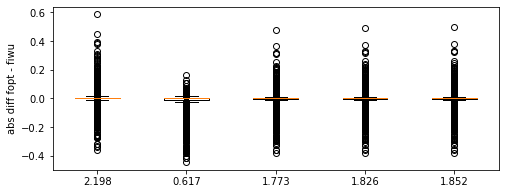

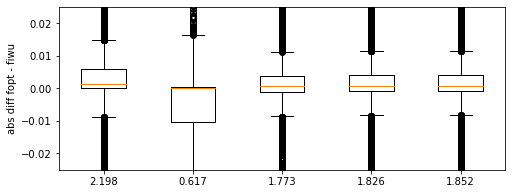

In [88]:
# boxplots
f_array=[fopt_mean,fopt_median,fopt_std,fopt_iqr,fopt_rmse]
f_array_str=[str(fopt_mean),str(fopt_median),str(fopt_std),str(fopt_iqr),str(fopt_rmse)]
df = pd.DataFrame(index=d.index, columns=f_array)

for f in f_array:
    o = f*d['ia']
    er = o-d['fiwu']
    df[f] = er
    
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')
ax.set_ylim(-0.025,0.025)
fig.savefig(f'{work_dir}/output/figures/irrigation/optimization/monte_carlo_absdiff_boxplot.jpg',dpi=300,bbox_inches='tight')

e = pd.DataFrame(index=df.columns)
e['median']=np.round(df.median(),3)
e['mean']=np.round(df.mean(),3)
e['std']=np.round(df.std(),3)
e['iqr'] = np.round((df.quantile(0.75) - df.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((df**2))),3)
e.index = [f_array_str]

e

In [89]:
# MINIMIZE RELATIVE ERROR
f_min=0
f_max=4
nmax=10000
A=np.zeros((int(nmax),6))

for n in range(1,int(nmax+1)): 
    Rnum=np.random.rand(1)
    f = f_min+(f_max-f_min)*Rnum
    o = f*d['ia']
    er = (o-d['fiwu'])/d['fiwu']
    er.replace([np.inf, -np.inf], np.nan, inplace=True)
    er_m = er.mean()
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean(((o-d['fiwu'])/d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_std,er_med,er_iqr,er_rmse]
    
ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)

ind=np.argmin(A[:,2])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,3],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,5])
fopt_rmse=np.round(A[ind,0],3)

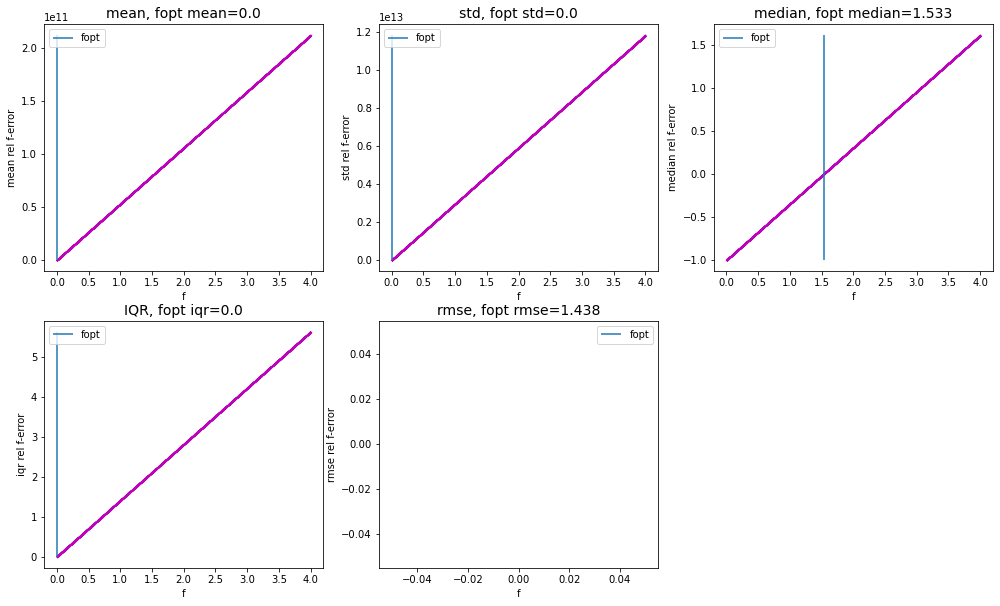

In [90]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(231)
ax.plot(A[:,0], A[:,1],'mo',markersize=0.5)
ax.vlines(fopt_mean,A[:,1].min(),A[:,1].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mean rel f-error')
ax.set_title(f'mean, fopt mean={fopt_mean}',size=14)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(A[:,0], A[:,2],'mo',markersize=0.5)
ax.vlines(fopt_std,A[:,2].min(),A[:,2].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('std rel f-error')
ax.set_title(f'std, fopt std={fopt_std}',size=14)
ax.legend()

ax = fig.add_subplot(233)
ax.plot(A[:,0], A[:,3],'mo',markersize=0.5)
ax.vlines(fopt_median,A[:,3].min(),A[:,3].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('median rel f-error')
ax.set_title(f'median, fopt median={fopt_median}',size=14)
ax.legend()

ax = fig.add_subplot(234)
ax.plot(A[:,0], A[:,4],'mo',markersize=0.5)
ax.vlines(fopt_iqr,A[:,4].min(),A[:,4].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('iqr rel f-error')
ax.set_title(f'IQR, fopt iqr={fopt_iqr}',size=14)
ax.legend()

ax = fig.add_subplot(235)
ax.plot(A[:,0], A[:,5],'mo',markersize=0.5)
ax.vlines(fopt_rmse,A[:,5].min(),A[:,5].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('rmse rel f-error')
ax.set_title(f'rmse, fopt rmse={fopt_rmse}',size=14)
ax.legend()

median          mean           std    iqr          rmse
0.0    -1.000 -1.000000e+00  0.000000e+00  0.000  1.000000e+00
1.533  -0.000  8.109659e+10  4.523270e+12  2.157  4.523270e+12
0.0    -1.000 -1.000000e+00  0.000000e+00  0.000  1.000000e+00
0.0    -1.000 -1.000000e+00  0.000000e+00  0.000  1.000000e+00
1.438  -0.062  7.607104e+10  4.242963e+12  2.024  4.242963e+12

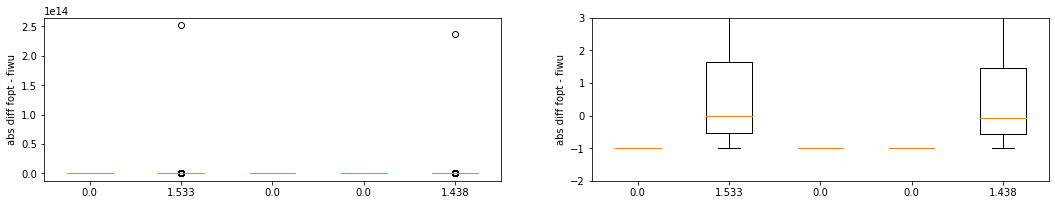

In [91]:
# boxplots
f_array=[fopt_mean,fopt_median,fopt_std,fopt_iqr,fopt_rmse]
f_array_str=[str(fopt_mean),str(fopt_median),str(fopt_std),str(fopt_iqr),str(fopt_rmse)]
df = pd.DataFrame(index=d.index, columns=f_array)

for f in f_array:
    o = f*d['ia']
    er = (o-d['fiwu'])/d['fiwu']
    er.replace([np.inf, -np.inf], np.nan, inplace=True)
    # er = er.dropna()
    df[f] = er
    
df = df.dropna()
    
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(121)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')

ax = fig.add_subplot(122)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')
ax.set_ylim(-2,3)

e = pd.DataFrame(index=df.columns)
e['median']=np.round(df.median(),3)
e['mean']=np.round(df.mean(),3)
e['std']=np.round(df.std(),3)
e['iqr'] = np.round((df.quantile(0.75) - df.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((df**2))),3)
e.index = f_array_str

e

In [92]:
# MINIMIZE ABSOLUTE ERROR - without IA
f_min=0
f_max=4
nmax=5000
A=np.zeros((int(nmax),6))

for n in range(1,int(nmax+1)): 
    Rnum=np.random.rand(1)
    f = f_min+(f_max-f_min)*Rnum

    o = f
    er = o-d['fiwu']
    er_m = er.mean()
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_std,er_med,er_iqr,er_rmse]
    
ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)

ind=np.argmin(A[:,2])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,3],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,5])
fopt_rmse=np.round(A[ind,0],3)

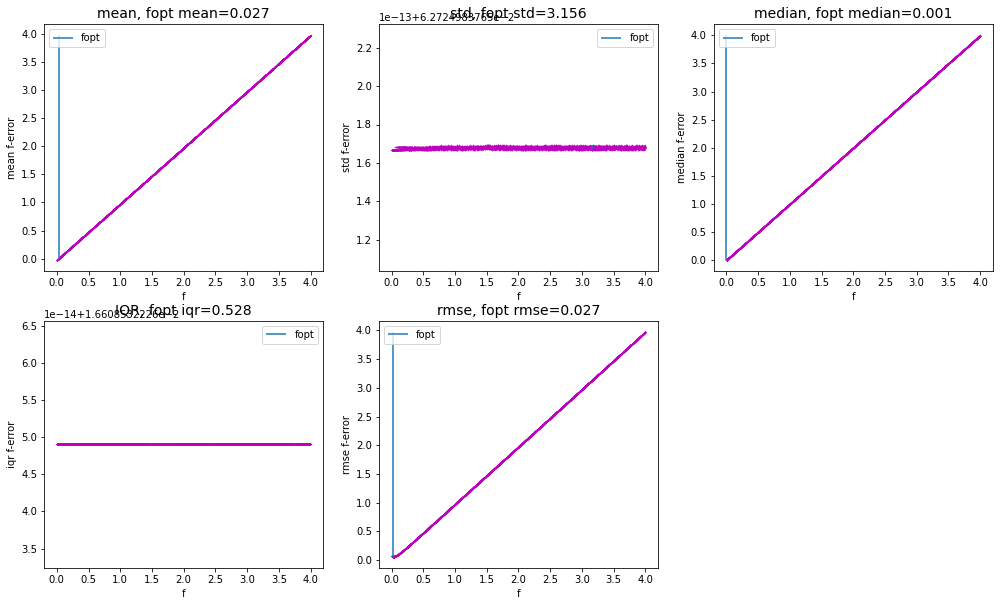

In [93]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(231)
ax.plot(A[:,0], A[:,1],'mo',markersize=0.5)
ax.vlines(fopt_mean,A[:,1].min(),A[:,1].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mean f-error')
ax.set_title(f'mean, fopt mean={fopt_mean}',size=14)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(A[:,0], A[:,2],'mo',markersize=0.5)
ax.vlines(fopt_std,A[:,2].min(),A[:,2].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('std f-error')
ax.set_title(f'std, fopt std={fopt_std}',size=14)
ax.legend()

ax = fig.add_subplot(233)
ax.plot(A[:,0], A[:,3],'mo',markersize=0.5)
ax.vlines(fopt_median,A[:,3].min(),A[:,3].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('median f-error')
ax.set_title(f'median, fopt median={fopt_median}',size=14)
ax.legend()

ax = fig.add_subplot(234)
ax.plot(A[:,0], A[:,4],'mo',markersize=0.5)
ax.vlines(fopt_iqr,A[:,4].min(),A[:,4].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('iqr f-error')
ax.set_title(f'IQR, fopt iqr={fopt_iqr}',size=14)
ax.legend()

ax = fig.add_subplot(235)
ax.plot(A[:,0], A[:,5],'mo',markersize=0.5)
ax.vlines(fopt_rmse,A[:,5].min(),A[:,5].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('rmse f-error')
ax.set_title(f'rmse, fopt rmse={fopt_rmse}',size=14)
ax.legend()

median   mean    std    iqr   rmse
f1.85ia - fiwu   0.019  0.019  0.114  0.147  0.115

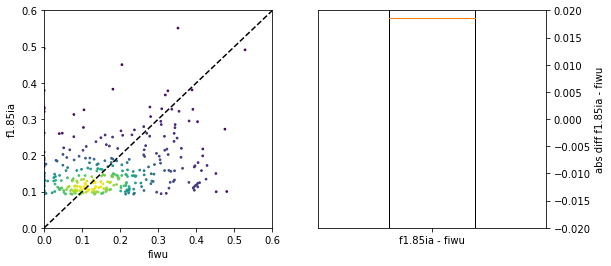

In [115]:
# fopt=1.85ia vs fiwu
d['f1.85ia'] = 1.85*d['ia']
d['dif'] = d['f1.85ia']-d['fiwu']
d['reldif'] = (d['f1.85ia']-d['fiwu'])/d['fiwu'] * 100
d['rmse'] = np.round(np.sqrt(np.mean((d['dif']**2))),3)

x = d['fiwu']
y = d['f1.85ia']

# calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(121)
# ax.plot(d['fiwu'],d['f1.85ia'],'mo',markersize=1)
ax.scatter(x,y,c=z,s=3)
ax.plot([0,12],[0,12],'k--')
ax.set_xlabel('fiwu')
ax.set_ylabel('f1.85ia')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

ax = fig.add_subplot(122)
d = d.dropna()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.boxplot(d['dif'])
ax.set_xticklabels(['f1.85ia - fiwu'])
ax.set_ylabel('abs diff f1.85ia - fiwu')
ax.set_ylim(-0.02,0.02)
ax.set_xlim(0.8,1.2)
fig.savefig(f'{work_dir}/output/figures/irrigation/fopt_vs_fiwu.jpg',bbox_inches='tight',dpi=300)

de = d['dif']

e = pd.DataFrame(index=['f1.85ia - fiwu'])
e['median']=np.round(de.median(),3)
e['mean']=np.round(de.mean(),3)
e['std']=np.round(de.std(),3)
e['iqr'] = np.round((de.quantile(0.75) - de.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((de**2))),3)
e

In [116]:
e

median   mean    std    iqr   rmse
f1.85ia - fiwu   0.019  0.019  0.114  0.147  0.115

Text(0.5, 1.0, 'RMSE')

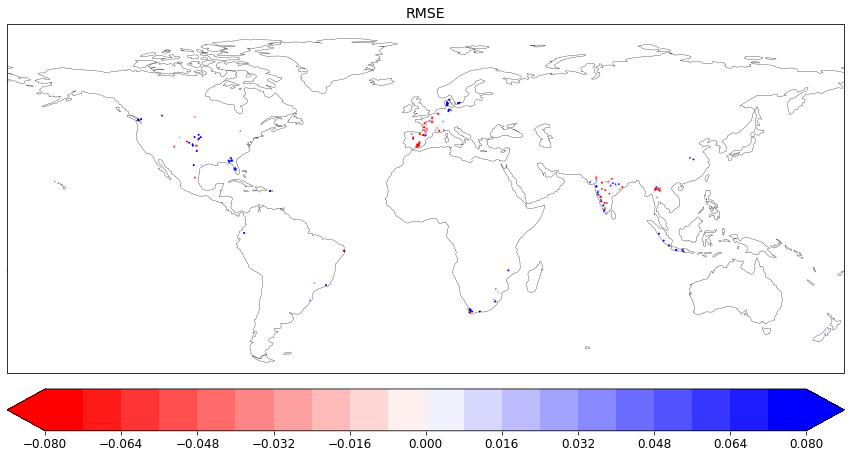

In [117]:
#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

d['lat'] = sh.centroid.y
d['lon'] = sh.centroid.x
d = d[d['ia']>0.05]

cm = plt.cm.bwr_r

bounds = np.linspace(-0.08,0.08,21)
bounds2 = np.linspace(-0.08,0.08,11)

# bounds = np.linspace(-100,100,21)
# bounds2 = np.linspace(-100,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

# no irrigation
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(d.lon,d.lat,c=d['dif'],s=1,cmap=cm, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
ax.set_title(f'RMSE',size=14)

In [118]:
d

fiwu        ia      fopt        lat        lon   f1.85ia  \
in_0000123  0.154839  0.052363  2.957041  16.982263  78.990662  0.096871   
de_0000051  0.040404  0.078154  0.516976  53.164590  10.120867  0.144585   
in_0000119  0.180171  0.092527  1.947219  17.223364  80.387283  0.171175   
in_0000150  0.363660  0.088706  4.099618  15.440954  75.210164  0.164106   
us_0006356  0.094390  0.061447  1.536122  29.237983 -96.410798  0.113677   
...              ...       ...       ...        ...        ...       ...   
es_0000717  0.236434  0.077843  3.037329  37.280649  -3.634592  0.144009   
th_0000133  0.206213  0.137952  1.494819  19.853208  99.203298  0.255211   
es_0000742  0.223399  0.055959  3.992221  37.702740  -3.517683  0.103524   
us_0001651  0.074197  0.071488  1.037891  32.288490 -83.682138  0.132253   
fr_0000663  0.106178  0.058779  1.806378  47.241622  -1.200506  0.108742   

                 dif      reldif   rmse  
in_0000123 -0.057968  -37.437465  0.126  
de_0000051  0.104181  257.850573  0.126  
in_0000119 -0.008995   -4.992712  0.126  
in_0000150 -0.199554  -54.873844  0.126  
us_0006356  0.019287   20.433135  0.126  
...              ...         ...    ...  
es_0000717 -0.092425  -39.091219  0.126  
th_0000133  0.048998   23.760797  0.126  
es_0000742 -0.119876  -53.659874  0.126  
us_0001651  0.058056   78.246071  0.126  
fr_0000663  0.002564    2.414880  0.126  

[231 rows x 9 columns]

# optimize f with my IA data and iwu2 data

In [17]:
df = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
df

ei        ec        hi        hc
de_0000778  0.000009  0.000009  0.000007  0.000007
br_0001850  0.015233  0.015508  0.015233  0.015233
ca_0003156  0.000907  0.001238  0.001189  0.000907
br_0001299  0.006525  0.006664  0.006525  0.006525
br_0001843  0.017082  0.017370  0.017082  0.017082
...              ...       ...       ...       ...
ca_0001384  0.000035  0.000100  0.000077  0.000035
us_0001647  0.001276  0.001963  0.001346  0.001276
gb_0000044  0.018554  0.018554  0.018554  0.018554
br_0000392  0.003677  0.003732  0.004089  0.004089
fr_0000694  0.018735  0.019200  0.018775  0.018685

[8658 rows x 4 columns]

In [18]:
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/*.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
print(len(el_id_list))

# get fiwu values for catchments with ia>0, se only written for ia>0, sd for all catchments
f = 'iwu2'
fm = []
for catch_id in el_id_list:
    if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_f{f}.csv'):
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_f{f}.csv',index_col=0)
        fmean = d['f'][:-1].mean()
        fm.append(fmean)
print(len(fm))

4507


KeyboardInterrupt: 

In [ ]:
d=pd.DataFrame(index=el_id_list, columns=['fiwu'])
d['fiwu']=fm
d['ia'] = df['hi']
d['fopt'] = d['fiwu']/d['ia']
d.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization2.csv')

In [19]:
d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization2.csv',index_col=0)
d

fiwu        ia      fopt
fi_0000078  0.000205  0.002582  0.079272
ca_0000807  0.004692  0.024559  0.191039
br_0000423  0.000307  0.007553  0.040647
br_0002620  0.002766  0.004409  0.627364
br_0000562  0.000074  0.000549  0.134809
...              ...       ...       ...
es_0000912  0.019453  0.012966  1.500296
tt_0000002  0.000931  0.004732  0.196821
es_0000950  0.271079  0.157458  1.721597
fr_0000616  0.000100  0.000453  0.220178
br_0000482  0.000000  0.000256  0.000000

[4507 rows x 3 columns]

In [35]:
# MINIMIZE ABSOLUTE ERROR
f_min=0
f_max=4
nmax=10000
# A=np.zeros((int(nmax),8))
b = np.linspace(0,2.5,1000)
A=np.zeros((len(b),8))

# for n in range(1,int(nmax+1)): 
#     Rnum=np.random.rand(1)
#     f = f_min+(f_max-f_min)*Rnum

for n in range(1,len(b)+1):
    f = b[n-1]
    o = f*d['ia']
    er = o-d['fiwu']
    er_m = er.mean()
    er_mse = np.mean(er**2)
    er_mae = np.mean(np.abs(er))
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_mse,er_mae,er_std,er_med,er_iqr,er_rmse]

ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)
    
ind=np.argmin(A[:,2],0)
fopt_mse=np.round(A[ind,0],3)

ind=np.argmin(A[:,3],0)
fopt_mae=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,5],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,6])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,7])
fopt_rmse=np.round(A[ind,0],3)

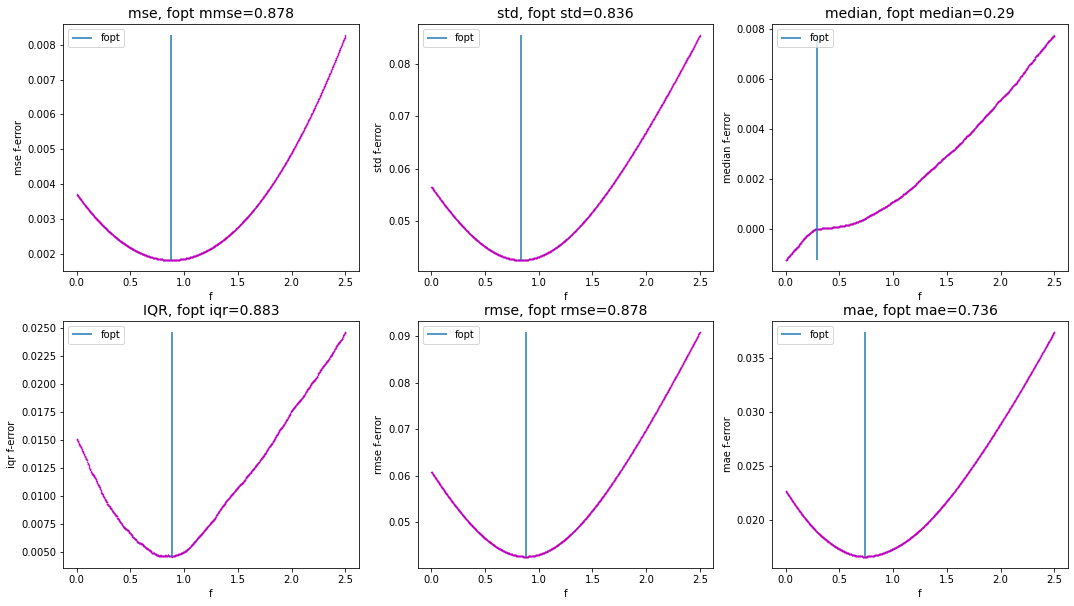

In [36]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
ax.plot(A[:,0], A[:,2],'mo',markersize=0.5)
ax.vlines(fopt_mse,A[:,2].min(),A[:,2].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mse f-error')
ax.set_title(f'mse, fopt mmse={fopt_mse}',size=14)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(A[:,0], A[:,4],'mo',markersize=0.5)
ax.vlines(fopt_std,A[:,4].min(),A[:,4].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('std f-error')
ax.set_title(f'std, fopt std={fopt_std}',size=14)
ax.legend()

ax = fig.add_subplot(233)
ax.plot(A[:,0], A[:,5],'mo',markersize=0.5)
ax.vlines(fopt_median,A[:,5].min(),A[:,5].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('median f-error')
ax.set_title(f'median, fopt median={fopt_median}',size=14)
ax.legend()

ax = fig.add_subplot(234)
ax.plot(A[:,0], A[:,6],'mo',markersize=0.5)
ax.vlines(fopt_iqr,A[:,6].min(),A[:,6].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('iqr f-error')
ax.set_title(f'IQR, fopt iqr={fopt_iqr}',size=14)
ax.legend()

ax = fig.add_subplot(235)
ax.plot(A[:,0], A[:,7],'mo',markersize=0.5)
ax.vlines(fopt_rmse,A[:,7].min(),A[:,7].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('rmse f-error')
ax.set_title(f'rmse, fopt rmse={fopt_rmse}',size=14)
ax.legend()

ax = fig.add_subplot(236)
ax.plot(A[:,0], A[:,3],'mo',markersize=0.5)
ax.vlines(fopt_mae,A[:,3].min(),A[:,3].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mae f-error')
ax.set_title(f'mae, fopt mae={fopt_mae}',size=14)
ax.legend()

# fig.savefig(f'{work_dir}/output/figures/irrigation/optimization/monte_carlo_absdiff.jpg',dpi=300,bbox_inches='tight')

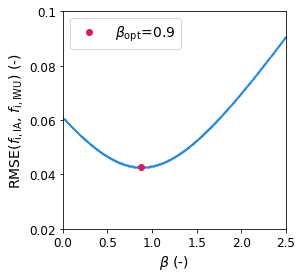

In [46]:
# RMSE figure optimization
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(A[:,0], A[:,7],'o',color=c2,markersize=0.5)
ax.plot(1,1,'o',color=c2,markersize=6)
ax.plot(fopt_rmse,0.0426,'o',color=c1,markersize=6,label=r'$\beta_{\mathrm{opt}}$='+str(np.round(fopt_rmse,1)))
# ax.vlines(fopt_rmse,A[:,7].min(),A[:,7].max(), label='fopt')
ax.set_xlim(0,2.5)
ax.set_ylim(0.02,0.10)
ax.set_yticks([0.02,0.04,0.06,0.08,0.10])
ax.set_yticklabels([0.02,0.04,0.06,0.08,0.10],size=12)
ax.set_xticklabels([0.0,0.5,1.0,1.5,2.0,2.5],size=12)
ax.set_xlabel(r'$\beta$ (-)',fontsize=14)
ax.set_ylabel('RMSE($f_{\mathrm{i,IA}}$, $f_{\mathrm{i,IWU}}$) (-)',fontsize=14)
# ax.set_title('min(RMSE) for $f_{\mathrm{i,opt}}$='+str(fopt_rmse),size=14)
ax.legend(fontsize=14,loc='upper left')
fig.savefig(f'{work_dir}/output/figures/irrigation/optimization/monte_carlo_rmse.jpg',dpi=300,bbox_inches='tight')

In [20]:
# MINIMIZE ABSOLUTE ERROR
f_min=0
f_max=4
nmax=10000
A=np.zeros((int(nmax),8))

for n in range(1,int(nmax+1)): 
    Rnum=np.random.rand(1)
    f = f_min+(f_max-f_min)*Rnum

    o = f*d['ia']
    er = (o-d['fiwu'])/d['fiwu']
    er_m = er.mean()
    er_mse = np.mean(er**2)
    er_mae = np.mean(np.abs(er))
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean(((o-d['fiwu'])/d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_mse,er_mae,er_std,er_med,er_iqr,er_rmse]

ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)
    
ind=np.argmin(A[:,2],0)
fopt_mse=np.round(A[ind,0],3)

ind=np.argmin(A[:,3],0)
fopt_mae=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,5],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,6])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,7])
fopt_rmse=np.round(A[ind,0],3)

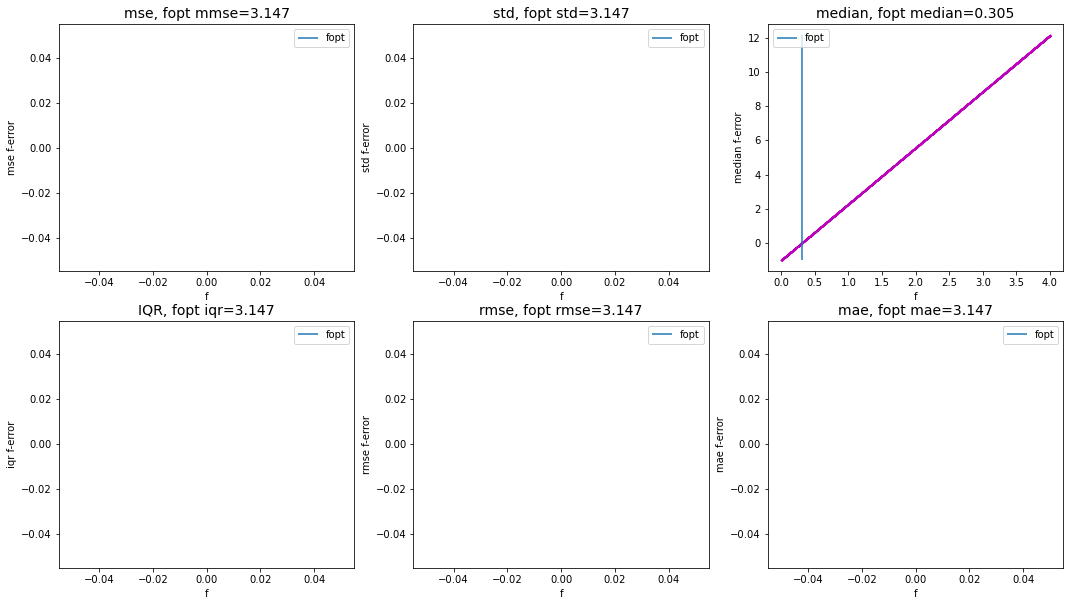

In [21]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
ax.plot(A[:,0], A[:,2],'mo',markersize=0.5)
ax.vlines(fopt_mse,A[:,2].min(),A[:,2].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mse f-error')
ax.set_title(f'mse, fopt mmse={fopt_mse}',size=14)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(A[:,0], A[:,4],'mo',markersize=0.5)
ax.vlines(fopt_std,A[:,4].min(),A[:,4].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('std f-error')
ax.set_title(f'std, fopt std={fopt_std}',size=14)
ax.legend()

ax = fig.add_subplot(233)
ax.plot(A[:,0], A[:,5],'mo',markersize=0.5)
ax.vlines(fopt_median,A[:,5].min(),A[:,5].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('median f-error')
ax.set_title(f'median, fopt median={fopt_median}',size=14)
ax.legend()

ax = fig.add_subplot(234)
ax.plot(A[:,0], A[:,6],'mo',markersize=0.5)
ax.vlines(fopt_iqr,A[:,6].min(),A[:,6].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('iqr f-error')
ax.set_title(f'IQR, fopt iqr={fopt_iqr}',size=14)
ax.legend()

ax = fig.add_subplot(235)
ax.plot(A[:,0], A[:,7],'mo',markersize=0.5)
ax.vlines(fopt_rmse,A[:,7].min(),A[:,7].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('rmse f-error')
ax.set_title(f'rmse, fopt rmse={fopt_rmse}',size=14)
ax.legend()

ax = fig.add_subplot(236)
ax.plot(A[:,0], A[:,3],'mo',markersize=0.5)
ax.vlines(fopt_mae,A[:,3].min(),A[:,3].max(), label='fopt')
ax.set_xlabel('f')
ax.set_ylabel('mae f-error')
ax.set_title(f'mae, fopt mae={fopt_mae}',size=14)
ax.legend()

median   mean    std    iqr   rmse
3.147   0.011  0.045  0.112  0.035  0.120
0.305   0.000 -0.016  0.049  0.009  0.051
3.147   0.011  0.045  0.112  0.035  0.120
3.147   0.011  0.045  0.112  0.035  0.120
3.147   0.011  0.045  0.112  0.035  0.120

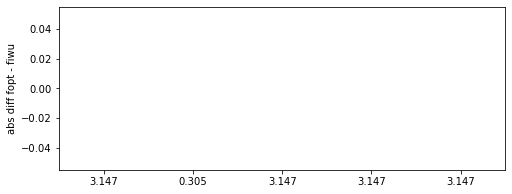

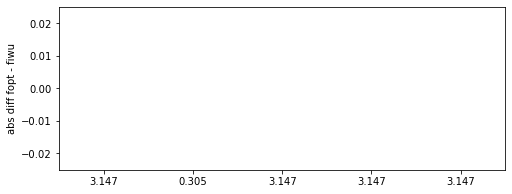

In [22]:
# boxplots
f_array=[fopt_mean,fopt_median,fopt_std,fopt_iqr,fopt_rmse]
f_array_str=[str(fopt_mean),str(fopt_median),str(fopt_std),str(fopt_iqr),str(fopt_rmse)]
df = pd.DataFrame(index=d.index, columns=f_array)

for f in f_array:
    o = f*d['ia']
    er = o-d['fiwu']
    df[f] = er
    
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.boxplot(df)
ax.set_xticklabels(f_array_str)
ax.set_ylabel('abs diff fopt - fiwu')
ax.set_ylim(-0.025,0.025)
# fig.savefig(f'{work_dir}/output/figures/irrigation/optimization/monte_carlo_absdiff_boxplot.jpg',dpi=300,bbox_inches='tight')

e = pd.DataFrame(index=df.columns)
e['median']=np.round(df.median(),3)
e['mean']=np.round(df.mean(),3)
e['std']=np.round(df.std(),3)
e['iqr'] = np.round((df.quantile(0.75) - df.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((df**2))),3)
e.index = [f_array_str]

e

In [78]:
df

1.099     0.319     0.887     0.907     0.928
de_0000401  0.000036  0.000011  0.000029  0.000030  0.000031
es_0000199 -0.020022 -0.033249 -0.023617 -0.023278 -0.022922
br_0000380  0.001673  0.000168  0.001264  0.001303  0.001343
es_0000468 -0.004295 -0.013125 -0.006695 -0.006469 -0.006231
at_0000087  0.000289  0.000084  0.000233  0.000238  0.000244
...              ...       ...       ...       ...       ...
br_0000469  0.000358  0.000104  0.000289  0.000295  0.000302
at_0000174  0.000642  0.000037  0.000477  0.000493  0.000509
de_0000123  0.005132 -0.004158  0.002607  0.002845  0.003095
ca_0004063  0.001724  0.000500  0.001392  0.001423  0.001456
de_0000560 -0.011612 -0.025602 -0.015414 -0.015055 -0.014679

[4603 rows x 5 columns]

median   mean   std    iqr  rmse    mae
fi,opt*IA - fi,iwu   0.001 -0.002  0.04  0.005  0.04  0.016

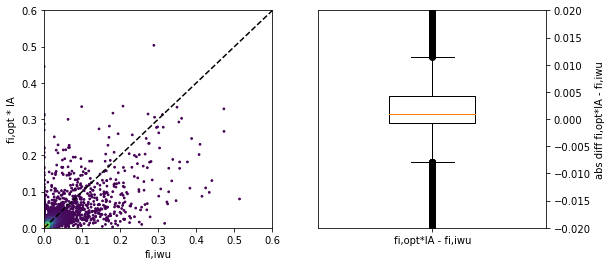

In [30]:
# fopt=1.85ia vs fiwu
d['fi,opt'] = 0.9*d['ia']
d['dif'] = d['fi,opt']-d['fiwu']
d['reldif'] = (d['fi,opt']-d['fiwu'])/d['fiwu'] * 100

d = d.dropna()
x = d['fiwu']
y = d['fi,opt']

# calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(121)
# ax.plot(d['fiwu'],d['f1.85ia'],'mo',markersize=1)
ax.scatter(x,y,c=z,s=3)
ax.plot([0,12],[0,12],'k--')
ax.set_xlabel('fi,iwu')
ax.set_ylabel('fi,opt * IA')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

ax = fig.add_subplot(122)
d = d.dropna()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.boxplot(d['dif'])
ax.set_xticklabels(['fi,opt*IA - fi,iwu'])
ax.set_ylabel('abs diff fi,opt*IA - fi,iwu')
ax.set_ylim(-0.02,0.02)
ax.set_xlim(0.8,1.2)
# fig.savefig(f'{work_dir}/output/figures/irrigation/fopt_vs_fiwu.jpg',bbox_inches='tight',dpi=300)

de = d['dif']

e = pd.DataFrame(index=['fi,opt*IA - fi,iwu'])
e['median']=np.round(de.median(),3)
e['mean']=np.round(de.mean(),3)
e['std']=np.round(de.std(),3)
e['iqr'] = np.round((de.quantile(0.75) - de.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((de**2))),3)
e['mae'] = np.round(np.mean(np.abs(de)),3)
e

## 6. SR CALCULATION

In [18]:
# RUN SR CALCULATION 
catch_list = np.genfromtxt(f'{work_dir}/output/gsim_aus_catch_id_list_lo_sel_area_wb.txt',dtype='str')[:]

# sd_list=[]
# for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/*gumbelfit.csv'):
#     f = os.path.split(filepath)[1] # remove full path
#     f = f[:-20] # remove .year extension
#     sd_list.append(f)
# # sd_list = np.unique(sd_list)
# print(len(sd_list))

sd_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/*.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-11] # remove .year extension
    sd_list.append(f)
# sd_list = np.unique(sd_list)
print(len(sd_list))


# sd_list=[]
# for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/*.csv'):
#     f = os.path.split(filepath)[1] # remove full path
#     f = f[:-4] # remove .year extension
#     sd_list.append(f)
# print(len(sd_list))

# check which catchments are missing
c_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/*gumbelfit.csv'):
# for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/*.csv'):
# for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/*gumbelfit.csv'):
    f = os.path.split(filepath)[1] # remove full path
    # if ('gumbelfit') in f:
    #     f = f[:-20]
    # else:
    #     f = f[:-17]
    # f = f[:-20] # remove .year extension fiwu2
    f = f[:-21] # remove .year extension
    # if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{f}_fiwu2_points.csv'):
    c_list.append(f)

# dif = [item for item, count in Counter(c_list).items() if count < 2]

dif = list(set(sd_list) - set(c_list))
print(len(c_list))
print(len(dif))

# dif =['ca_0001697']

# define directories
sd_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
out_dir = f'{work_dir}/output/sr_calculation/sd_catchments'

# define return periods
rp_array = [2,3,5,10,20,30,40,50,60,70,80]
f_array = ['0.9ia']
# f_array = ['iwu2']
# f_array = ['no_irri']
catch_id_list = dif[:]
sd_dir_list = [sd_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list) 
rp_array_list = [rp_array] * len(catch_id_list) 
f_list = f_array * len(catch_id_list)

run_sr_calculation_parallel(catch_id_list,rp_array_list,sd_dir_list,out_dir_list,f_list) #run all catchments parallel on delftblue

5633
4095
1538


In [22]:
# combine Sr output in dataframe - f no irri
c_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/*gumbelfit.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-14] # remove .year extension
    c_list.append(f)
print(len(c_list))

sr_df_gf = pd.DataFrame(index=c_list, columns=['2','3','5','10','20','30','40','50','60','70','80'])
sr_df_p = pd.DataFrame(index=c_list, columns=['k3','k5'])
sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_gumbelfit.csv')
sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv')

# sr_df_gf = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_gumbelfit.csv',index_col=0)
# sr_df_p = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv',index_col=0)
# sr_n = sr_df_p.dropna()

p = []
# p = sr_n.index
di = list(set(c_list) - set(p)) #missing catchments in dataframe

for catch_id in di[0:5000]:
    if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{catch_id}_gumbelfit.csv'):
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{catch_id}_gumbelfit.csv',index_col=0)
        sr_df_gf.loc[catch_id] = d.iloc[0]
        
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{catch_id}_points.csv',index_col=0)
        l = [2]#,3,5,10,20,30,40,50,60,70,80]
        for i in range(len(l)):
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1]])
            sr_df_p.loc[catch_id]['k3'] = sr
            
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1,ix1-2,ix1+2]])
            sr_df_p.loc[catch_id]['k5'] = sr

sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_gumbelfit.csv')
sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv')

4469


In [21]:
# combine Sr output in dataframe - f0.9ia
c_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/*gumbelfit.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-21] # remove .year extension
    c_list.append(f)
print(len(c_list))

sr_df_gf = pd.DataFrame(index=c_list, columns=['2','3','5','10','20','30','40','50','60','70','80'])
sr_df_p = pd.DataFrame(index=c_list, columns=['k3','k5'])
sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_gumbelfit.csv')
sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv')

# sr_df_gf = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_gumbelfit.csv',index_col=0)
# sr_df_p = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv',index_col=0)
# sr_n = sr_df_p.dropna()

p=[]
# p = sr_n.index
di = list(set(c_list) - set(p)) #missing catchments in dataframe

for catch_id in di[0:5005]:
    if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{catch_id}_f0.9ia_gumbelfit.csv'):
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{catch_id}_f0.9ia_gumbelfit.csv',index_col=0)
        sr_df_gf.loc[catch_id] = d.iloc[0]
        
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{catch_id}_f0.9ia_points.csv',index_col=0)
        l = [2]#,3,5,10,20,30,40,50,60,70,80]
        for i in range(len(l)):
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1]])
            sr_df_p.loc[catch_id]['k3'] = sr
            
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1,ix1-2,ix1+2]])
            sr_df_p.loc[catch_id]['k5'] = sr

sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_gumbelfit.csv')
sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv')

4470


In [20]:
# combine Sr output in dataframe - fiwu2
c_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/*gumbelfit.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-20] # remove .year extension
    c_list.append(f)
print(len(c_list))

# sr_df_gf = pd.DataFrame(index=c_list, columns=['2','3','5','10','20','30','40','50','60','70','80'])
# sr_df_p = pd.DataFrame(index=c_list, columns=['k3','k5'])
# sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_gumbelfit.csv')
# sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv')

sr_df_gf = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_gumbelfit.csv',index_col=0)
sr_df_p = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv',index_col=0)
sr_n = sr_df_gf.dropna()
# p=[]
p = sr_n.index
di = list(set(c_list) - set(p)) #missing catchments in dataframe

for catch_id in di[0:4000]:
    if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{catch_id}_fiwu2_gumbelfit.csv'):
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{catch_id}_fiwu2_gumbelfit.csv',index_col=0)
        sr_df_gf.loc[catch_id] = d.iloc[0]
        
        d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{catch_id}_fiwu2_points.csv',index_col=0)
        l = [2]#,3,5,10,20,30,40,50,60,70,80]
        for i in range(len(l)):
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1]])
            sr_df_p.loc[catch_id]['k3'] = sr
            
            a = d['T'].values
            ix1 = find_nearest(a,l[i])
            sr = np.mean(d.sd.values[[ix1,ix1-1,ix1+1,ix1-2,ix1+2]])
            sr_df_p.loc[catch_id]['k5'] = sr

sr_df_gf.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_gumbelfit.csv')
sr_df_p.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv')

4469


## compare gumbel methods

In [59]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_gumbelfit.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_gumbelfit.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_gumbelfit.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['2']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['2']
sr_df['sr_2_fopt'] = sr_df_f09ia['2']
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = sr_df.sr_2_fiwu-sr_df.sr_2_f0
f0_opt_e = sr_df.sr_2_fopt-sr_df.sr_2_f0
fopt_iwu_e = sr_df.sr_2_fiwu-sr_df.sr_2_fopt

f0_iwu_er = (sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 
f0_opt_er = (sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0
fopt_iwu_er = (sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

In [60]:
e_df[e_df['f0_fopt']>0]

f0_fiwu       f0_fopt  fopt_fiwu
na_0000015  2.842171e-14  2.842171e-14   0.000000
br_0002359 -2.829433e-01  2.795531e-01  -0.562496
es_0000999 -3.804487e-01  9.916430e-01  -1.372092
us_0006081  0.000000e+00  7.681519e+00  -7.681519
us_0004753  2.756832e+00  1.616034e-01   2.595228
ca_0000444  0.000000e+00  2.115680e-01  -0.211568
br_0000699 -1.979703e-01  6.287658e+00  -6.485628
ca_0006226  4.307448e-01  8.058468e-01  -0.375102
ca_0002072 -6.471056e-01  1.230501e+00  -1.877606
de_0000827 -1.262012e+00  8.273137e-01  -2.089325
us_0005876  4.249503e+00  3.375279e+00   0.874224
de_0000081 -8.995939e-01  2.430797e+00  -3.330391
es_0000590  1.911642e+00  1.447948e+00   0.463694
us_0006250 -5.140062e-02  9.789712e-02  -0.149298
us_0005128 -1.415213e+00  1.503079e+00  -2.918292
ca_0003756  1.732672e+00  1.712109e+00   0.020563
br_0002709  0.000000e+00  2.480906e-01  -0.248091
es_0000906 -8.445659e-01  7.987226e-02  -0.924438
es_0001063  9.892878e-01  1.612972e+00  -0.623684
za_0000144  0.000000e+00  1.362553e+00  -1.362553

Text(0.5, 1.0, 'Sr no-irri vs fi,opt')

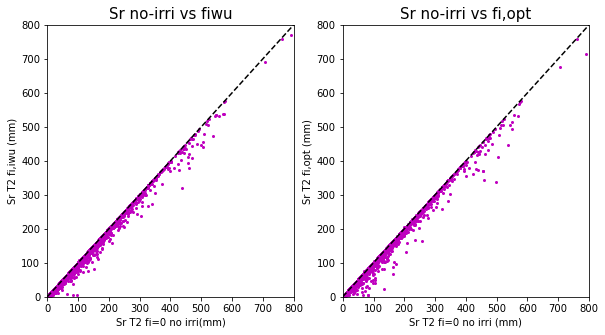

In [50]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(sr_dfg.sr_2_f0, sr_dfg.sr_2_fiwu, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri(mm)')
ax.set_ylabel('Sr T2 fi,iwu (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fiwu',fontsize=15)

ax = fig.add_subplot(132)
ax.plot(sr_dfg.sr_2_f0, sr_dfg.sr_2_fopt, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri (mm)')
ax.set_ylabel('Sr T2 fi,opt (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fopt).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fi,opt',fontsize=15)

In [61]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['2']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['2']
sr_df['sr_2_fopt'] = sr_df_f09ia['2']
                
sr_df = sr_df.dropna()
# dataframes with errors
f0_iwu_e = sr_df.sr_2_fiwu-sr_df.sr_2_f0
f0_opt_e = sr_df.sr_2_fopt-sr_df.sr_2_f0
fopt_iwu_e = sr_df.sr_2_fiwu-sr_df.sr_2_fopt

f0_iwu_er = (sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 
f0_opt_er = (sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0
fopt_iwu_er = (sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

In [62]:
e_df[e_df['f0_fopt']>0]

f0_fiwu       f0_fopt     fopt_fiwu
br_0001128  8.526513e-14  1.421085e-13 -5.684342e-14
na_0000015  5.684342e-14  5.684342e-14  0.000000e+00
es_0000463  0.000000e+00  8.526513e-14 -8.526513e-14
es_0001064  0.000000e+00  1.421085e-14 -1.421085e-14
br_0001146  0.000000e+00  1.421085e-13 -1.421085e-13
us_0006238 -4.741109e+00  2.842171e-14 -4.741109e+00
br_0001187 -3.222713e-01  5.684342e-14 -3.222713e-01
es_0000855  4.263256e-14  4.263256e-14  0.000000e+00
om_0000004  2.842171e-14  2.842171e-14  0.000000e+00
br_0000733  2.557954e-13  5.684342e-14  1.989520e-13
us_0006212  4.263256e-14  4.263256e-14  0.000000e+00
br_0001481  6.772473e+00  1.123288e-01  6.660145e+00
us_0006081  0.000000e+00  3.064505e+01 -3.064505e+01
es_0000574  5.684342e-14  5.684342e-14  0.000000e+00
in_0000010  2.273737e-13  2.273737e-13  0.000000e+00
br_0000699  8.526513e-14  1.183766e+00 -1.183766e+00
ca_0002945  0.000000e+00  2.842171e-14 -2.842171e-14
ca_0006320  0.000000e+00  1.421085e-14 -1.421085e-14
ca_0002072  1.421085e-14  2.842171e-14 -1.421085e-14
br_0001148 -5.684342e-14  5.684342e-14 -1.136868e-13
br_0001016  0.000000e+00  8.526513e-14 -8.526513e-14
za_0000019  0.000000e+00  9.947598e-14 -9.947598e-14
br_0000590  0.000000e+00  5.684342e-14 -5.684342e-14
es_0000488 -5.876346e+00  1.136868e-13 -5.876346e+00
ca_0002944  0.000000e+00  1.421085e-14 -1.421085e-14
br_0000642  5.684342e-14  5.684342e-14  0.000000e+00
ca_0003793  0.000000e+00  4.263256e-14 -4.263256e-14
fr_0000730 -3.283439e+00  5.684342e-14 -3.283439e+00
za_0000087  0.000000e+00  8.526513e-14 -8.526513e-14
ca_0002819  5.684342e-14  5.684342e-14  0.000000e+00
us_0005876  4.854491e+00  4.854491e+00  0.000000e+00
za_0000287  8.526513e-14  8.526513e-14  0.000000e+00
ca_0006177  0.000000e+00  9.947598e-14 -9.947598e-14
ca_0002790  1.421085e-14  1.421085e-14  0.000000e+00
de_0000081  5.684342e-14  2.842171e-14  2.842171e-14
br_0000706  8.526513e-14  1.989520e-13 -1.136868e-13
ca_0002213 -1.421085e-14  2.842171e-14 -4.263256e-14
br_0000677  0.000000e+00  5.684342e-14 -5.684342e-14
us_0007053  0.000000e+00  1.421085e-14 -1.421085e-14
es_0000575 -8.068763e-01  2.842171e-13 -8.068763e-01
br_0001139  0.000000e+00  2.842171e-14 -2.842171e-14
ca_0003259  1.705303e-13  5.684342e-14  1.136868e-13
br_0000669  1.705303e-13  1.705303e-13  0.000000e+00
ca_0003245  2.842171e-14  4.263256e-14 -1.421085e-14
th_0000038 -3.564830e-01  5.684342e-14 -3.564830e-01
br_0000638  0.000000e+00  1.136868e-13 -1.136868e-13
br_0001116  0.000000e+00  1.136868e-13 -1.136868e-13
ca_0002820  5.684342e-14  5.684342e-14  0.000000e+00
br_0001215 -4.070233e+00  4.263256e-14 -4.070233e+00
es_0000862 -1.968835e+01  8.526513e-14 -1.968835e+01
br_0000670  1.136868e-13  1.136868e-13  0.000000e+00
es_0000593 -3.270121e+00  2.842171e-14 -3.270121e+00
es_0000858  8.526513e-14  2.842171e-14  5.684342e-14
es_0000951  5.684342e-14  2.842171e-14  2.842171e-14

Text(0.5, 1.0, 'Sr no-irri vs fi,opt')

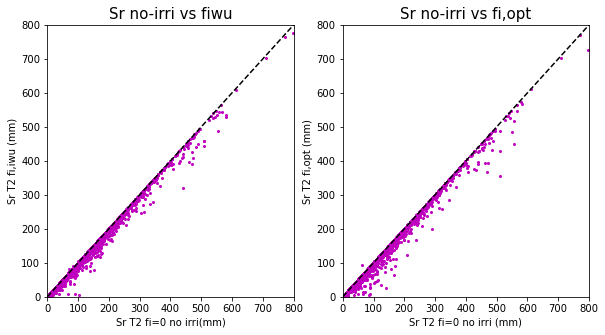

In [63]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(sr_dfp.sr_2_f0, sr_dfp.sr_2_fiwu, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri(mm)')
ax.set_ylabel('Sr T2 fi,iwu (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fiwu',fontsize=15)

ax = fig.add_subplot(132)
ax.plot(sr_dfp.sr_2_f0, sr_dfp.sr_2_fopt, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri (mm)')
ax.set_ylabel('Sr T2 fi,opt (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fopt).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fi,opt',fontsize=15)

## PLOT SR METHODS

In [16]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']
                
sr_df = sr_df.dropna()
# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

In [70]:
# drop catchments with Sr difference >0
ix_drop = ['us_0006081','br_0000699','us_0005166','za_0000167','us_0005876','us_0005128','br_0003169','us_0004753','ca_0000774'] #catchments with sr increasing with irri compared to no-irri
sr_df = sr_df.drop(index=ix_drop)
sr_df

sr_2_f0   sr_2_fiwu   sr_2_fopt
at_0000061   52.448638   52.448638   52.023780
ca_0002247  112.150949  112.150949  112.150949
de_0000760   78.437875   78.355342   78.116695
br_0000837  160.663105  159.590904  158.816485
ca_0005460   14.248810   14.248810   13.230872
...                ...         ...         ...
fr_0000804  138.073340  136.574978  137.626732
de_0000538   36.640569   36.640569   36.640569
gb_0000177   57.661241   57.661241   57.661241
de_0000348  125.464361  125.464361  125.464361
ca_0000879  126.281047  126.023923  125.559009

[4460 rows x 3 columns]

In [ ]:
ix_drop = ['us_0006081','br_0000699','us_0005166','za_0000167','us_0005876','us_0005128','br_0003169','us_0004753','ca_0000774']

In [64]:
i

Index(['at_0000061', 'ca_0002247', 'de_0000760', 'br_0000837', 'ca_0005460',
       'ca_0003433', 'G0060005', 'ca_0003752', 'us_0001859', 'br_0001950',
       ...
       'br_0001575', 'br_0001162', 'gb_0000098', 'us_0006102', 'ca_0002165',
       'fr_0000804', 'de_0000538', 'gb_0000177', 'de_0000348', 'ca_0000879'],
      dtype='object', length=4463)

In [65]:
j

Index(['at_0000061', 'ca_0002247', 'de_0000760', 'br_0000837', 'ca_0005460',
       'ca_0003433', 'G0060005', 'ca_0003752', 'us_0001859', 'br_0001950',
       ...
       'br_0001575', 'br_0001162', 'gb_0000098', 'us_0006102', 'ca_0002165',
       'fr_0000804', 'de_0000538', 'gb_0000177', 'de_0000348', 'ca_0000879'],
      dtype='object', length=4465)

In [18]:
e_df[e_df['f0_fopt']>0]

f0_fiwu  f0_fopt  fopt_fiwu
us_0006081    0.000    5.763     -5.763
br_0000699   -0.244    2.899     -3.143
us_0005166   -0.578    0.486     -1.064
za_0000167    3.724    2.260      1.464
us_0005876   -0.884    0.267     -1.151
us_0005128   -0.820    0.232     -1.052

In [17]:
e_df[e_df['f0_fiwu']>0]

f0_fiwu  f0_fopt  fopt_fiwu
br_0003169    0.262   -2.402      2.664
us_0004753    2.014   -2.651      4.665
za_0000167    3.724    2.260      1.464
ca_0000774    1.215   -3.610      4.825

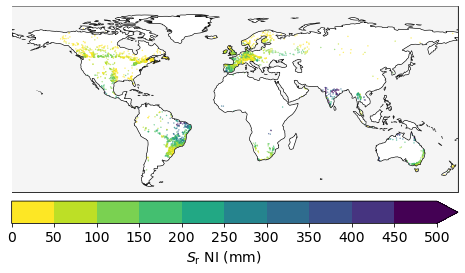

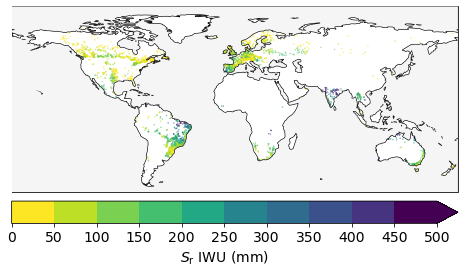

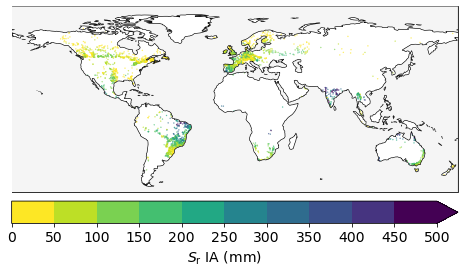

In [175]:
#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

sr_df['lat'] = sh.centroid.y
sr_df['lon'] = sh.centroid.x

bounds = np.linspace(0,500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_f0'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=14)
ax.set_title('',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/sr_map_T2_no_irrigation.jpg',bbox_inches='tight',dpi=300)

# irrigation fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fiwu'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ IWU (mm)', size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/sr_map_T2_irrigation_fiwu.jpg',bbox_inches='tight',dpi=300)

# irrigation fopt
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fopt'],s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$S_\mathrm{r}$ IA (mm)', size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/sr_map_T2_irrigation_fopt.jpg',bbox_inches='tight',dpi=300)

In [176]:
#Europe
lat_min_e, lat_max_e = 35,63
lon_min_e, lon_max_e = -12,18

#Asia
lat_min_a, lat_max_a = -11,26
lon_min_a, lon_max_a = 65,120

#us
lat_min_u, lat_max_u = 20,55
lon_min_u, lon_max_u = -130,-70

#south america
lat_min_s, lat_max_s = -33,-4
lon_min_s, lon_max_s = -58,-32


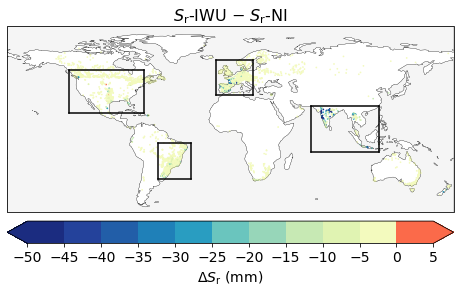

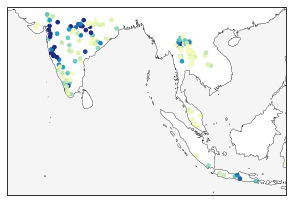

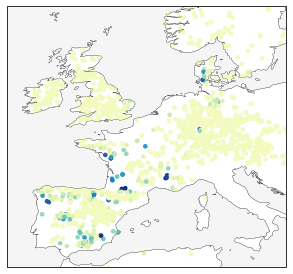

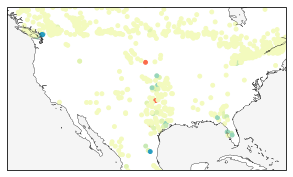

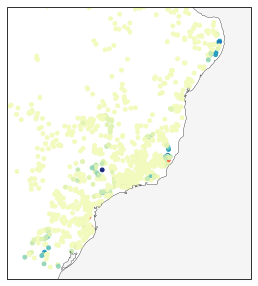

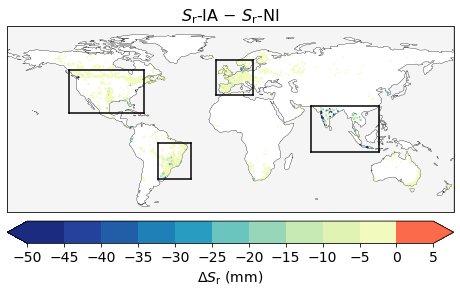

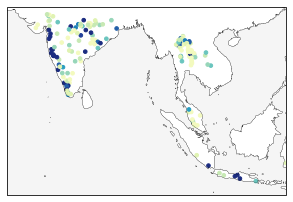

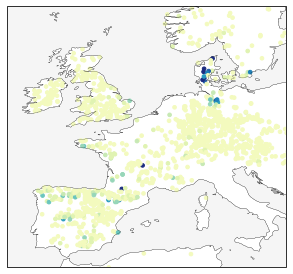

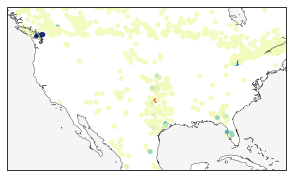

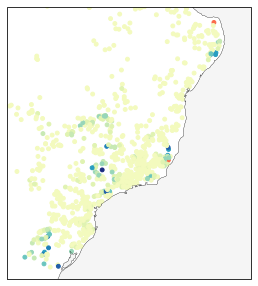

In [188]:
# ABSOLUTE DIFFERENCES IN SR
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

e_df['lat'] = sh.centroid.y
e_df['lon'] = sh.centroid.x

e_df_a = e_df[(e_df.lat<lat_max_a)&(e_df.lat>lat_min_a)&(e_df.lon<lon_max_a)&(e_df.lon>lon_min_a)]
e_df_e = e_df[(e_df.lat<lat_max_e)&(e_df.lat>lat_min_e)&(e_df.lon<lon_max_e)&(e_df.lon>lon_min_e)]
e_df_u = e_df[(e_df.lat<lat_max_u)&(e_df.lat>lat_min_u)&(e_df.lon<lon_max_u)&(e_df.lon>lon_min_u)]
e_df_s = e_df[(e_df.lat<lat_max_s)&(e_df.lat>lat_min_s)&(e_df.lon<lon_max_s)&(e_df.lon>lon_min_s)]


bounds = np.linspace(-50,5,12)
bounds=[-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.000001, 5.]
bounds2 = np.linspace(-50,5,12)
norm = mpl.colors.BoundaryNorm(bounds, cmap_srdiff.N)

# no irrigation vs fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-')
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-')
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-')
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-')

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fiwu'],s=0.5,cmap=cmap_srdiff,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# ax.annotate(f'Median: {np.round(e_df.f0_fiwu.median(),1)} mm',(-170,-50),size=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta S_\mathrm{r}$ (mm)', size=14)
ax.set_title('$S_\mathrm{r}$-IWU $-$ $S_\mathrm{r}$-NI',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fiwu.jpg',bbox_inches='tight',dpi=300)

# Asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fiwu'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_a.f0_fiwu.median(),1)} mm',(68,-8),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fiwu_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fiwu'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_e.f0_fiwu.median(),1)} mm',(-10,60),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fiwu_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fiwu'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_u.f0_fiwu.median(),1)} mm',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fiwu_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fiwu'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_s.f0_fiwu.median(),1)} mm',(-54.5,-7),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fiwu_sa.jpg',bbox_inches='tight',dpi=300)


# no irrigation vs fia
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-')
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-')
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-')
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-')

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fopt'],s=0.5,cmap=cmap_srdiff,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# ax.annotate(f'Median: {np.round(e_df.f0_fiwu.median(),1)} mm',(-170,-50),size=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta S_\mathrm{r}$ (mm)', size=14)
ax.set_title('$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fia.jpg',bbox_inches='tight',dpi=300)

# Asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fopt'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_a.f0_fiwu.median(),1)} mm',(68,-8),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fia_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fopt'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_e.f0_fiwu.median(),1)} mm',(-10,60),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fia_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fopt'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_u.f0_fiwu.median(),1)} mm',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fia_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=e_df['f0_fopt'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(e_df_s.f0_fiwu.median(),1)} mm',(-54.5,-7),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srdiff_map_T2_no_irrigation_fia_sa.jpg',bbox_inches='tight',dpi=300)


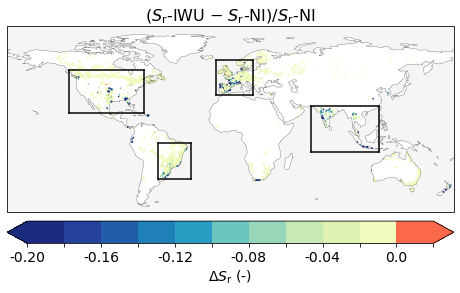

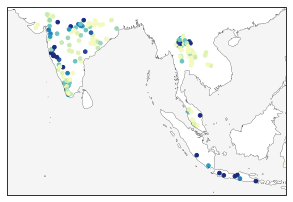

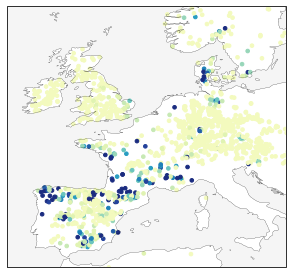

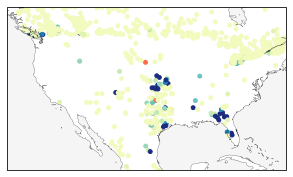

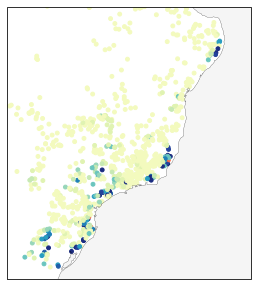

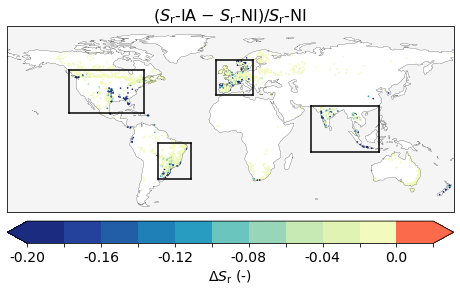

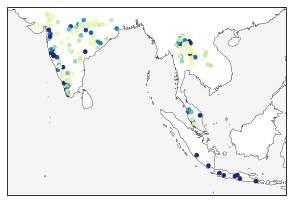

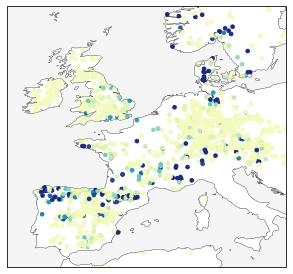

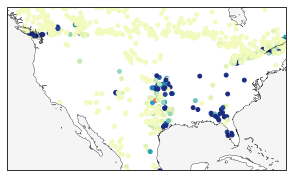

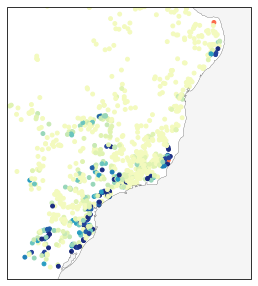

In [187]:
# RELATIVE DIFFERENCES IN SR
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

er_df['lat'] = sh.centroid.y
er_df['lon'] = sh.centroid.x

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

bounds = np.linspace(-0.2,0.02,12)
bounds=[-0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,-0.02,  0.000000001  ,  0.02]
bounds2 = np.linspace(-0.2,0.02,12)
norm = mpl.colors.BoundaryNorm(bounds, cmap_srdiff.N)

# no irrigation vs fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-',zorder=2)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=0.5,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta S_\mathrm{r}$ (-)', size=14)
cbar.ax.set_xticklabels(['-0.20','','-0.16','','-0.12','','-0.08','','-0.04','','0.0',''])
ax.set_title('($S_\mathrm{r}$-IWU $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fiwu.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fiwu'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_a.f0_fiwu.median(),1)} %',(68,-8),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fiwu_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_e.f0_fiwu.median(),1)} %',(-10,60),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fiwu_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_u.f0_fiwu.median(),1)} %',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fiwu_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_s.f0_fiwu.median(),1)} %',(-54.5,-7),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fiwu_sa.jpg',bbox_inches='tight',dpi=300)


# no irrigation vs fia
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN,zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k-',zorder=2)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k-',zorder=2)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k-',zorder=2)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k-')
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k-')
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k-')
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k-')

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k-')
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k-')
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k-')
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k-')

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k-')
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k-')
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k-')
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k-')

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=0.5,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta S_\mathrm{r}$ (-)', size=14)
cbar.ax.set_xticklabels(['-0.20','','-0.16','','-0.12','','-0.08','','-0.04','','0.0',''])
ax.set_title('($S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fia.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fopt'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_a.f0_fiwu.median(),1)} %',(68,-8),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fia_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=13,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_e.f0_fiwu.median(),1)} %',(-10,60),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fia_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.15)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_u.f0_fiwu.median(),1)} %',(-128,23),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fia_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.015)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt'],s=15,cmap=cmap_srdiff,norm=norm)
# ax.annotate(f'Median: {np.round(er_df_s.f0_fiwu.median(),1)} %',(-54.5,-7),size=14)
# cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=14)
# ax.set_title('$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU (mm)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/srreldiff_map_T2_no_irrigation_fia_sa.jpg',bbox_inches='tight',dpi=300)


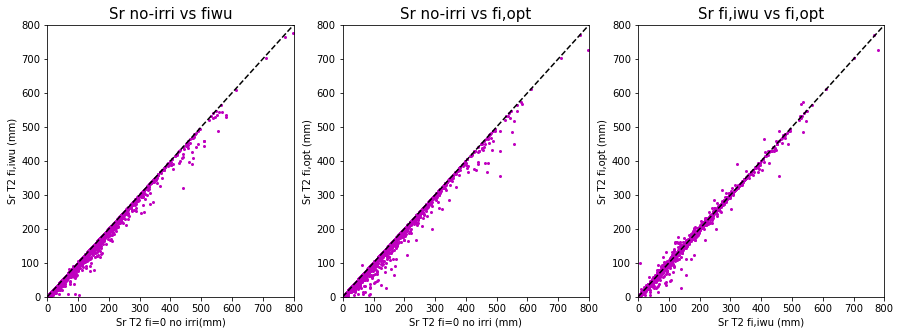

In [179]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(sr_df.sr_2_f0, sr_df.sr_2_fiwu, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri(mm)')
ax.set_ylabel('Sr T2 fi,iwu (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fiwu',fontsize=15)

ax = fig.add_subplot(132)
ax.plot(sr_df.sr_2_f0, sr_df.sr_2_fopt, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi=0 no irri (mm)')
ax.set_ylabel('Sr T2 fi,opt (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fopt).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr no-irri vs fi,opt',fontsize=15)

ax = fig.add_subplot(133)
ax.plot(sr_df.sr_2_fiwu, sr_df.sr_2_fopt, 'mo',markersize=2)
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T2 fi,iwu (mm)')
ax.set_ylabel('Sr T2 fi,opt (mm)')
# ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_fiwu-sr_df.sr_20_fopt).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Sr fi,iwu vs fi,opt',fontsize=15)

fig.savefig(f'{work_dir}/output/figures/irrigation/sr_differences_f_irrigation.jpg', dpi=300, bbox_inches='tight')


# IA STRATIFICATION

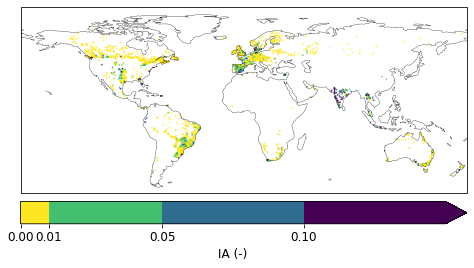

In [133]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

# MAKE MAP OF AI
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]

ir2['lat'] = cc.lat
ir2['lon'] = cc.lon

ir2 = ir2.loc[e_df.index]
ir = ir2.hi

bounds = [0,0.0100001,0.0500001,0.100001,0.15]
bounds2 =[0,0.01,0.05,0.1]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(ir),s=0.2,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='IA (-)', size=12)
fig.savefig(f'{work_dir}/output/figures/irrigation/ia_map.jpg',bbox_inches='tight',dpi=300)

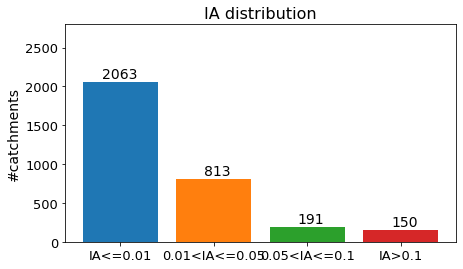

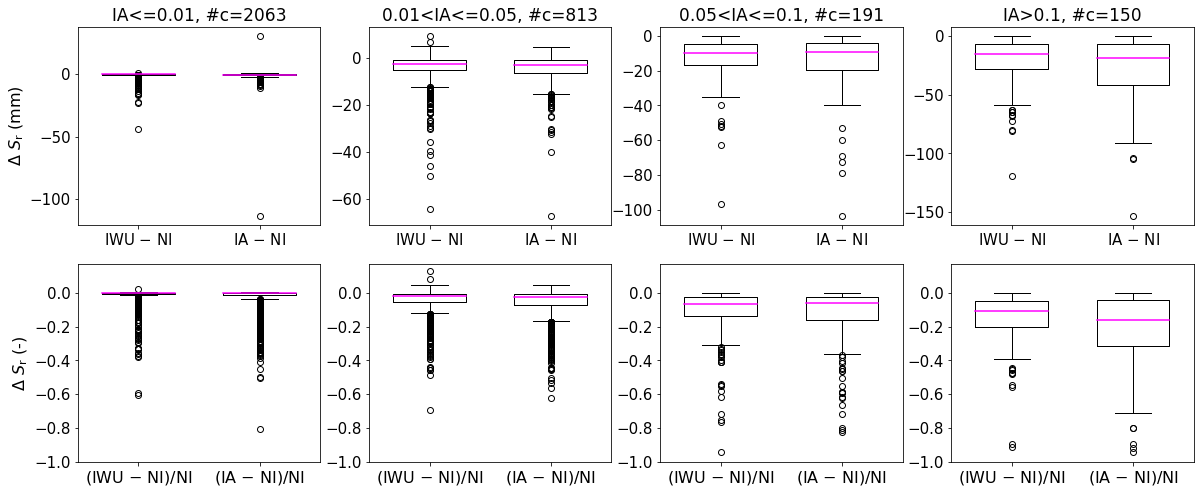

In [80]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ir>0)&(ir<=0.01)]
e_df1 = e_df[(ir>0.01)&(ir<=0.05)]
e_df5 = e_df[(ir>0.05)&(ir<=0.1)]
e_df10 = e_df[(ir>0.1)]

#rel - IA bins
er_df0 = er_df[(ir>0)&(ir<=0.01)]
er_df1 = er_df[(ir>0.01)&(ir<=0.05)]
er_df5 = er_df[(ir>0.05)&(ir<=0.1)]
er_df10 = er_df[(ir>0.1)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df5.count()[0])
ax.bar(3,e_df10.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df5.count()[0]}',(1.9,e_df5.count()[0]+50),size=14)
ax.annotate(f'{e_df10.count()[0]}',(2.9,e_df10.count()[0]+50),size=14)
ax.set_ylim(0,2800)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['IA<=0.01','0.01<IA<=0.05','0.05<IA<=0.1','IA>0.1'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'IA distribution',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins.jpg', dpi=300, bbox_inches='tight')

boxprops = dict(color="black",linewidth=1)
medianprops = dict(color="magenta",linewidth=1.5)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(241)
# plt.subplots_adjust(hspace=0.08)
ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'IA<=0.01, #c={e_df0.count()[0]}',size=17)

ax = fig.add_subplot(242)
ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'0.01<IA<=0.05, #c={e_df1.count()[0]}',size=17)

ax = fig.add_subplot(243)
ax.boxplot(e_df5,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'0.05<IA<=0.1, #c={e_df5.count()[0]}',size=17)

ax = fig.add_subplot(244)
ax.boxplot(e_df10,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=17)


# boxplot of Sr differences - REL
# fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(245)
ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-1,0.17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (-)',size=16)
# ax.set_title(f'IA<0.01, #c={e_df0.count()[0]}',size=15)

ax = fig.add_subplot(246)
ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-1,0.17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.01<IA<0.05, #c={e_df1.count()[0]}',size=15)

ax = fig.add_subplot(247)
ax.boxplot(er_df5,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-1,0.17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.05<IA<0.1, #c={e_df5.count()[0]}',size=15)

ax = fig.add_subplot(248)
ax.boxplot(er_df10,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-1,0.17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=15)
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_srdiff_ia.jpg', dpi=300, bbox_inches='tight')


In [81]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values
d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values
d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2

d['med5']=np.round(e_df5.median(),2).values
d['std5']=np.round(e_df5.std(),2).values
d['iqr5/2']=np.round((e_df5.quantile(0.75)-e_df5.quantile(0.25)),2).values/2

d['med10']=np.round(e_df10.median(),2).values
d['std10']=np.round(e_df10.std(),2).values
d['iqr10/2']=np.round((e_df10.quantile(0.75)-e_df10.quantile(0.25)),2).values/2

d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -0.00  1.74   0.175 -2.37  6.24   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI    -0.25  2.81   0.495 -3.14  5.35   

                                            iqr1/2   med5   std5  iqr5/2  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   2.320 -10.05  12.76   6.220   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      2.915  -9.36  14.73   7.815   

                                            med10  std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -15.33  20.05   10.595  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI    -18.48  26.82   17.310

In [82]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
d['std0']=np.round(er_df0.std(),2).values
d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

d['med1']=np.round(er_df1.median(),2).values
d['std1']=np.round(er_df1.std(),2).values
d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2

d['med5']=np.round(er_df5.median(),2).values
d['std5']=np.round(er_df5.std(),2).values
d['iqr5/2']=np.round((er_df5.quantile(0.75)-er_df5.quantile(0.25)),2).values/2

d['med10']=np.round(er_df10.median(),2).values
d['std10']=np.round(er_df10.std(),2).values
d['iqr10/2']=np.round((er_df10.quantile(0.75)-er_df10.quantile(0.25)),2).values/2
d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI  -0.0  0.04   0.000 -0.02  0.08   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI     -0.0  0.06   0.005 -0.03  0.10   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.025 -0.06  0.16   0.055  -0.11   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.035 -0.06  0.18   0.070  -0.16   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.15    0.075  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.22    0.135

## IA + REGION STRATIFICATION

In [166]:
def boxplots_region_ia(e_df,er_df,region):

    ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
    ir = ir2.hi

    e_df = e_df.dropna()
    er_df = er_df.dropna()
    e_df=e_df.iloc[:,0:2]
    er_df=er_df.iloc[:,0:2]

    #abs - IA bins
    e_df0 = e_df[(ir>0)&(ir<=0.05)]
    e_df1 = e_df[(ir>0.05)]

    #rel - IA bins
    er_df0 = er_df[(ir>0)&(ir<=0.05)]
    er_df1 = er_df[(ir>0.05)]

    # histogram with #catchments
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.bar(0,e_df0.count()[0])
    ax.bar(1,e_df1.count()[0])
    ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+2),size=14)
    ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+2),size=14)
    # ax.set_ylim(0,2800)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['IA<=0.05','IA>0.05'])
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ylabel(f'#catchments',size=14)
    ax.set_title(f'IA distribution',size=16)
    fig.savefig(f'{work_dir}/output/figures/irrigation/boxplots/histogram_bins_{region}.jpg', dpi=300, bbox_inches='tight')

    boxprops = dict(color="black",linewidth=1)
    medianprops = dict(color="magenta",linewidth=1.5)

    # boxplot of Sr differences - ABS
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    # plt.subplots_adjust(hspace=0.08)
    ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
    ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
    ax.set_title(f'{region}, #c={e_df0.count()[0]}',size=17)
    fig.savefig(f'{work_dir}/output/figures/irrigation/boxplots/boxplot_abs_srdiff_ia1_{region}.jpg', dpi=300, bbox_inches='tight')

    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
    ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
    ax.set_title(f'{region}, #c={e_df1.count()[0]}',size=17)
    fig.savefig(f'{work_dir}/output/figures/irrigation/boxplots/boxplot_abs_srdiff_ia2_{region}.jpg', dpi=300, bbox_inches='tight')


    # boxplot of Sr differences - REL
    # fig = plt.figure(figsize=(20,4))
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
    ax.set_ylim(-1,0.17)
    # ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
    ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (-)',size=16)
    ax.set_title(f'{region}, #c={e_df0.count()[0]}',size=15)
    fig.savefig(f'{work_dir}/output/figures/irrigation/boxplots/boxplot_rel_srdiff_ia1_{region}.jpg', dpi=300, bbox_inches='tight')


    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
    ax.set_ylim(-1,0.17)
    # ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
    ax.set_xticklabels(['(IWU $-$ NI)/NI','(IA $-$ NI)/NI'])
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (-)',size=16)
    ax.set_title(f'{region}, #c={e_df1.count()[0]}',size=15)
    fig.savefig(f'{work_dir}/output/figures/irrigation/boxplots/boxplot_rel_srdiff_ia2_{region}.jpg', dpi=300, bbox_inches='tight')
    
    # print tables
    d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
    d['med0']=np.round(e_df0.median(),2).values
    d['std0']=np.round(e_df0.std(),2).values
    # d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

    d['med1']=np.round(e_df1.median(),2).values
    d['std1']=np.round(e_df1.std(),2).values
    # d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2
    print(d)
    
    d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
    d['med0']=np.round(er_df0.median(),2).values
    d['std0']=np.round(er_df0.std(),2).values
    # d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

    d['med1']=np.round(er_df1.median(),2).values
    d['std1']=np.round(er_df1.std(),2).values
    # d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2
    print(d)


                                            med0   std0   med1   std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -2.57  11.19 -20.58  21.76
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI    -4.77  10.99 -21.50  28.94
                                            med0  std0  med1  std1
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -0.02  0.11 -0.08  0.18
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI    -0.03  0.13 -0.09  0.22


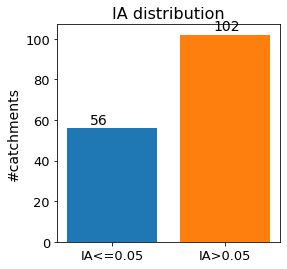

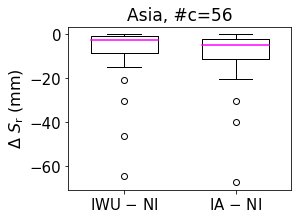

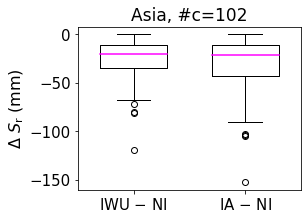

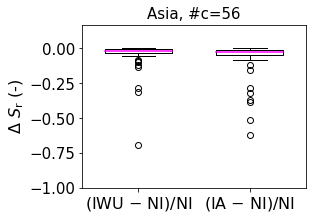

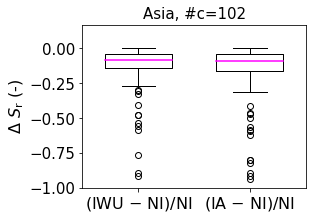

In [171]:
boxplots_region_ia(e_df_a,er_df_a,'Asia')
# boxplots_region_ia(e_df_e,er_df_e,'Europe')
# boxplots_region_ia(e_df_u,er_df_u,'North-America')
# boxplots_region_ia(e_df_s,er_df_s,'South-America')

# IWU STRATIFICATION

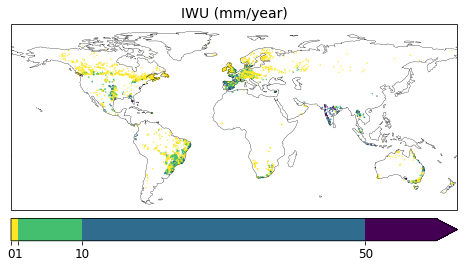

In [147]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

# MAKE MAP OF AI
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]

iwu = iwu.loc[e_df.index]
ir = iwu['iwu_mean_mmday']*365

bounds = [0,1.00001,10.00001,50.00001,60]
bounds2 =[0,1,10,50]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(ir),s=0.2,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
ax.set_title('IWU (mm/year)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/iwu_map.jpg',bbox_inches='tight',dpi=300)

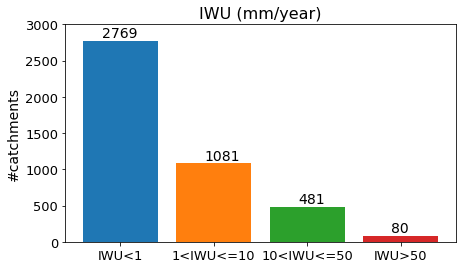

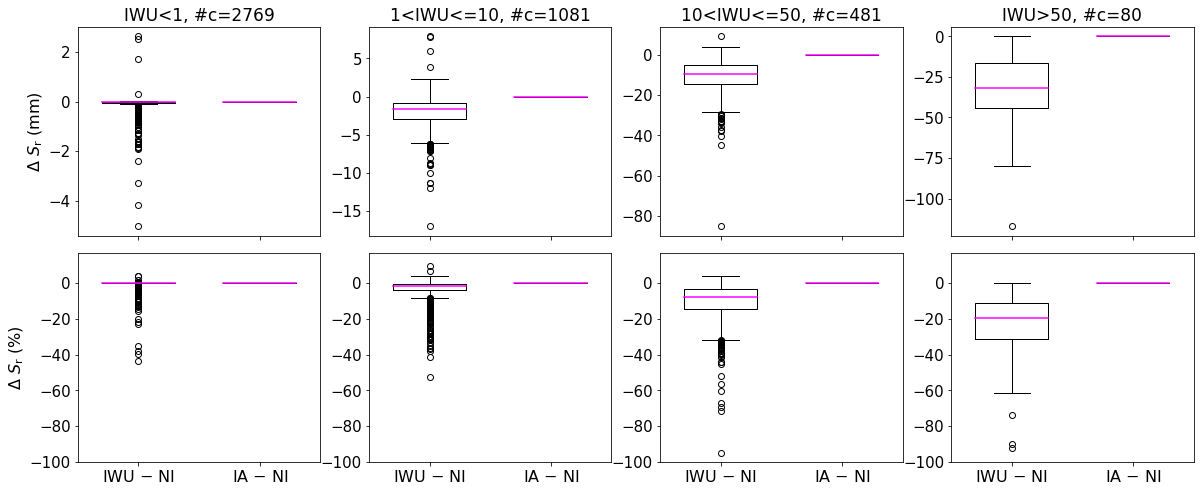

In [123]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
ir = iwu['iwu_mean_mmday']*365

e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ir<1)]
e_df1 = e_df[(ir>1)&(ir<=10)]
e_df5 = e_df[(ir>10)&(ir<=50)]
e_df10 = e_df[(ir>50)]

#rel - IA bins
er_df0 = er_df[(ir<1)]
er_df1 = er_df[(ir>1)&(ir<=10)]
er_df5 = er_df[(ir>10)&(ir<=50)]
er_df10 = er_df[(ir>50)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df5.count()[0])
ax.bar(3,e_df10.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df5.count()[0]}',(1.9,e_df5.count()[0]+50),size=14)
ax.annotate(f'{e_df10.count()[0]}',(2.9,e_df10.count()[0]+50),size=14)
ax.set_ylim(0,3000)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['IWU<1','1<IWU<=10','10<IWU<=50','IWU>50'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'IWU (mm/year)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins_iwu.jpg', dpi=300, bbox_inches='tight')

boxprops = dict(color="black",linewidth=1)
medianprops = dict(color="magenta",linewidth=1.5)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(241)
plt.subplots_adjust(hspace=0.08)
ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'IWU<1, #c={e_df0.count()[0]}',size=17)

ax = fig.add_subplot(242)
ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'1<IWU<=10, #c={e_df1.count()[0]}',size=17)

ax = fig.add_subplot(243)
ax.boxplot(e_df5,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'10<IWU<=50, #c={e_df5.count()[0]}',size=17)

ax = fig.add_subplot(244)
ax.boxplot(e_df10,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'IWU>50, #c={e_df10.count()[0]}',size=17)


# boxplot of Sr differences - REL
# fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(245)
ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (%)',size=16)
# ax.set_title(f'IA<0.01, #c={e_df0.count()[0]}',size=15)

ax = fig.add_subplot(246)
ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.01<IA<0.05, #c={e_df1.count()[0]}',size=15)

ax = fig.add_subplot(247)
ax.boxplot(er_df5,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.05<IA<0.1, #c={e_df5.count()[0]}',size=15)

ax = fig.add_subplot(248)
ax.boxplot(er_df10,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=15)
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_srdiff_iwu.jpg', dpi=300, bbox_inches='tight')


In [60]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values
d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values
d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2

d['med5']=np.round(e_df5.median(),2).values
d['std5']=np.round(e_df5.std(),2).values
d['iqr5/2']=np.round((e_df5.quantile(0.75)-e_df5.quantile(0.25)),2).values/2

d['med10']=np.round(e_df10.median(),2).values
d['std10']=np.round(e_df10.std(),2).values
d['iqr10/2']=np.round((e_df10.quantile(0.75)-e_df10.quantile(0.25)),2).values/2

d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.0  0.25    0.02 -1.61  1.91   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.0  0.00    0.00  0.00  0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   1.055 -9.32  8.66   4.675 -32.11   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.000  0.00  0.00   0.000   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI  21.62    13.72  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.00     0.00

In [61]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
d['std0']=np.round(er_df0.std(),2).values
d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

d['med1']=np.round(er_df1.median(),2).values
d['std1']=np.round(er_df1.std(),2).values
d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2

d['med5']=np.round(er_df5.median(),2).values
d['std5']=np.round(er_df5.std(),2).values
d['iqr5/2']=np.round((er_df5.quantile(0.75)-er_df5.quantile(0.25)),2).values/2

d['med10']=np.round(er_df10.median(),2).values
d['std10']=np.round(er_df10.std(),2).values
d['iqr10/2']=np.round((er_df10.quantile(0.75)-er_df10.quantile(0.25)),2).values/2
d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.0  1.91   0.025 -1.78  5.94   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.0  0.00   0.000  0.00  0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI    1.52 -7.98  12.1    5.74 -19.55   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.00  0.00   0.0    0.00   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   17.7    10.01  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.0     0.00

# ARIDITY STRATIFICATION

In [148]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

(0.0, 6.0)

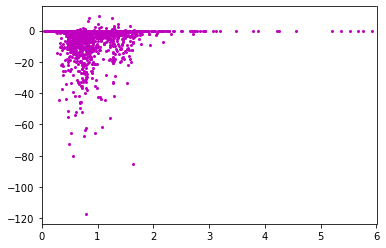

In [151]:
# Sr diff vs Aridity index
# e_df2=e_df[e_df['f0_fiwu']<0]

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai
ai = ai[e_df.index]

cc = cc.loc[e_df.index]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(ai,e_df['[fi,iwu] - [fi=0]'],'mo',markersize=2)
ax.set_xlim(0,6)

(0.0, 6.0)

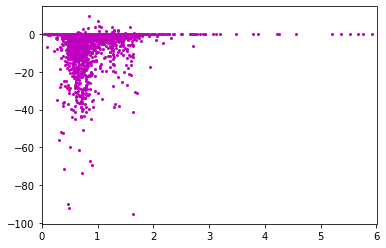

In [152]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(ai,er_df['[fi,iwu] - [fi=0]'],'mo',markersize=2)
ax.set_xlim(0,6)

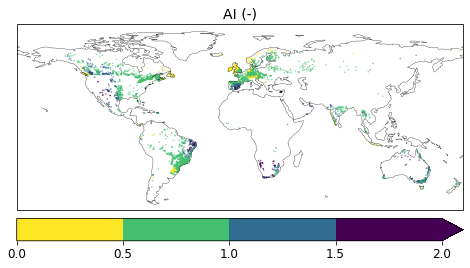

In [153]:
# MAKE MAP OF AI
# bounds = np.linspace(0,3,11)
# bounds2 = np.linspace(0,3,11)
bounds = [0,0.5,1,1.5,2]
bounds2 =[0,0.5,1,1.5,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
ax.set_title('AI (-)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/ai_map.jpg',bbox_inches='tight',dpi=300)

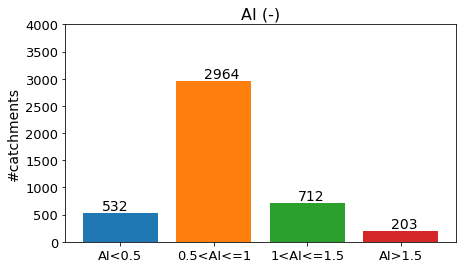

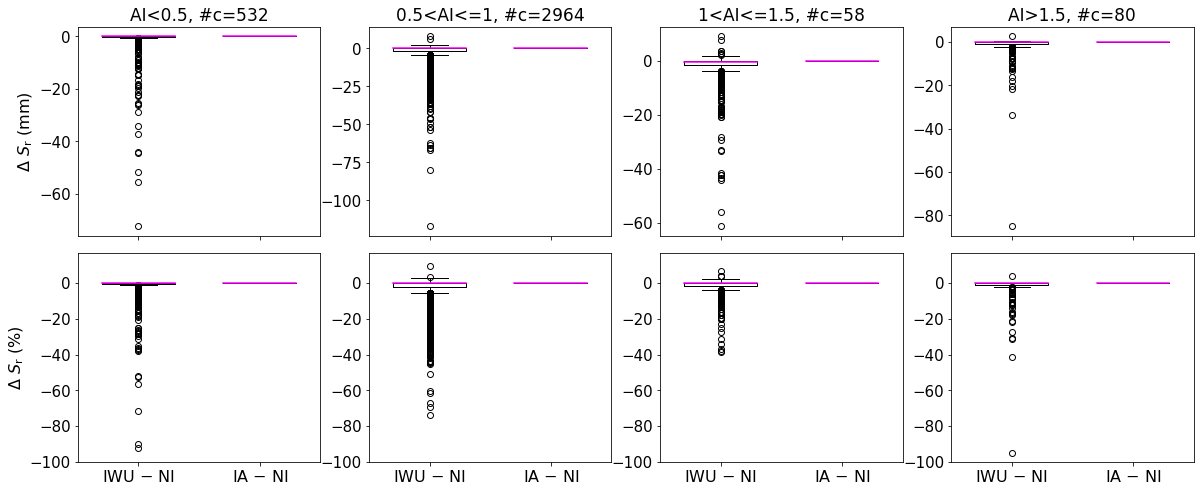

In [119]:
e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ai<0.5)]
e_df1 = e_df[(ai>0.5)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.5)]
e_df3 = e_df[(ai>1.5)]

#rel - IA bins
er_df0 = er_df[(ai<0.5)]
er_df1 = er_df[(ai>0.5)&(ai<=1)]
er_df2 = er_df[(ai>1)&(ai<=1.5)]
er_df3 = er_df[(ai>1.5)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df2.count()[0])
ax.bar(3,e_df3.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df2.count()[0]}',(1.9,e_df2.count()[0]+50),size=14)
ax.annotate(f'{e_df3.count()[0]}',(2.9,e_df3.count()[0]+50),size=14)
ax.set_ylim(0,4000)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['AI<0.5','0.5<AI<=1','1<AI<=1.5','AI>1.5'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'AI (-)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins_ai.jpg', dpi=300, bbox_inches='tight')

boxprops = dict(color="black",linewidth=1)
medianprops = dict(color="magenta",linewidth=1.5)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(241)
plt.subplots_adjust(hspace=0.08)
ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI<0.5, #c={e_df0.count()[0]}',size=17)

ax = fig.add_subplot(242)
ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'0.5<AI<=1, #c={e_df1.count()[0]}',size=17)

ax = fig.add_subplot(243)
ax.boxplot(e_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'1<AI<=1.5, #c={e_df5.count()[0]}',size=17)

ax = fig.add_subplot(244)
ax.boxplot(e_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI>1.5, #c={e_df10.count()[0]}',size=17)


# boxplot of Sr differences - REL
# fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(245)
ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (%)',size=16)
# ax.set_title(f'IA<0.01, #c={e_df0.count()[0]}',size=15)

ax = fig.add_subplot(246)
ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.01<IA<0.05, #c={e_df1.count()[0]}',size=15)

ax = fig.add_subplot(247)
ax.boxplot(er_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.05<IA<0.1, #c={e_df5.count()[0]}',size=15)

ax = fig.add_subplot(248)
ax.boxplot(er_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=15)
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_srdiff_ai.jpg', dpi=300, bbox_inches='tight')


In [120]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values
d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values
d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2

d['med5']=np.round(e_df2.median(),2).values
d['std5']=np.round(e_df2.std(),2).values
d['iqr5/2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values/2

d['med10']=np.round(e_df3.median(),2).values
d['std10']=np.round(e_df3.std(),2).values
d['iqr10/2']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values/2

d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.0  6.91   0.095 -0.06  6.65   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.0  0.00   0.000  0.00  0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI    0.86 -0.13  6.29    0.73  -0.05   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.00  0.00  0.00    0.00   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   7.27     0.43  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.00     0.00

In [121]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
d['std0']=np.round(er_df0.std(),2).values
d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

d['med1']=np.round(er_df1.median(),2).values
d['std1']=np.round(er_df1.std(),2).values
d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2

d['med5']=np.round(er_df2.median(),2).values
d['std5']=np.round(er_df2.std(),2).values
d['iqr5/2']=np.round((er_df2.quantile(0.75)-er_df2.quantile(0.25)),2).values/2

d['med10']=np.round(er_df3.median(),2).values
d['std10']=np.round(er_df3.std(),2).values
d['iqr10/2']=np.round((er_df3.quantile(0.75)-er_df3.quantile(0.25)),2).values/2
d

med0  std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   0.0  9.35   0.205  -0.1  7.18   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.0  0.00   0.000   0.0  0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI    1.09  -0.1  4.56    0.74  -0.05   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.00   0.0  0.00    0.00   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI    8.8    0.455  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.0    0.000

# ARIDITY STRATIFICATION GIVEN IA>0.01

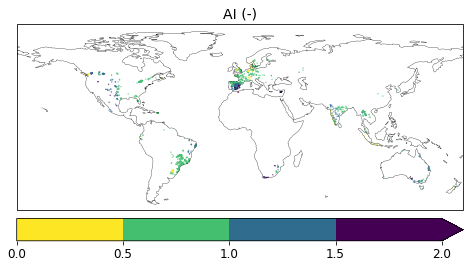

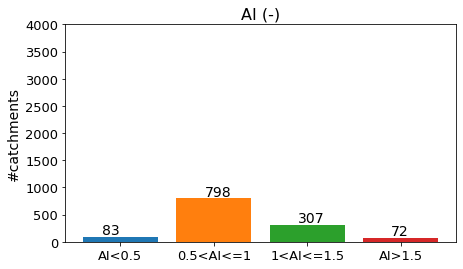

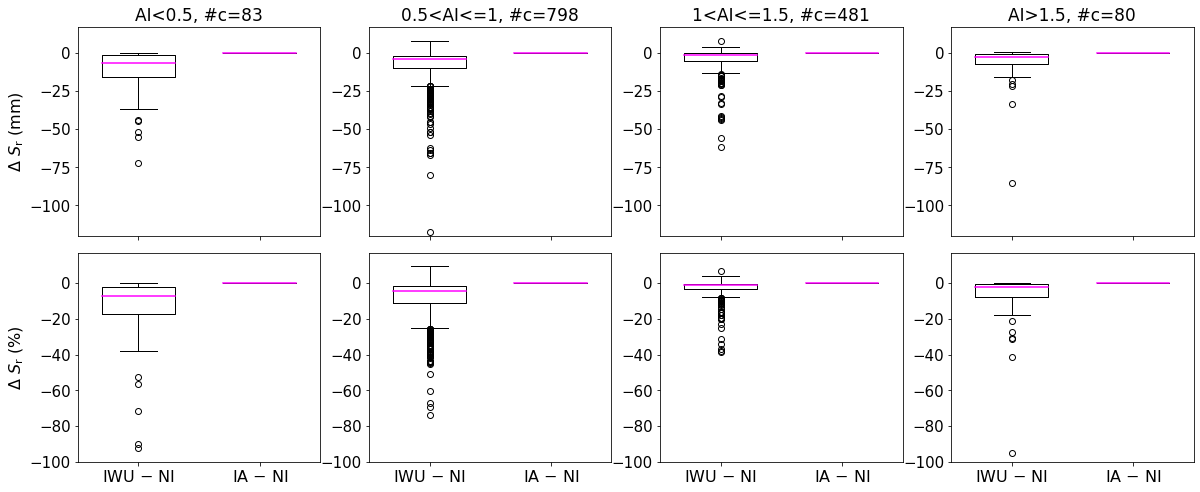

In [154]:
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er


e_df = e_df[ir>0.01]
er_df = er_df[ir>0.01]

bounds = [0,0.5,1,1.5,2]
bounds2 =[0,0.5,1,1.5,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
ax.set_title('AI (-)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/ai_map2.jpg',bbox_inches='tight',dpi=300)


e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ai<0.5)]
e_df1 = e_df[(ai>0.5)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.5)]
e_df3 = e_df[(ai>1.5)]

#rel - IA bins
er_df0 = er_df[(ai<0.5)]
er_df1 = er_df[(ai>0.5)&(ai<=1)]
er_df2 = er_df[(ai>1)&(ai<=1.5)]
er_df3 = er_df[(ai>1.5)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df2.count()[0])
ax.bar(3,e_df3.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df2.count()[0]}',(1.9,e_df2.count()[0]+50),size=14)
ax.annotate(f'{e_df3.count()[0]}',(2.9,e_df3.count()[0]+50),size=14)
ax.set_ylim(0,4000)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['AI<0.5','0.5<AI<=1','1<AI<=1.5','AI>1.5'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'AI (-)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins_ai2.jpg', dpi=300, bbox_inches='tight')

boxprops = dict(color="black",linewidth=1)
medianprops = dict(color="magenta",linewidth=1.5)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(241)
plt.subplots_adjust(hspace=0.08)
ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI<0.5, #c={e_df0.count()[0]}',size=17)

ax = fig.add_subplot(242)
ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'0.5<AI<=1, #c={e_df1.count()[0]}',size=17)

ax = fig.add_subplot(243)
ax.boxplot(e_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'1<AI<=1.5, #c={e_df5.count()[0]}',size=17)

ax = fig.add_subplot(244)
ax.boxplot(e_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI>1.5, #c={e_df10.count()[0]}',size=17)


# boxplot of Sr differences - REL
# fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(245)
ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (%)',size=16)
# ax.set_title(f'IA<0.01, #c={e_df0.count()[0]}',size=15)

ax = fig.add_subplot(246)
ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.01<IA<0.05, #c={e_df1.count()[0]}',size=15)

ax = fig.add_subplot(247)
ax.boxplot(er_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.05<IA<0.1, #c={e_df5.count()[0]}',size=15)

ax = fig.add_subplot(248)
ax.boxplot(er_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=15)
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_srdiff_ai2.jpg', dpi=300, bbox_inches='tight')


In [125]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values
d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values
d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2

d['med5']=np.round(e_df2.median(),2).values
d['std5']=np.round(e_df2.std(),2).values
d['iqr5/2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values/2

d['med10']=np.round(e_df3.median(),2).values
d['std10']=np.round(e_df3.std(),2).values
d['iqr10/2']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values/2

d

med0   std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -6.35  14.09     7.2 -4.05  10.9   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI     0.00   0.00     0.0  0.00   0.0   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   3.965 -1.52  8.87   2.555  -2.59   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.000  0.00  0.00   0.000   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI  11.34    3.475  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.00    0.000

In [126]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
d['std0']=np.round(er_df0.std(),2).values
d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

d['med1']=np.round(er_df1.median(),2).values
d['std1']=np.round(er_df1.std(),2).values
d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2

d['med5']=np.round(er_df2.median(),2).values
d['std5']=np.round(er_df2.std(),2).values
d['iqr5/2']=np.round((er_df2.quantile(0.75)-er_df2.quantile(0.25)),2).values/2

d['med10']=np.round(er_df3.median(),2).values
d['std10']=np.round(er_df3.std(),2).values
d['iqr10/2']=np.round((er_df3.quantile(0.75)-er_df3.quantile(0.25)),2).values/2
d

med0   std0  iqr0/2  med1   std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -7.45  18.58   7.625 -4.26  10.55   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI     0.00   0.00   0.000  0.00   0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   4.715 -1.34  6.09    1.55  -2.06   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.000  0.00  0.00    0.00   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI  13.49     3.68  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.00     0.00

## AI STRATIFICATION GIVEN THAT IWU>1

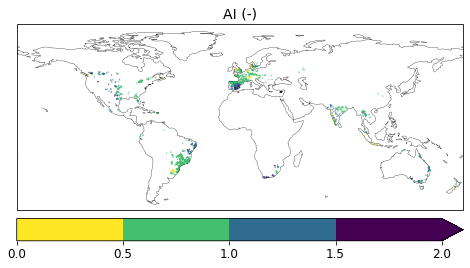

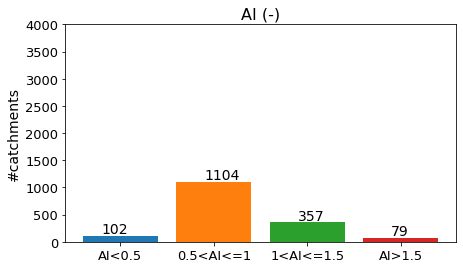

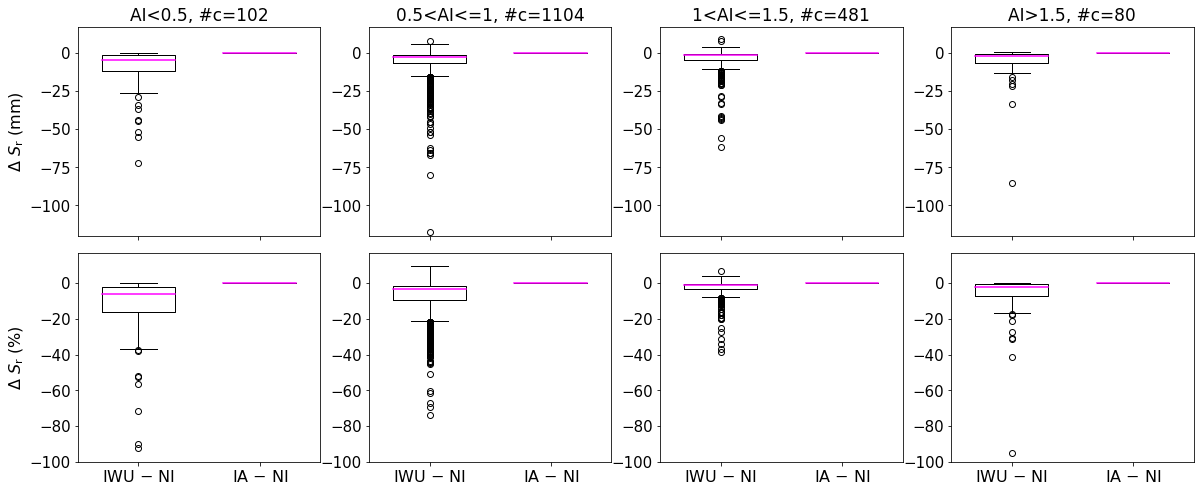

In [164]:
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
ir = iwu['iwu_mean_mmday']*365

# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

e_df = e_df[ir>1]
er_df = er_df[ir>1]

bounds = [0,0.5,1,1.5,2]
bounds2 =[0,0.5,1,1.5,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]
cc.ai = 1/cc.ai
ai = cc.ai

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
ax.set_title('AI (-)',size=14)
fig.savefig(f'{work_dir}/output/figures/irrigation/ai_map3.jpg',bbox_inches='tight',dpi=300)


e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ai<0.5)]
e_df1 = e_df[(ai>0.5)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.5)]
e_df3 = e_df[(ai>1.5)]

#rel - IA bins
er_df0 = er_df[(ai<0.5)]
er_df1 = er_df[(ai>0.5)&(ai<=1)]
er_df2 = er_df[(ai>1)&(ai<=1.5)]
er_df3 = er_df[(ai>1.5)]

# histogram with #catchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df2.count()[0])
ax.bar(3,e_df3.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df2.count()[0]}',(1.9,e_df2.count()[0]+50),size=14)
ax.annotate(f'{e_df3.count()[0]}',(2.9,e_df3.count()[0]+50),size=14)
ax.set_ylim(0,4000)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['AI<0.5','0.5<AI<=1','1<AI<=1.5','AI>1.5'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'#catchments',size=14)
ax.set_title(f'AI (-)',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins_ai3.jpg', dpi=300, bbox_inches='tight')

boxprops = dict(color="black",linewidth=1)
medianprops = dict(color="magenta",linewidth=1.5)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(241)
plt.subplots_adjust(hspace=0.08)
ax.boxplot(e_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI<0.5, #c={e_df0.count()[0]}',size=17)

ax = fig.add_subplot(242)
ax.boxplot(e_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'0.5<AI<=1, #c={e_df1.count()[0]}',size=17)

ax = fig.add_subplot(243)
ax.boxplot(e_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'1<AI<=1.5, #c={e_df5.count()[0]}',size=17)

ax = fig.add_subplot(244)
ax.boxplot(e_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['',''])
ax.set_ylim(-120,17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_title(f'AI>1.5, #c={e_df10.count()[0]}',size=17)


# boxplot of Sr differences - REL
# fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(245)
ax.boxplot(er_df0,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (%)',size=16)
# ax.set_title(f'IA<0.01, #c={e_df0.count()[0]}',size=15)

ax = fig.add_subplot(246)
ax.boxplot(er_df1,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.01<IA<0.05, #c={e_df1.count()[0]}',size=15)

ax = fig.add_subplot(247)
ax.boxplot(er_df2,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'0.05<IA<0.1, #c={e_df5.count()[0]}',size=15)

ax = fig.add_subplot(248)
ax.boxplot(er_df3,widths=0.6,boxprops=boxprops,medianprops=medianprops)
ax.set_ylim(-100,17)
# ax.set_xticklabels(['$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IWU','$S_\mathrm{r}$-NI $-$ $S_\mathrm{r}$-IA'])
ax.set_xticklabels(['IWU $-$ NI','IA $-$ NI'])
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=15)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
# ax.set_title(f'IA>0.1, #c={e_df10.count()[0]}',size=15)
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_srdiff_ai3.jpg', dpi=300, bbox_inches='tight')


In [165]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
d['std0']=np.round(e_df0.std(),2).values
d['iqr0/2']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values/2

d['med1']=np.round(e_df1.median(),2).values
d['std1']=np.round(e_df1.std(),2).values
d['iqr1/2']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values/2

d['med5']=np.round(e_df2.median(),2).values
d['std5']=np.round(e_df2.std(),2).values
d['iqr5/2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values/2

d['med10']=np.round(e_df3.median(),2).values
d['std10']=np.round(e_df3.std(),2).values
d['iqr10/2']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values/2

d

med0   std0  iqr0/2  med1  std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -4.89  13.11   5.395 -2.83  9.74   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI     0.00   0.00   0.000  0.00  0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI    2.81 -1.44  8.33    2.13  -2.25   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.00  0.00  0.00    0.00   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   10.9     3.07  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI       0.0     0.00

In [166]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
d['std0']=np.round(er_df0.std(),2).values
d['iqr0/2']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values/2

d['med1']=np.round(er_df1.median(),2).values
d['std1']=np.round(er_df1.std(),2).values
d['iqr1/2']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values/2

d['med5']=np.round(er_df2.median(),2).values
d['std5']=np.round(er_df2.std(),2).values
d['iqr5/2']=np.round((er_df2.quantile(0.75)-er_df2.quantile(0.25)),2).values/2

d['med10']=np.round(er_df3.median(),2).values
d['std10']=np.round(er_df3.std(),2).values
d['iqr10/2']=np.round((er_df3.quantile(0.75)-er_df3.quantile(0.25)),2).values/2
d

med0   std0  iqr0/2  med1   std1  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI -6.21  17.63   7.005 -3.39  10.01   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI     0.00   0.00   0.000  0.00   0.00   

                                            iqr1/2  med5  std5  iqr5/2  med10  \
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI   4.055 -1.34  5.57     1.5  -2.05   
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.000  0.00  0.00     0.0   0.00   

                                            std10  iqr10/2  
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI  13.01    3.285  
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI      0.00    0.000

In [177]:
# boxplots of absolute errors between different Sr
e_df = pd.DataFrame(index=sr_df.index)
e_df['[fi,iwu] - [fi=0]'] = f0_iwu_e
# e_df['[fi,opt] - [fi=0]'] = f0_opt_e
e_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
e_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index)
er_df['[fi,iwu] - [fi=0]'] = f0_iwu_er
# er_df['[fi,opt] - [fi=0]'] = f0_opt_er
er_df['[fi,opt] - [fi=0]'] = np.zeros(len(f0_iwu_e))
er_df['[fi,opt] - [fi,iwu]'] = fopt_iwu_er

Text(0, 0.5, 'IA')

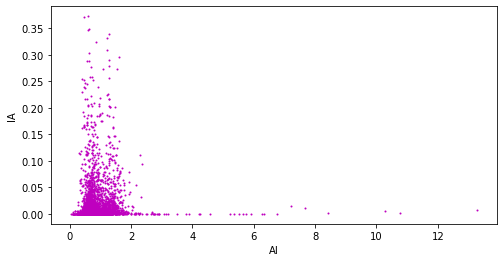

In [178]:
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir2 = ir2.loc[e_df.index]
ir = ir2.hi

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]
cc.ai = 1/cc.ai
ai = cc.ai

plt.figure(figsize=(8,4))
plt.plot(ai,ir,'mo',markersize=1)
plt.xlabel('AI')
plt.ylabel('IA')

Text(0, 0.5, 'IWU (mm/yr)')

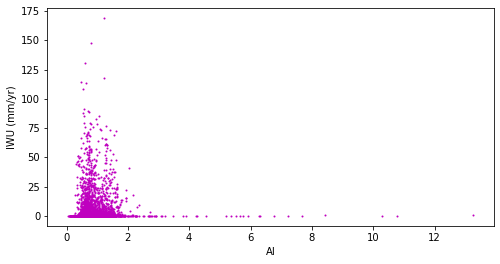

In [179]:
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
iwu = iwu.loc[e_df.index]
ir = iwu['iwu_mean_mmday']*365

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]
cc.ai = 1/cc.ai
ai = cc.ai

plt.figure(figsize=(8,4))
plt.plot(ai,ir,'mo',markersize=1)
plt.xlabel('AI')
plt.ylabel('IWU (mm/yr)')

Text(0, 0.5, 'IWU (mm/yr)')

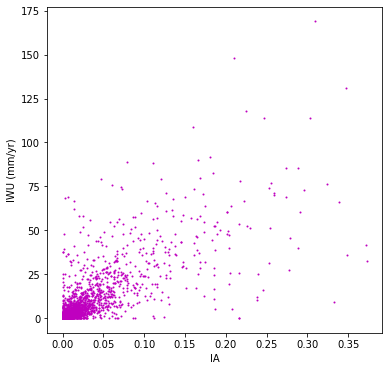

In [181]:
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
iwu = iwu.loc[e_df.index]
ir = iwu['iwu_mean_mmday']*365

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir2 = ir2.loc[e_df.index]
ir2 = ir2.hi

plt.figure(figsize=(6,6))
plt.plot(ir2,ir,'mo',markersize=1)
plt.xlabel('IA')
plt.ylabel('IWU (mm/yr)')


In [44]:
def plot_sd_timeseries(catch_id,region):
    sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
    sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
    sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
    sd_f0.index = pd.to_datetime(sd_f0.index)
    sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
    sd_fopt.index = pd.to_datetime(sd_fopt.index)

    sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
    sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
    sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

    sr_df = pd.DataFrame(index=sr_df_ni.index)
    sr_f0 = int(sr_df_ni['2'].loc[catch_id])
    sr_fiwu = int(sr_df_fiwu2['2'].loc[catch_id])
    sr_fopt = int(sr_df_f09ia['2'].loc[catch_id])

    iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
    iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
    ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
    ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 


    fig = plt.figure(figsize=(18,3))
    ax = fig.add_subplot(111)
    ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='$S_\mathrm{d}$-NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
    ax.plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='$S_\mathrm{d}$-IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
    ax.plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='$S_\mathrm{d}$-IA, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
    ax.set_xlim(sd_f0.index[0],sd_f0.index[-10])

    # ax.set_yticks([-200,-100,0])
    # ax.set_ylim(-270,0)
    ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(ncol=3, fontsize=16, loc='lower left')
    ax.set_title('Region: '+str(region)+', $\mathrm{IWU}_{\mathrm{mean}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$, IA = '+str(ir_area),size=16)
    fig.savefig(f'{work_dir}/output/figures/irrigation/timeseries_sd_{catch_id}.jpg', dpi=300, bbox_inches='tight')


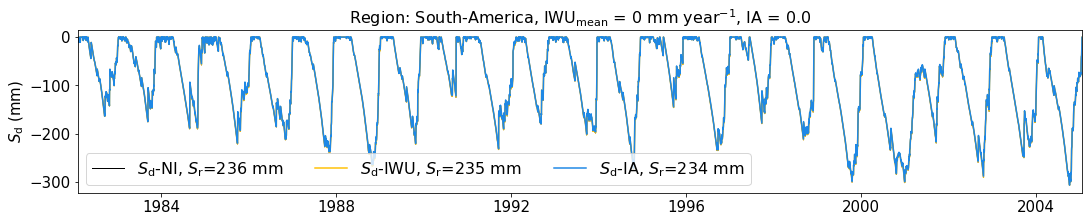

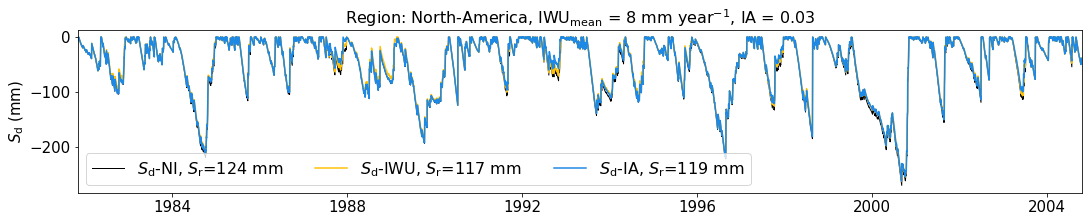

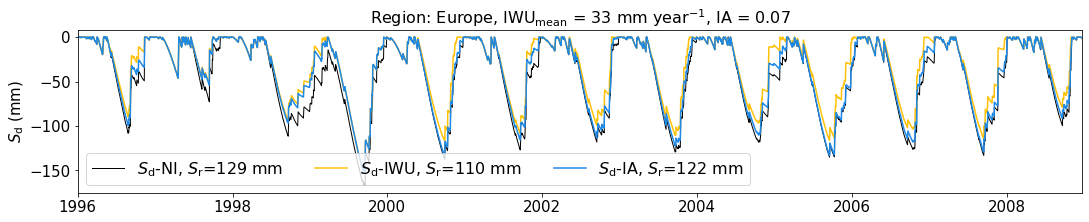

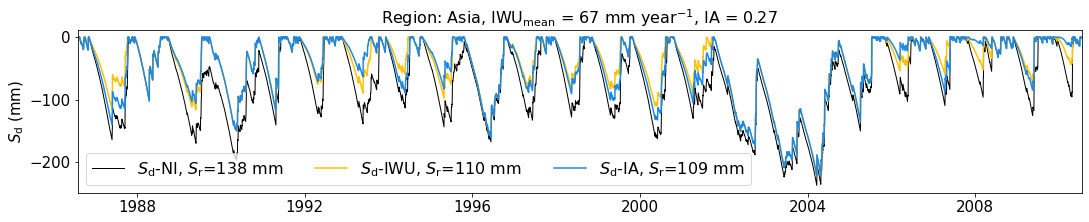

In [45]:
ca0 = 'br_0002791'
ca1 = 'us_0006399'
ca5 = 'es_0000742'
ca10 = 'in_0000134'

plot_sd_timeseries(ca0, 'South-America')
plot_sd_timeseries(ca1, 'North-America')
plot_sd_timeseries(ca5, 'Europe')
plot_sd_timeseries(ca10, 'Asia')

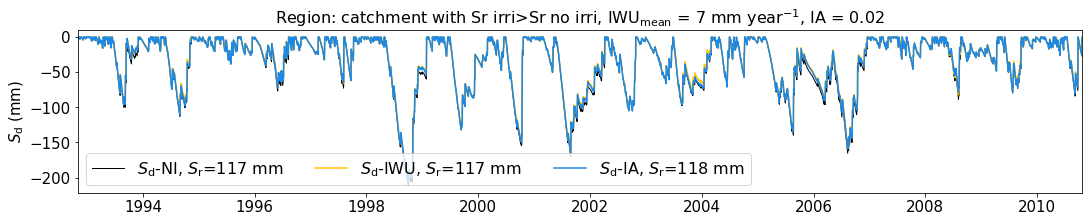

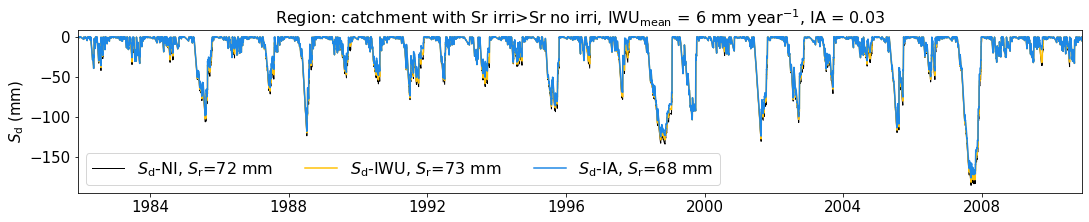

In [49]:
ca = 'us_0005876'
plot_sd_timeseries(ca, 'catchment with Sr irri>Sr no irri')

# 'br_0003169'
# 'us_0006397'
# 'br_0003116'
# 'br_0001481'


# f0_fiwu	f0_fopt	fopt_fiwu
# br_0003169	0.262	-2.402	2.664
# us_0004753	2.014	-2.651	4.665
# za_0000167	3.724	2.260	1.464
# ca_0000774	

ca = 'us_0004753'
ca = 'ca_0000774'
plot_sd_timeseries(ca, 'catchment with Sr irri>Sr no irri')

# ca = 'br_0001481'
# plot_sd_timeseries(ca, 'catchment with Sr irri>Sr no irri')

# 'za_0000167'
# 'us_0005876'

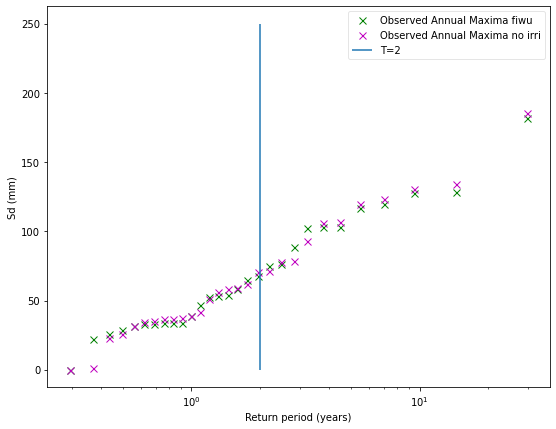

In [50]:
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(d1['T'], d1['sd'],'xg', markersize=7, label='Observed Annual Maxima fiwu')
# ax.plot(T_interest, gumbel_estimate1, ':og', label = 'Gumbel Estimate 1')
ax.plot(d2['T'], d2['sd'],'xm', markersize=7, label='Observed Annual Maxima no irri')
# ax.plot(T_interest, gumbel_estimate2, ':om', label = 'Gumbel Estimate2 ')
ax.vlines(2,0,250, label='T=2')
ax.set_xlabel('Return period (years)')
ax.set_ylabel('Sd (mm)')
ax.set_xscale('log')
ax.legend(loc='best',framealpha=0.5)
    
# plt.plot(d1['T'],d1.sd,'mo',label='fiwu')
# plt.plot(d2['T'],d2.sd,'go',label='no irri')

In [40]:
d1

sd   i         p         q         y        T_a          T
6   204.686298   1  0.052632  0.947368  2.917527  19.000000  18.495495
9   165.762687   2  0.105263  0.894737  2.196194   9.500000   8.990733
8   148.064350   3  0.157895  0.842105  1.761132   6.333333   5.819020
14  139.746345   4  0.210526  0.789474  1.442277   4.750000   4.230319
13  134.010981   5  0.263158  0.736842  1.186193   3.800000   3.274591
7   131.864773   6  0.315789  0.684211  0.968928   3.166667   2.635118
2   108.287301   7  0.368421  0.631579  0.777546   2.714286   2.176125
10  104.977884   8  0.421053  0.578947  0.604141   2.375000   1.829680
1    96.001857   9  0.473684  0.526316  0.443395   2.111111   1.557987
11   94.010003  10  0.526316  0.473684  0.291403   1.900000   1.338304
16   82.203034  11  0.578947  0.421053  0.145029   1.727273   1.156073
18   78.271125  12  0.631579  0.368421  0.001472   1.583333   1.001473
17   75.923514  13  0.684211  0.315789 -0.142089   1.461538   0.867544
4    71.577037  14  0.736842  0.263158 -0.288932   1.357143   0.749063
5    65.867582  15  0.789474  0.210526 -0.443496   1.266667   0.641789
15   45.651971  16  0.842105  0.157895 -0.612927   1.187500   0.541763
3    38.299915  17  0.894737  0.105263 -0.811504   1.117647   0.444189
12    1.571566  18  0.947368  0.052632 -1.079918   1.055556   0.339623

In [123]:
e_df5.index[0:35]

Index(['fr_0000531', 'br_0002247', 'br_0000727', 'de_0000054', 'ca_0000728',
       'in_0000143', 'th_0000138', 'ca_0004609', 'es_0000967', 'cy_0000001',
       'fr_0001322', 'in_0000236', 'de_0000371', 'es_0000954', 'es_0000472',
       'es_0000775', 'th_0000061', 'us_0001835', 'mx_0000025', 'id_0000018',
       'es_0000496', 'ca_0000542', 'br_0002096', 'in_0000277', 'my_0000005',
       'br_0001613', 'in_0000242', 'br_0002097', 'th_0000106', 'us_0004867',
       'es_0000742', 'th_0000179', 'es_0000258', 'gb_0000198', 'th_0000003'],
      dtype='object')

Text(0.5, 0, 'IA')

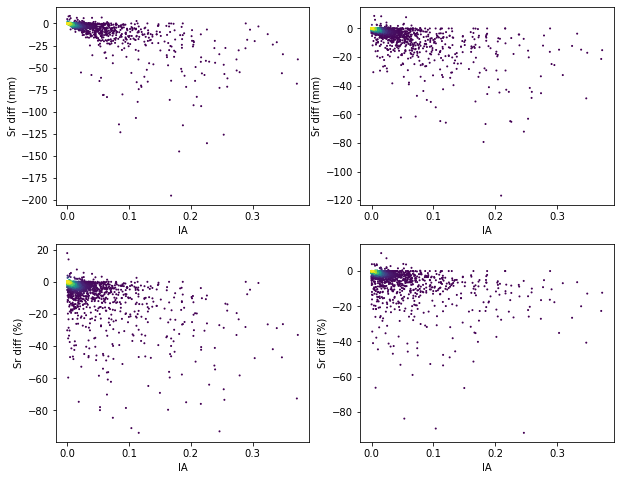

In [180]:
# PLOT SR DIFFERENCE VS IA
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
x = ir[e_df.index]
y = e_df['[fi,opt] - [fi=0]']
x = x.dropna()
y = y[x.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('Sr diff (mm)')
ax.set_xlabel('IA')

ax = fig.add_subplot(222)
x = ir[e_df.index]
y = e_df['[fi,iwu] - [fi=0]']
x = x.dropna()
y = y[x.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('Sr diff (mm)')
ax.set_xlabel('IA')

ax = fig.add_subplot(223)
x = ir[er_df.index]
y = er_df['[fi,opt] - [fi=0]']
x = x.dropna()
y = y[x.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('Sr diff (%)')
ax.set_xlabel('IA')

ax = fig.add_subplot(224)
x = ir[er_df.index]
y = er_df['[fi,iwu] - [fi=0]']
x = x.dropna()
y = y[x.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('Sr diff (%)')
ax.set_xlabel('IA')

In [185]:
sr_df

sr_2_f0   sr_2_fiwu   sr_2_fopt        lat         lon
by_0000024  129.849105  129.699534  129.587657  52.910215   27.390619
by_0000033   80.182597   80.112343   79.916797  51.321203   27.918532
us_0004753   57.218620   61.372591   58.146622  43.112270 -100.257538
pr_0000019  129.869564  127.541462  128.276379  18.251745  -66.145649
us_0006090   51.183227   50.064256   48.990329  32.570616  -97.083622
...                ...         ...         ...        ...         ...
ca_0002889   85.102861   85.102676   85.093148  52.952991 -104.196638
us_0005844    1.170734    1.141612    1.035379  34.697619  -98.576947
ru_0000428   40.469080   40.469075   40.459313  55.794324   86.225502
us_0007084   91.980684   91.946649   91.902052  32.781501 -110.324098
ca_0004712   57.124862   53.499857   33.167261  50.720333 -119.167525

[4427 rows x 5 columns]

In [ ]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)


(0.0, 0.5)

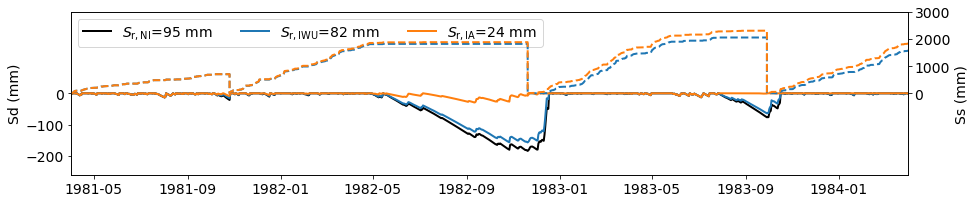

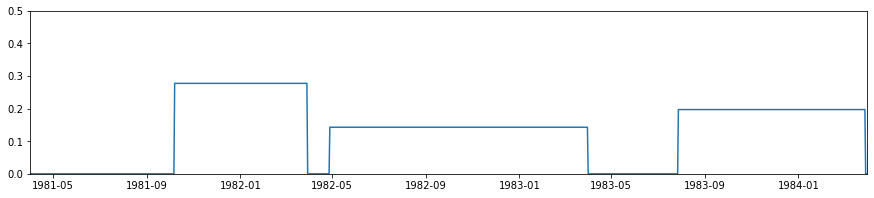

In [270]:
## PLOT TIMESERIES OF SD AND SS AND PI
c = 'id_0000009'

sd_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{c}.csv', index_col=0)
sd_ni.index = pd.to_datetime(sd_ni.index)
sd_iwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{c}_fiwu2.csv', index_col=0)
sd_iwu.index = pd.to_datetime(sd_iwu.index)
sd_opt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{c}_f0.9ia.csv', index_col=0)
sd_opt.index = pd.to_datetime(sd_opt.index)
# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_fiwu2.csv',index_col=0)
se_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/se/{catch_id}_f0.9ia.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)
se_fopt.index = pd.to_datetime(se_fopt.index)

def se_cum(sdf,sef):
    se = sdf.se2
    se_cum=[]
    for i in range(1,len(sef)):
        start = sef.start_date_se[i-1]
        end = sef.start_date_se[i]
        # end = se_fopt.end_date_irri[i]
        se0 = se[start:end]
        se0 = se0.cumsum()
        se_cum.append(se0)
    se_c = pd.concat(se_cum)
    return se_c

# se_c_f0 = se_cum(sd_f0,se_f0)
se_c_fopt = se_cum(sd_fopt,se_fopt)
se_c_fiwu = se_cum(sd_fiwu,se_fiwu)



fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
ax2 = ax.twinx()


# ax2.plot(se_c_f0.index,se_c_f0)
ax2.plot(se_c_fiwu.index,se_c_fiwu,color='tab:blue',linewidth=2,linestyle='--')
ax2.plot(se_c_fopt.index,se_c_fopt,color='tab:orange',linewidth=2,linestyle='--')
ax.plot(sd_ni.index, sd_ni.Sd,color='k',linewidth=2,label='$S_{\mathrm{r,NI}}$='+str(int(sr_df.loc[c].sr_2_f0))+' mm')
ax.plot(sd_iwu.index, sd_iwu.sd2,color='tab:blue',linewidth=2, label='$S_{\mathrm{r,IWU}}$='+str(int(sr_df.loc[c].sr_2_fiwu))+' mm')
ax.plot(sd_opt.index, sd_opt.sd2,color='tab:orange',linewidth=2, label='$S_{\mathrm{r,IA}}$='+str(int(sr_df.loc[c].sr_2_fopt))+' mm')
ax.set_ylabel('Sd (mm)')
ax.set_yticks([0,-100,-200])
ax2.set_yticks([0,1000,2000,3000])
ax.set_ylim(-260,0)
ax2.set_ylim(0,3000)
ax.set_ylabel('Sd (mm)', size=14)
ax2.set_ylabel('Ss (mm)', size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
align_yaxis(ax, 0, ax2, 0)
adjust_yaxis(ax,0,0)
ax.set_xlim(sd_ni.index[0],sd_ni.index[3*365])
ax.legend(ncol=3,fontsize=14,loc='upper left')
# ax.set_title(f'Catchment {c}, IA={np.round(s.loc[c].ia,3)},IA2={np.round(s.loc[c].ia2,3)}, fiwu={np.round(s.loc[c].fiwu,3)}, foptia={np.round(s.loc[c].foptia,3)}')

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
sd_iwu['pi'] = sd_iwu['p_irri']-sd_iwu['Pe']
ax.plot(sd_iwu.index,sd_iwu.pi)
ax.set_xlim(sd_ni.index[0],sd_ni.index[3*365])
ax.set_ylim(0,0.5)

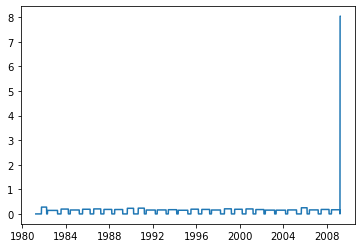

In [265]:
plt.plot(sd_iwu.pi)

In [262]:
sd_iwu['pi'] = sd_iwu['p_irri']-sd_iwu['Pe']
sd_iwu['ss'] = sd_iwu['se2']-sd_iwu['pi']
sd_iwu.ss[sd_iwu.ss<0]

1981-10-07   -0.277291
1981-10-08   -0.277291
1981-10-09   -0.277291
1981-10-10   -0.277291
1981-10-11   -0.277291
                ...   
2009-03-11   -0.168702
2009-03-12   -0.168702
2009-03-13   -0.168702
2009-03-16   -0.168702
2009-03-23   -0.168702
Name: ss, Length: 4945, dtype: float64

In [264]:
se_fiwu

start_date_se end_date_se start_date_irri  \
1970-01-01 00:00:00.000000000    1981-04-01  1981-10-26      1981-10-06   
1970-01-01 00:00:00.000000001    1981-10-26  1982-11-20      1982-04-27   
1970-01-01 00:00:00.000000002    1982-11-20  1983-09-29      1983-07-27   
1970-01-01 00:00:00.000000003    1983-09-29  1984-08-09      1984-06-01   
1970-01-01 00:00:00.000000004    1984-08-09  1985-08-01      1985-07-19   
1970-01-01 00:00:00.000000005    1985-08-01  1986-08-30      1986-07-28   
1970-01-01 00:00:00.000000006    1986-08-30  1987-09-26      1987-07-06   
1970-01-01 00:00:00.000000007    1987-09-26  1988-10-12      1988-07-01   
1970-01-01 00:00:00.000000008    1988-10-12  1989-09-30      1989-08-30   
1970-01-01 00:00:00.000000009    1989-09-30  1990-10-04      1990-08-31   
1970-01-01 00:00:00.000000010    1990-10-04  1991-10-03      1991-05-27   
1970-01-01 00:00:00.000000011    1991-10-03  1992-08-18      1992-05-31   
1970-01-01 00:00:00.000000012    1992-08-18  1993-11-11      1993-06-08   
1970-01-01 00:00:00.000000013    1993-11-11  1994-10-31      1994-05-06   
1970-01-01 00:00:00.000000014    1994-10-31  1995-09-14      1995-07-08   
1970-01-01 00:00:00.000000015    1995-09-14  1996-08-10      1996-07-06   
1970-01-01 00:00:00.000000016    1996-08-10  1997-11-13      1997-05-28   
1970-01-01 00:00:00.000000017    1997-11-13  1998-09-08      1998-08-06   
1970-01-01 00:00:00.000000018    1998-09-08  1999-09-30      1999-07-15   
1970-01-01 00:00:00.000000019    1999-09-30  2000-10-12      2000-07-30   
1970-01-01 00:00:00.000000020    2000-10-12  2001-09-30      2001-06-26   
1970-01-01 00:00:00.000000021    2001-09-30  2002-11-02      2002-05-11   
1970-01-01 00:00:00.000000022    2002-11-02  2003-10-01      2003-05-09   
1970-01-01 00:00:00.000000023    2003-10-01  2004-10-31      2004-05-31   
1970-01-01 00:00:00.000000024    2004-10-31  2005-09-14      2005-09-02   
1970-01-01 00:00:00.000000025    2005-09-14  2006-11-02      2006-05-31   
1970-01-01 00:00:00.000000026    2006-11-02  2007-10-03      2007-06-29   
1970-01-01 00:00:00.000000027    2007-10-03  2008-09-30      2008-06-10   
1970-01-01 00:00:00.000000028    2008-09-30  2009-03-25      2009-03-25   

                              end_date_irri           se         f    se_used  \
1970-01-01 00:00:00.000000000    1982-03-29   686.586136  0.070273  48.248655   
1970-01-01 00:00:00.000000001    1983-03-31  1807.254525  0.026697  48.248655   
1970-01-01 00:00:00.000000002    1984-03-28  2051.205185  0.023522  48.248655   
1970-01-01 00:00:00.000000003    1985-03-30  1900.941072  0.025381  48.248655   
1970-01-01 00:00:00.000000004    1986-03-30  2301.547119  0.020964  48.248655   
1970-01-01 00:00:00.000000005    1987-03-22  1811.054127  0.026641  48.248655   
1970-01-01 00:00:00.000000006    1988-03-26  1697.978670  0.028415  48.248655   
1970-01-01 00:00:00.000000007    1989-03-28  1566.595756  0.030798  48.248655   
1970-01-01 00:00:00.000000008    1990-03-29  2095.926356  0.023020  48.248655   
1970-01-01 00:00:00.000000009    1991-03-25  1269.688213  0.038000  48.248655   
1970-01-01 00:00:00.000000010    1992-03-28  1418.036247  0.034025  48.248655   
1970-01-01 00:00:00.000000011    1993-03-25  1398.679400  0.034496  48.248655   
1970-01-01 00:00:00.000000012    1994-03-16  1790.743901  0.026943  48.248655   
1970-01-01 00:00:00.000000013    1995-03-25  1262.115134  0.038228  48.248655   
1970-01-01 00:00:00.000000014    1996-03-15  1574.212269  0.030649  48.248655   
1970-01-01 00:00:00.000000015    1997-03-27  1653.372116  0.029182  48.248655   
1970-01-01 00:00:00.000000016    1998-03-27  2085.169503  0.023139  48.248655   
1970-01-01 00:00:00.000000017    1999-03-27  1450.327920  0.033267  48.248655   
1970-01-01 00:00:00.000000018    2000-03-26  1683.313566  0.028663  48.248655   
1970-01-01 00:00:00.000000019    2001-03-25  1870.405325  0.025796  48.248655   
1970-01-01 00:00:00.000000020    2002-03-25  1100.868091  0.043828  48.248655 

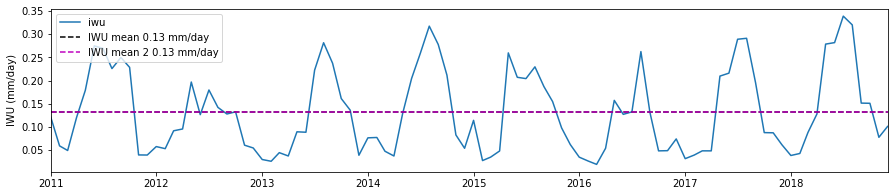

In [189]:
c = 'id_0000009'

iwu = pd.read_csv(f'{work_dir}/output/irrigation/raw2/{c}.csv',index_col=0)
iwu.index = pd.to_datetime(iwu.index)
iwu['days_in_month']=iwu.index.days_in_month
iwu['iwu_mmday'] = iwu.iwu/iwu.days_in_month
iwum = pd.read_csv(f'{work_dir}/output/irrigation/processed2/mean/{c}.csv',index_col=0)

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
ax.plot(iwu.index, iwu.iwu_mmday,label=f'iwu')
ax.hlines(iwum.values,iwu.index[0],iwu.index[-1],color='k',linestyle='--',label=f'IWU mean {np.round(iwum.values[0][0],2)} mm/day')
# ax.hlines(iwu.iwu_mmday.mean(),iwu.index[0],iwu.index[-1],color='m',linestyle='--',label=f'IWU mean 2 {np.round(iwu.iwu_mmday.mean(),2)} mm/day')
ax.set_ylabel('IWU (mm/day)')
ax.set_xlim(iwu.index[0],iwu.index[-1])
ax.legend()

In [183]:
sd_ni.index

DatetimeIndex(['1981-04-01', '1981-04-02', '1981-04-03', '1981-04-04',
               '1981-04-05', '1981-04-06', '1981-04-07', '1981-04-08',
               '1981-04-09', '1981-04-10',
               ...
               '2009-03-22', '2009-03-23', '2009-03-24', '2009-03-25',
               '2009-03-26', '2009-03-27', '2009-03-28', '2009-03-29',
               '2009-03-30', '2009-03-31'],
              dtype='datetime64[ns]', length=10227, freq=None)

In [24]:
e_df.sort_values('[fi,opt] - [fi,iwu]',ascending=False)

[fi,iwu] - [fi=0]  [fi,opt] - [fi=0]  [fi,opt] - [fi,iwu]
in_0000052         -51.023996        -194.968593           143.944597
in_0000053         -36.659626        -123.246572            86.586946
in_0000269          -7.340146         -83.381815            76.041669
id_0000019         -12.692358         -86.553660            73.861302
in_0000281          -7.717377         -81.083341            73.365964
...                       ...                ...                  ...
fr_0000362         -37.806934          -9.886418           -27.920516
in_0000015         -32.551439          -3.422322           -29.129117
in_0000083         -47.058204         -13.839701           -33.218502
in_0000026        -116.778227         -83.101429           -33.676797
in_0000016         -61.528177         -20.286011           -41.242166

[374 rows x 3 columns]

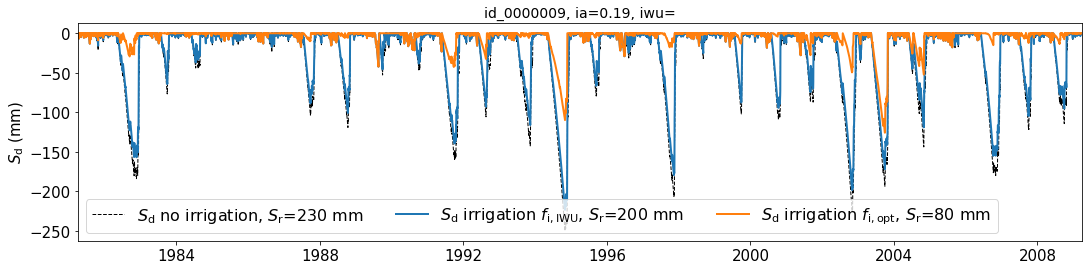

In [25]:
# catch_id = 'in_0000134'
catch_id = 'id_0000009'
# catch_id = 'de_0000056'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)
sr_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{catch_id}.csv',index_col=0)
sr_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{catch_id}_fiwu2.csv',index_col=0)
sr_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{catch_id}_f0.9ia.csv',index_col=0)
sr_f0 = int(sr_f0['20'].values[0])
sr_fiwu = int(sr_fiwu['20'].values[0])
sr_fopt = int(sr_fopt['20'].values[0])

# se = sd_fopt.se2
# se_cum=[]
# for i in range(1,len(se_fopt)):
#     start = se_fopt.start_date_se[i-1]
#     end = se_fopt.start_date_se[i]
#     # end = se_fopt.end_date_irri[i]
#     se0 = se[start:end]
#     se0 = se0.cumsum()
#     se_cum.append(se0)
# se_c = pd.concat(se_cum)

# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/se/{catch_id}_fiwu.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)

fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()

# ax.plot(se_c.index,se_c, label='Ss')
ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='--', label='$S_\mathrm{d}$ no irrigation, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax.plot(sd_fiwu.index,sd_fiwu.sd2, label='$S_\mathrm{d}$ irrigation $f_{\mathrm{i,IWU}}$, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=2)
ax.plot(sd_fopt.index,sd_fopt.sd2, label='$S_\mathrm{d}$ irrigation $f_{\mathrm{i,opt}}$, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=2)
ax.set_xlim(sd_fopt.index[0],sd_fopt.index[-1])

# ax.set_yticks([0,-50,-100,-150,-200,-250])
# ax2.set_yticks([0,50,100])
# ax.set_ylim(-200,10)
# ax2.set_ylim(-260,110)
ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
# ax2.set_ylabel('Ss (mm)', size=14)
ax.tick_params(axis='both', labelsize=15)
# ax2.tick_params(axis='y', labelsize=14)

ax.legend(ncol=3,fontsize=16)
ax.set_title(f'{catch_id}, ia={np.round(ir.loc[catch_id],2)}, iwu=',size=14)
# print(sr_f0['20'].values[0])
fig.savefig(f'{work_dir}/output/figures/irrigation/sd_timeseries_irri.jpg',dpi=200,bbox_inches='tight')

In [66]:
ia2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv', index_col=0)
f = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization.csv', index_col=0)
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined.csv', index_col=0)
sr_df_f19ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.9ia/sr_irri_f1.9ia_combined.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined.csv', index_col=0)
sr_df_f185ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.85ia/sr_irri_f1.85ia_combined.csv', index_col=0)
sr_df_f18ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.8ia/sr_irri_f1.8ia_combined.csv', index_col=0) 
sr_df_f08ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined.csv', index_col=0) 


s = pd.DataFrame(index=ia2.index, columns=['ia','fiwu','foptia','fopt-fiwu','ia2','ia2-ia','Srf0','Srfiwu','Srfopt','Srf0-Srfiwu','Srf0-Srfopt','Srfopt-Srfiwu'])
s['ia2'] = ia2['hc']
s['ia'] = f['ia']
s['fiwu']=f['fiwu']
s['foptia']=0.8*s['ia2']
s['ia2-ia'] = s['ia2']-s['ia']
s['fopt-fiwu']=s['foptia']-s['fiwu']
s['Srf0'] = sr_df_ni['20']
s['Srfiwu'] = sr_df_fiwu['20']
s['Srfopt'] = sr_df_f08ia['20']
s['Srf0-Srfiwu'] = s['Srf0'] - s['Srfiwu']
s['Srf0-Srfopt'] = s['Srf0'] - s['Srfopt']
s['Srfopt-Srfiwu'] = s['Srfopt'] - s['Srfiwu']

s = s.dropna()

In [67]:
s = s.sort_values('Srfopt-Srfiwu',ascending=True)

In [68]:
s[0:15]

ia      fiwu    foptia  fopt-fiwu       ia2    ia2-ia  \
id_0000019  0.039916  0.021283  0.122712   0.101429  0.153390  0.113475   
id_0000009  0.099445  0.034033  0.149599   0.115567  0.186999  0.087554   
in_0000269  0.017627  0.004746  0.059275   0.054529  0.074094  0.056467   
id_0000005  0.070909  0.029995  0.125620   0.095624  0.157025  0.086116   
in_0000052  0.093333  0.049141  0.128750   0.079609  0.160937  0.067604   
id_0000013  0.076532  0.029572  0.120705   0.091133  0.150882  0.074349   
in_0000281  0.094917  0.004725  0.074466   0.069742  0.093083 -0.001834   
dk_0000037  0.176010  0.104558  0.297144   0.192587  0.371430  0.195420   
in_0000053  0.065232  0.028360  0.064445   0.036084  0.080556  0.015324   
id_0000018  0.038320  0.012250  0.045397   0.033147  0.056746  0.018426   
za_0000057  0.009148  0.000000  0.172580   0.172580  0.215725  0.206577   
ca_0005090  0.140467  0.039695  0.197071   0.157376  0.246339  0.105872   
id_0000008  0.135850  0.077844  0.168304   0.090461  0.210381  0.074530   
ca_0004185  0.072126  0.000355  0.096251   0.095896  0.120314  0.048187   
in_0000055  0.031729  0.015700  0.043310   0.027610  0.054137  0.022408   

                  Srf0      Srfiwu      Srfopt  Srf0-Srfiwu  Srf0-Srfopt  \
id_0000019  273.729638  255.223962  130.134216    18.505677   143.595423   
id_0000009  230.498105  199.797395   80.035712    30.700710   150.462393   
in_0000269  182.304637  173.702087   62.680399     8.602550   119.624238   
id_0000005  342.814294  320.865424  210.295756    21.948870   132.518538   
in_0000052  558.698804  506.027699  408.868528    52.671105   149.830275   
id_0000013  147.317807  117.456196   23.413535    29.861610   123.904271   
in_0000281  227.496727  219.169947  127.644964     8.326780    99.851763   
dk_0000037  165.143954  133.510370   64.797018    31.633584   100.346935   
in_0000053  753.639129  713.655345  644.988589    39.983784   108.650540   
id_0000018  190.897882  173.462121  105.024959    17.435761    85.872923   
za_0000057   94.568074   94.568074   28.416488     0.000000    66.151586   
ca_0005090  133.086700  105.485507   39.722625    27.601194    93.364075   
id_0000008  403.126576  362.442910  299.157875    40.683666   103.968701   
ca_0004185  222.992916  222.805101  163.490697     0.187815    59.502219   
in_0000055  870.709543  849.185715  794.503024    21.523828    76.206519   

            Srfopt-Srfiwu  
id_0000019    -125.089746  
id_0000009    -119.761683  
in_0000269    -111.021688  
id_0000005    -110.569668  
in_0000052     -97.159170  
id_0000013     -94.042661  
in_0000281     -91.524983  
dk_0000037     -68.713352  
in_0000053     -68.666755  
id_0000018     -68.437162  
za_0000057     -66.151586  
ca_0005090     -65.762881  
id_0000008     -63.285034  
ca_0004185     -59.314405  
in_0000055     -54.682691

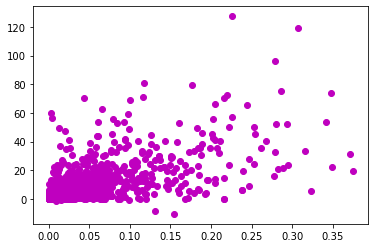

In [76]:
# plt.plot(s['ia2'],s['Srf0-Srfopt'],'mo')
plt.plot(s['ia2'],s['Srf0-Srfiwu'],'mo')

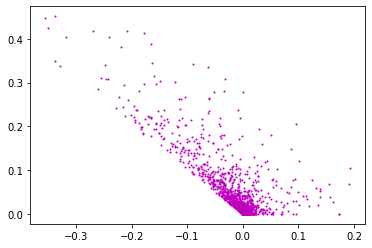

In [69]:
plt.plot(s['fopt-fiwu'], s['fiwu'],'mo',markersize=1)

In [70]:
nc_bd = f'{work_dir}/data/IWU_irri_data/IWU_2011_2018.nc'
nc = xr.open_dataset(nc_bd)
nc.time

<xarray.DataArray 'time' (time: 96)>
array([201101.5, 201102.5, 201103.5, 201104.5, 201105.5, 201106.5, 201107.5,
       201108.5, 201109.5, 201110.5, 201111.5, 201112.5, 201201.5, 201202.5,
       201203.5, 201204.5, 201205.5, 201206.5, 201207.5, 201208.5, 201209.5,
       201210.5, 201211.5, 201212.5, 201301.5, 201302.5, 201303.5, 201304.5,
       201305.5, 201306.5, 201307.5, 201308.5, 201309.5, 201310.5, 201311.5,
       201312.5, 201401.5, 201402.5, 201403.5, 201404.5, 201405.5, 201406.5,
       201407.5, 201408.5, 201409.5, 201410.5, 201411.5, 201412.5, 201501.5,
       201502.5, 201503.5, 201504.5, 201505.5, 201506.5, 201507.5, 201508.5,
       201509.5, 201510.5, 201511.5, 201512.5, 201601.5, 201602.5, 201603.5,
       201604.5, 201605.5, 201606.5, 201607.5, 201608.5, 201609.5, 201610.5,
       201611.5, 201612.5, 201701.5, 201702.5, 201703.5, 201704.5, 201705.5,
       201706.5, 201707.5, 201708.5, 201709.5, 201710.5, 201711.5, 201712.5,
       201801.5, 201802.5, 201803.5, 201804.5, 201805.5, 201806.5, 201807.5,
       201808.5, 201809.5, 201810.5, 201811.5, 201812.5], dtype=float32)
Coordinates:
  * time     (time) float32 2.011e+05 2.011e+05 ... 2.018e+05 2.018e+05
Attributes:
    standard_name:  time
    long_name:      Times
    units:          month
    calendar:       proleptic_gregorian
    axis:           T

In [71]:
iwum = pd.read_csv(f'{work_dir}/output/irrigation/processed/mean/{c}.csv',index_col=0)
iwum

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/fransjevanoors/global_sr/output/irrigation/processed/mean/0.788235294117647.csv'

In [ ]:
iwu = pd.read_csv(f'{work_dir}/output/irrigation/raw/{c}.csv',index_col=0)
iwu.index = pd.to_datetime(iwu.index)
iwu.mean().values
iwu

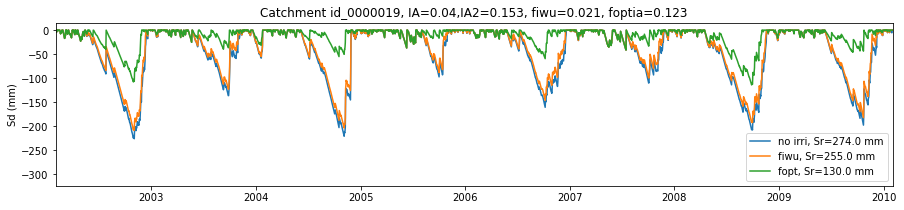

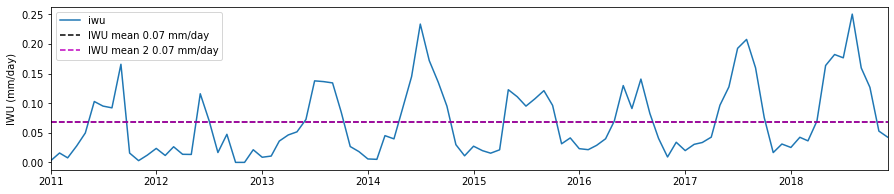

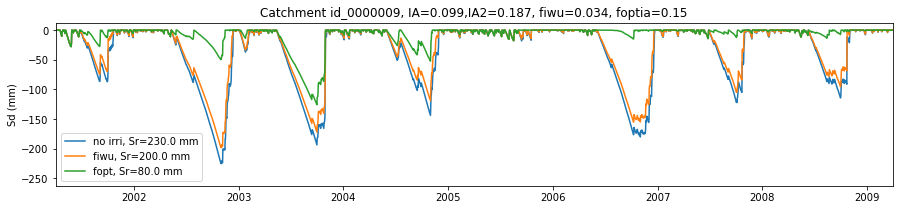

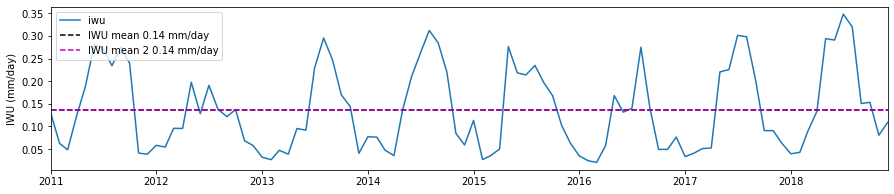

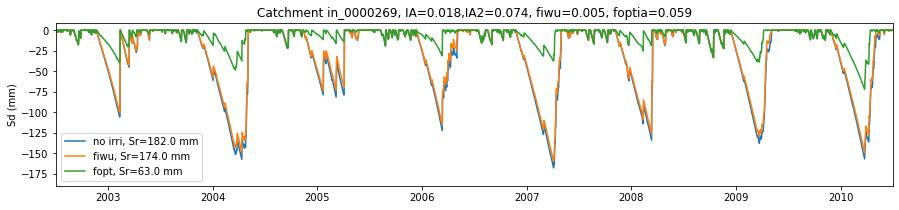

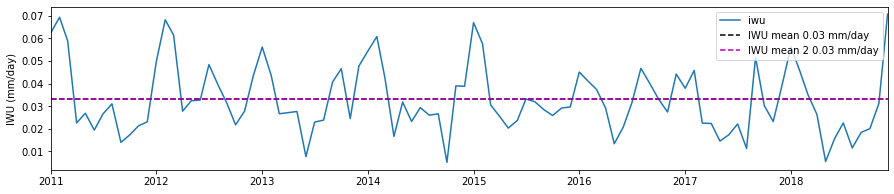

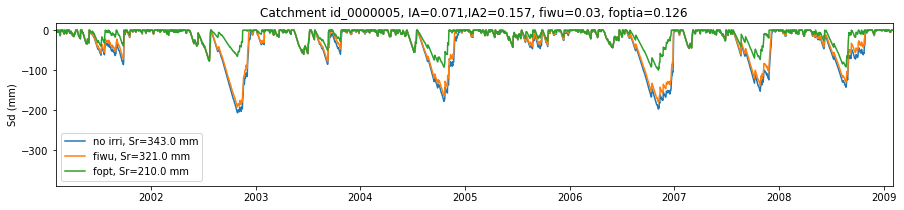

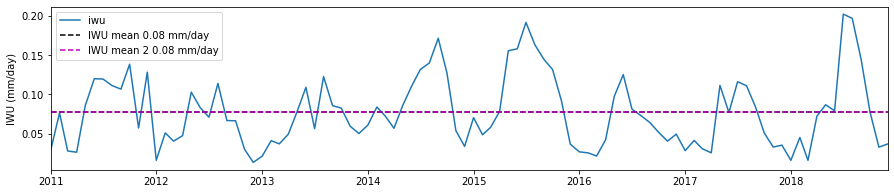

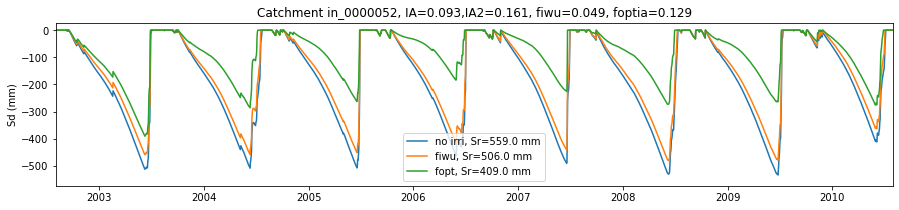

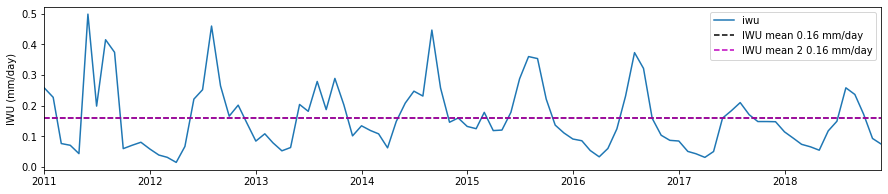

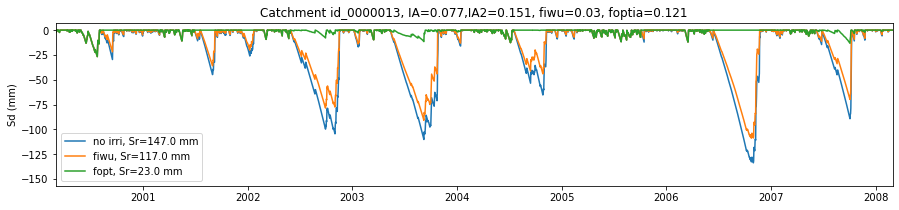

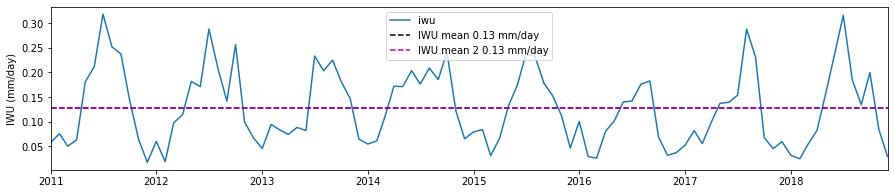

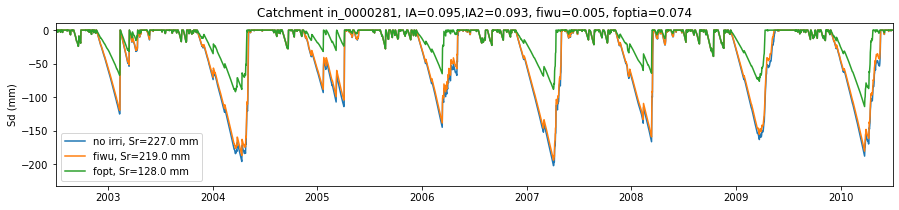

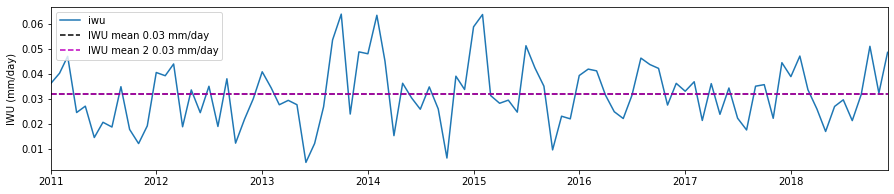

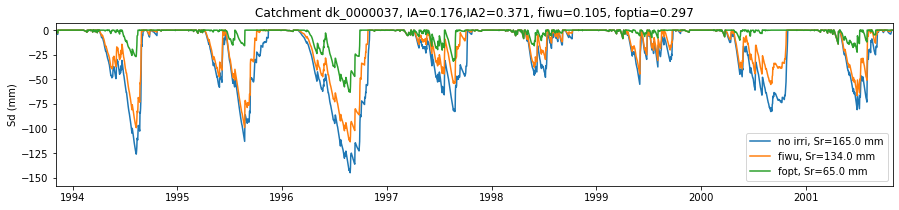

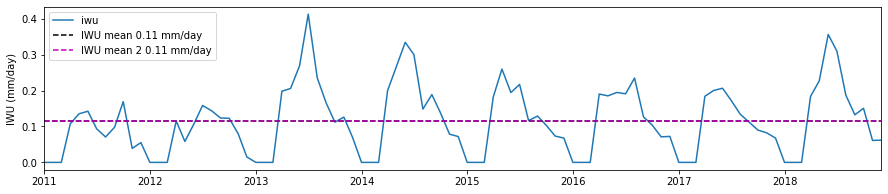

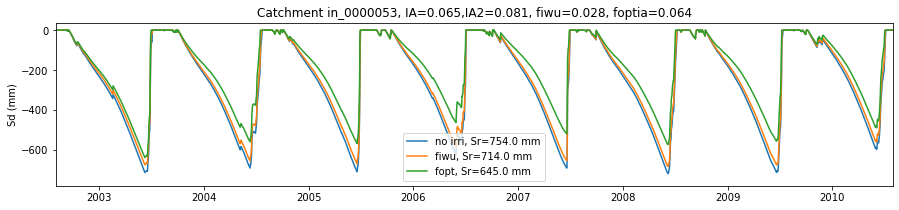

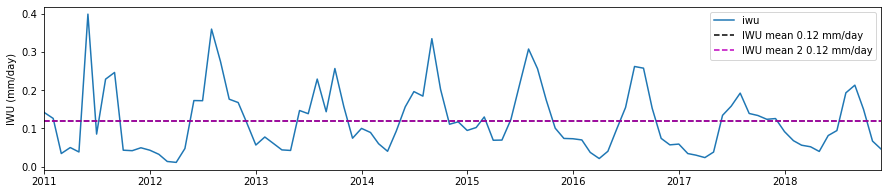

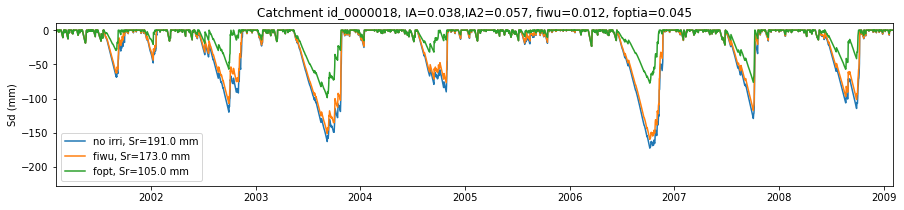

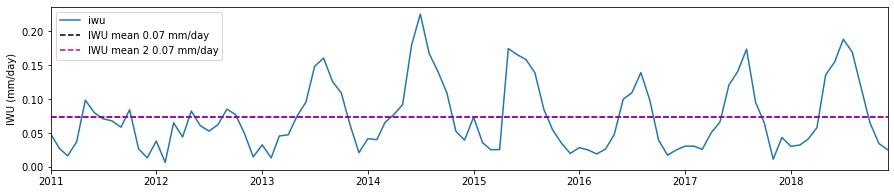

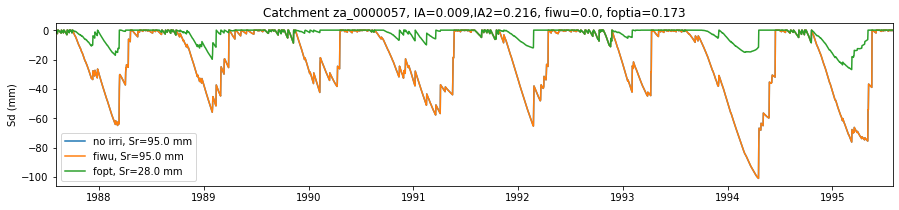

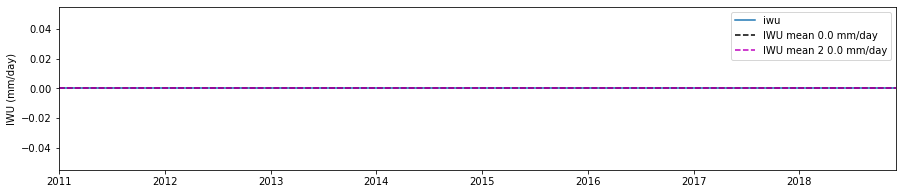

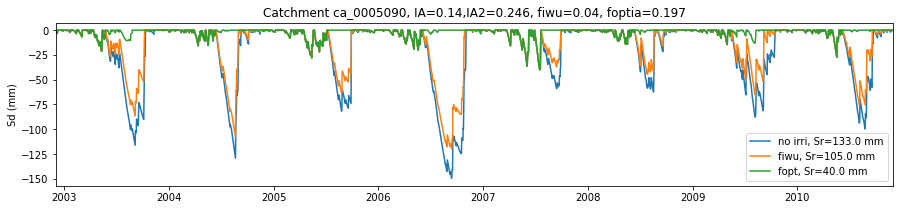

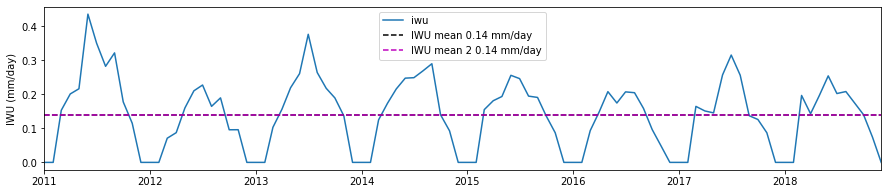

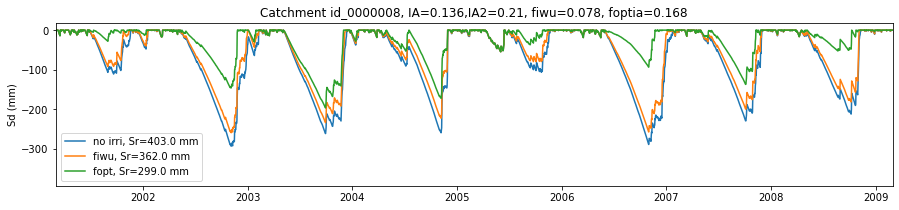

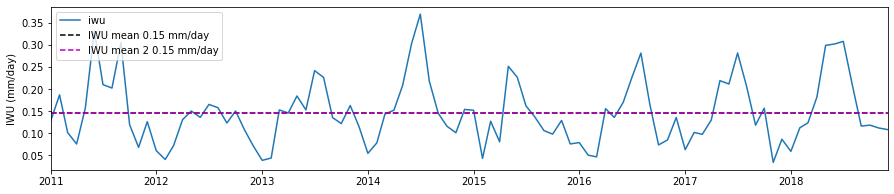

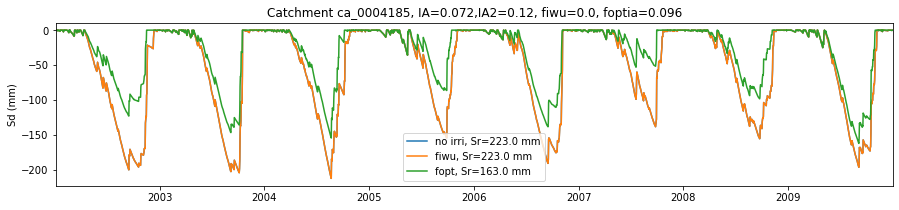

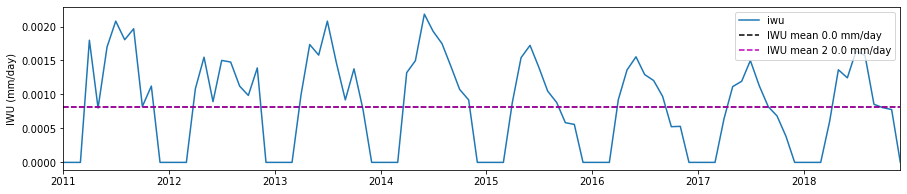

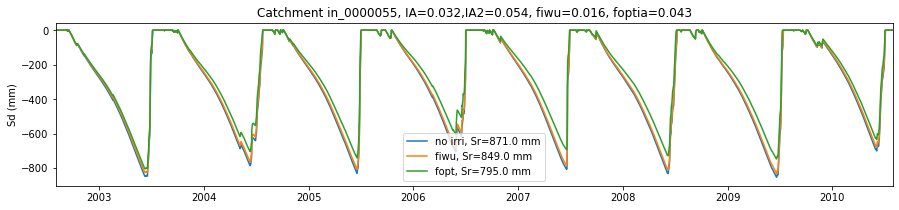

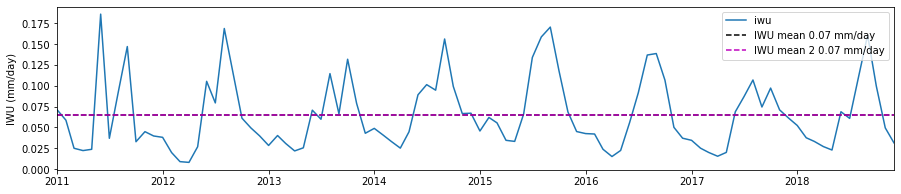

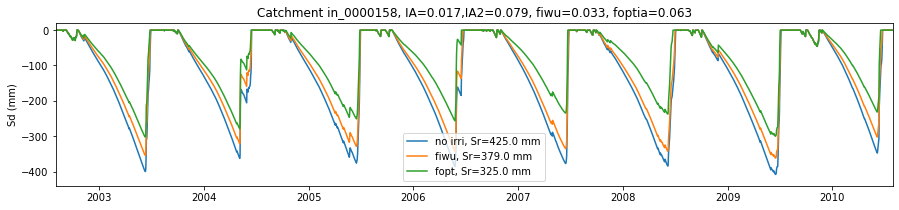

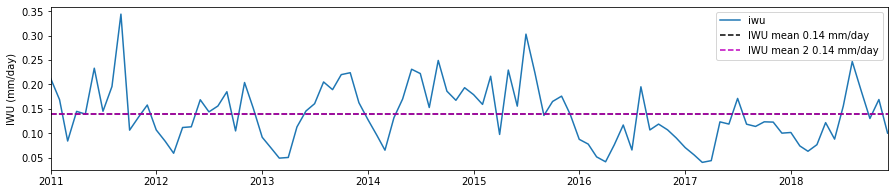

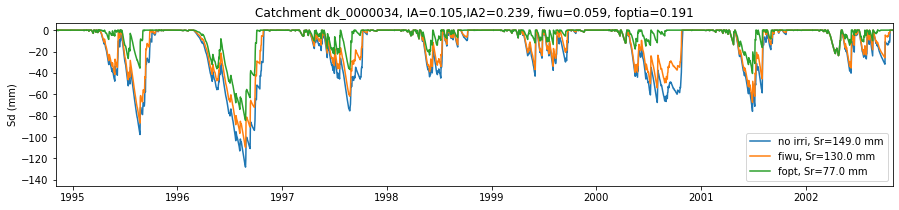

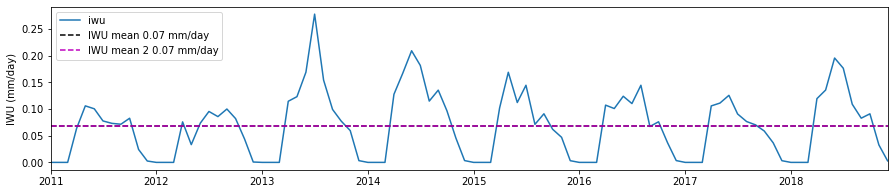

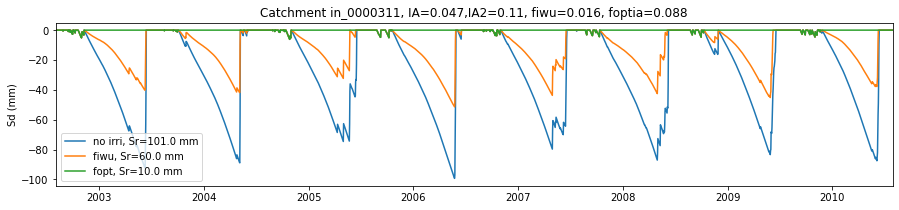

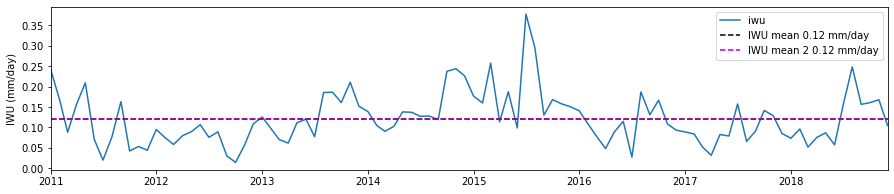

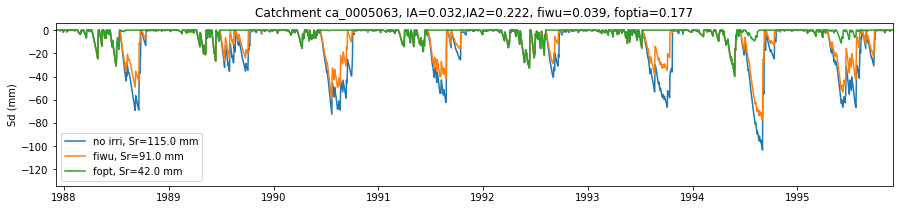

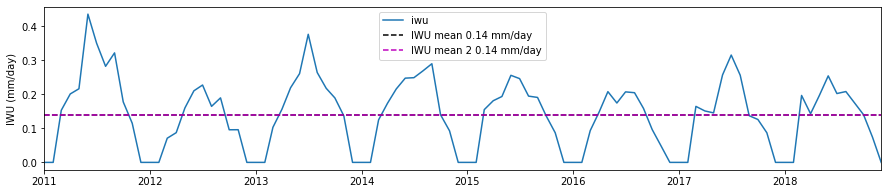

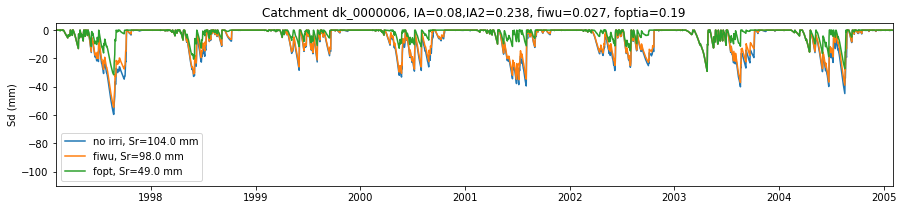

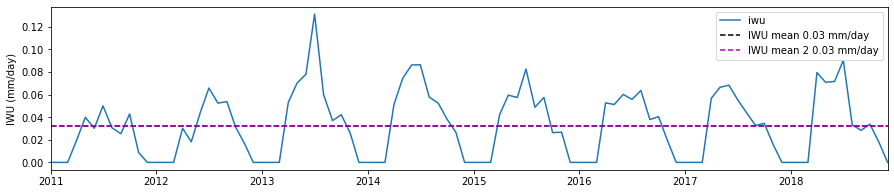

In [73]:
for c in s[0:20].index:
    sd_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{c}.csv', index_col=0)
    sd_ni.index = pd.to_datetime(sd_ni.index)
    sd_iwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{c}_fiwu2.csv', index_col=0)
    sd_iwu.index = pd.to_datetime(sd_iwu.index)
    sd_opt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{c}_f0.9ia.csv', index_col=0)
    sd_opt.index = pd.to_datetime(sd_opt.index)
    
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/raw/{c}.csv',index_col=0)
    iwu.index = pd.to_datetime(iwu.index)
    iwu['days_in_month']=iwu.index.days_in_month
    iwu['iwu_mmday'] = iwu.iwu/iwu.days_in_month
    iwum = pd.read_csv(f'{work_dir}/output/irrigation/processed/mean/{c}.csv',index_col=0)

    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    ax.plot(sd_ni.index, sd_ni.Sd,label=f'no irri, Sr={np.round(s.loc[c].Srf0,0)} mm')
    ax.plot(sd_iwu.index, sd_iwu.sd2, label=f'fiwu, Sr={np.round(s.loc[c].Srfiwu,0)} mm')
    ax.plot(sd_opt.index, sd_opt.sd2, label=f'fopt, Sr={np.round(s.loc[c].Srfopt,0)} mm')
    ax.set_ylabel('Sd (mm)')
    ax.set_xlim(sd_ni.index[-8*365],sd_ni.index[-1])
    ax.legend()
    ax.set_title(f'Catchment {c}, IA={np.round(s.loc[c].ia,3)},IA2={np.round(s.loc[c].ia2,3)}, fiwu={np.round(s.loc[c].fiwu,3)}, foptia={np.round(s.loc[c].foptia,3)}')
    
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    ax.plot(iwu.index, iwu.iwu_mmday,label=f'iwu')
    ax.hlines(iwum.values,iwu.index[0],iwu.index[-1],color='k',linestyle='--',label=f'IWU mean {np.round(iwum.values[0][0],2)} mm/day')
    ax.hlines(iwu.iwu_mmday.mean(),iwu.index[0],iwu.index[-1],color='m',linestyle='--',label=f'IWU mean 2 {np.round(iwu.iwu_mmday.mean(),2)} mm/day')
    ax.set_ylabel('IWU (mm/day)')
    ax.set_xlim(iwu.index[0],iwu.index[-1])
    ax.legend()


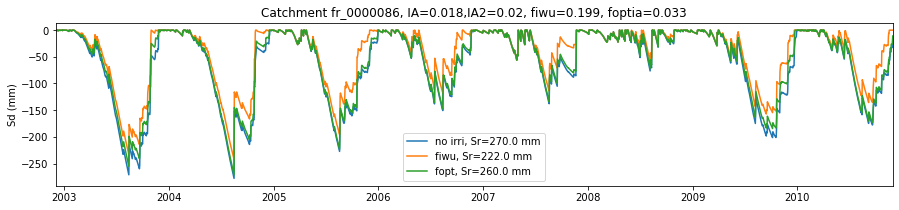

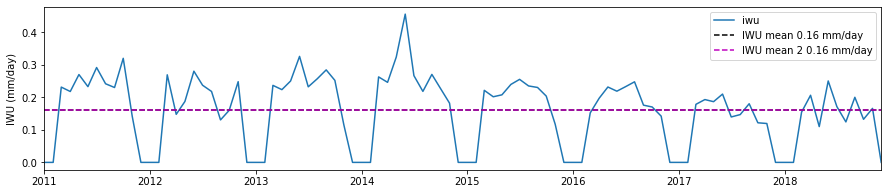

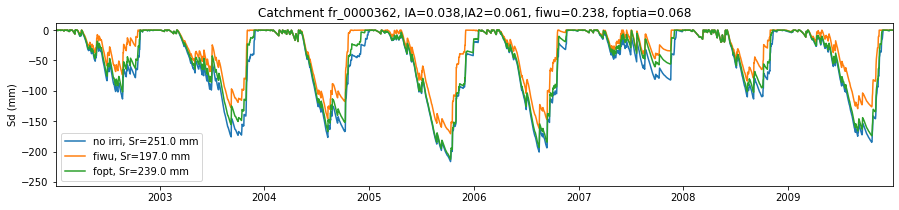

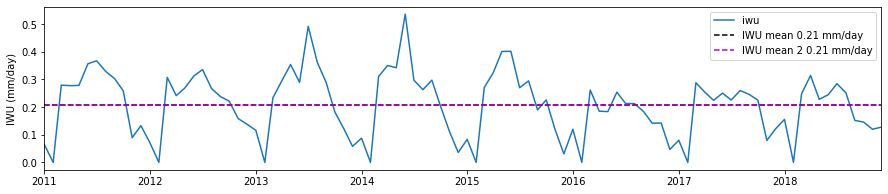

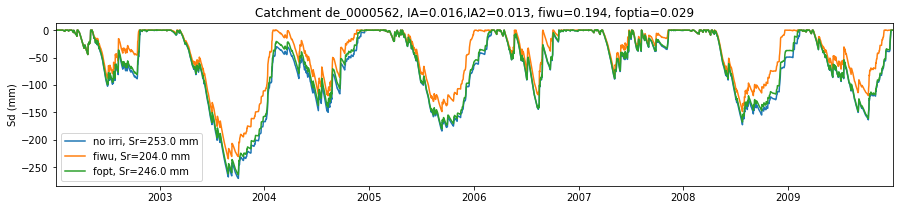

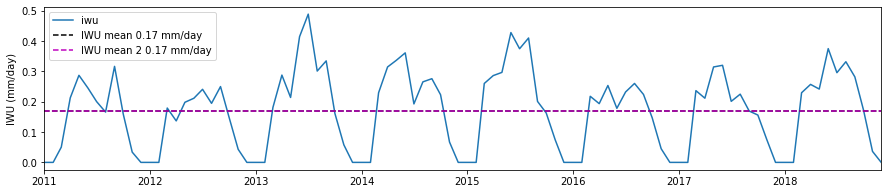

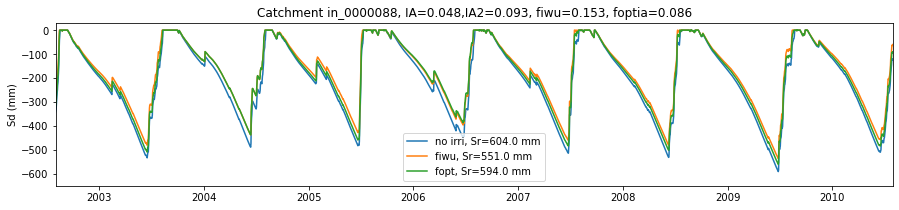

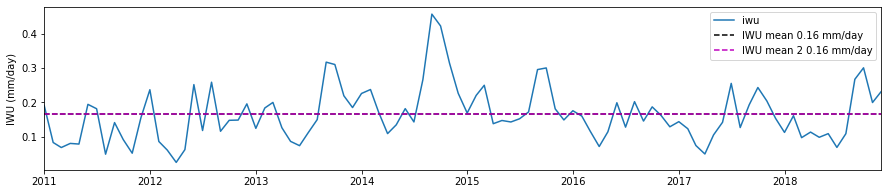

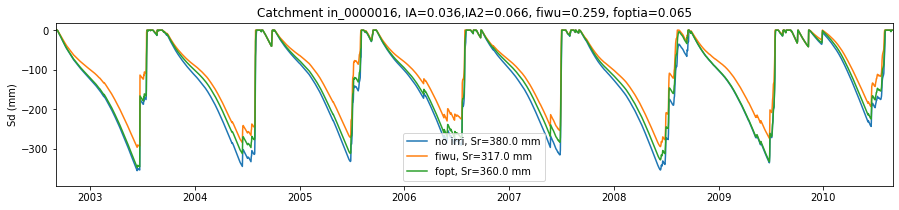

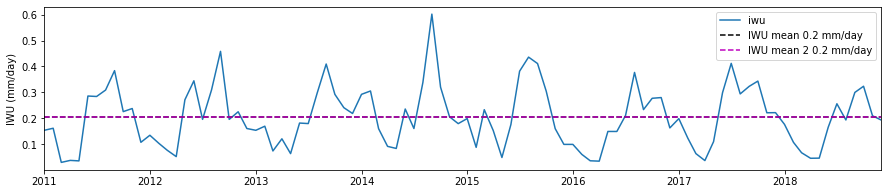

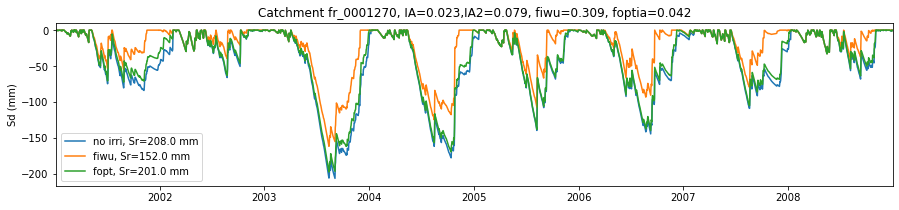

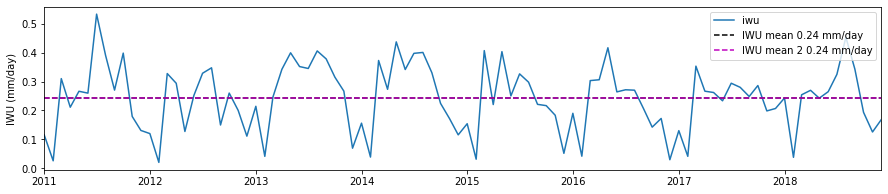

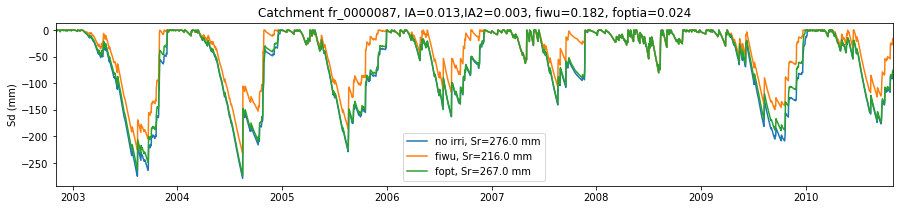

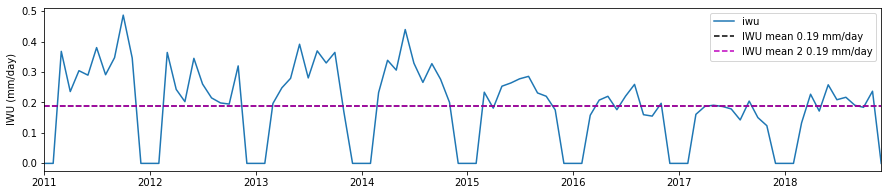

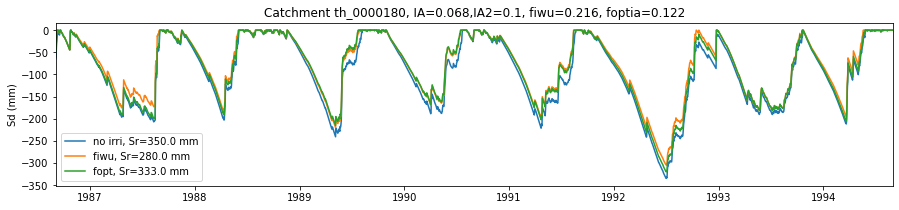

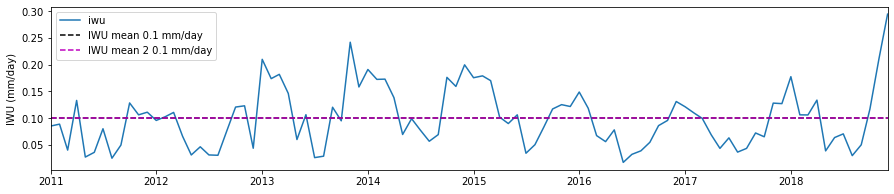

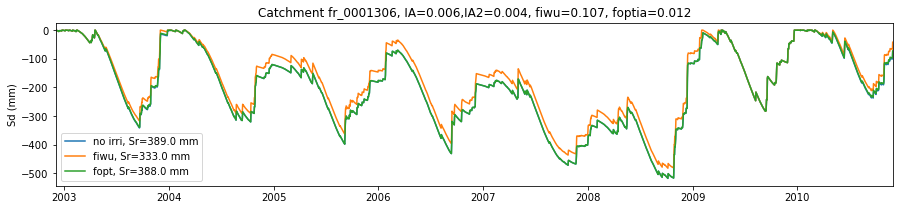

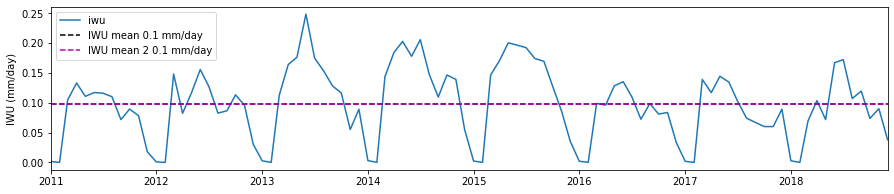

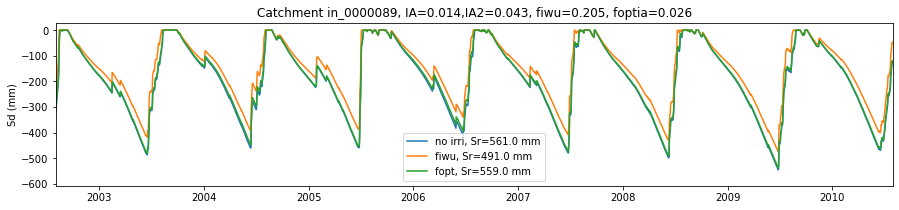

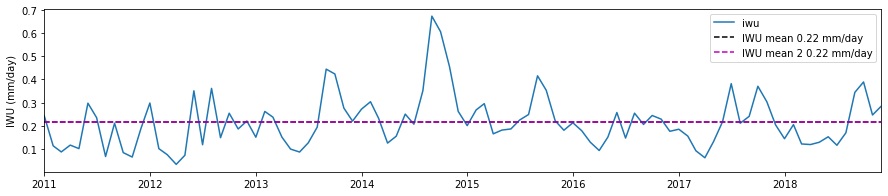

In [229]:
for c in s[-10:].index:
    sd_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{c}.csv', index_col=0)
    sd_ni.index = pd.to_datetime(sd_ni.index)
    sd_iwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu/sd/{c}_fiwu.csv', index_col=0)
    sd_iwu.index = pd.to_datetime(sd_iwu.index)
    sd_opt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.8ia/sd/{c}_f1.8ia.csv', index_col=0)
    sd_opt.index = pd.to_datetime(sd_opt.index)
    
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/raw/{c}.csv',index_col=0)
    iwu.index = pd.to_datetime(iwu.index)
    iwu['days_in_month']=iwu.index.days_in_month
    iwu['iwu_mmday'] = iwu.iwu/iwu.days_in_month
    iwum = pd.read_csv(f'{work_dir}/output/irrigation/processed/mean/{c}.csv',index_col=0)

    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    ax.plot(sd_ni.index, sd_ni.Sd,label=f'no irri, Sr={np.round(s.loc[c].Srf0,0)} mm')
    ax.plot(sd_iwu.index, sd_iwu.sd2, label=f'fiwu, Sr={np.round(s.loc[c].Srfiwu,0)} mm')
    ax.plot(sd_opt.index, sd_opt.sd2, label=f'fopt, Sr={np.round(s.loc[c].Srfopt,0)} mm')
    ax.set_ylabel('Sd (mm)')
    ax.set_xlim(sd_ni.index[-8*365],sd_ni.index[-1])
    ax.legend()
    ax.set_title(f'Catchment {c}, IA={np.round(s.loc[c].ia,3)},IA2={np.round(s.loc[c].ia2,3)}, fiwu={np.round(s.loc[c].fiwu,3)}, foptia={np.round(s.loc[c].foptia,3)}')
    

    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    ax.plot(iwu.index, iwu.iwu_mmday,label=f'iwu')
    ax.hlines(iwum.values,iwu.index[0],iwu.index[-1],color='k',linestyle='--',label=f'IWU mean {np.round(iwum.values[0][0],2)} mm/day')
    ax.hlines(iwu.iwu_mmday.mean(),iwu.index[0],iwu.index[-1],color='m',linestyle='--',label=f'IWU mean 2 {np.round(iwu.iwu_mmday.mean(),2)} mm/day')
    ax.set_ylabel('IWU (mm/day)')
    ax.set_xlim(iwu.index[0],iwu.index[-1])
    ax.legend()


In [194]:
s[0:10].index

Index(['in_0000281', 'id_0000009', 'in_0000053', 'in_0000052', 'id_0000008',
       'id_0000013', 'id_0000005', 'in_0000128', 'id_0000018', 'in_0000267'],
      dtype='object')

In [152]:
# # plot f values for fiwu vs f0.17
# f = 'iwu'
# fm = []
# for catch_id in el_id_list:
#     if os.path.exists(f'{ifol}/se/{catch_id}_f{f}.csv'):
#         d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
#         fmean = d['f'].mean()
#         fm.append(fmean)
        
# fmia = []
# for catch_id in el_id_list:
#     if os.path.exists(f'{ifol}/se/{catch_id}_f2.0ia.csv'):
#         d = pd.read_csv(f'{ifol}/se/{catch_id}_f2.0ia.csv',index_col=0)
#         fmean = d['f'].mean()
#         fmia.append(fmean)

In [20]:
# plot f values for fiwu vs f1.9ia
f = 'iwu'
fm = []
for catch_id in el_id_list:
    if os.path.exists(f'{ifol}/se/{catch_id}_f{f}.csv'):
        d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
        fmean = d['f'].mean()
        fm.append(fmean)
        
fmia = []
for catch_id in el_id_list:
    if os.path.exists(f'{ifol}/se/{catch_id}_f1.9ia.csv'):
        d = pd.read_csv(f'{ifol}/se/{catch_id}_f1.9ia.csv',index_col=0)
        fmean = d['f'].mean()
        fmia.append(fmean)

Text(0.5, 1.0, 'mean f with fiwu vs f=2.0ia')

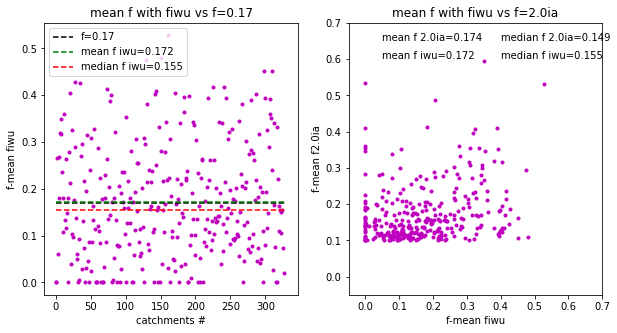

In [153]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(fm, 'mo',markersize=3)
ax.plot([0,330],[0.17,0.17],'k--', label=f'f=0.17')
ax.plot([0,330],[np.mean(fm),np.mean(fm)],'g--', label=f'mean f iwu={np.round(np.mean(fm),3)}')
ax.plot([0,330],[np.median(fm),np.median(fm)],'r--', label=f'median f iwu={np.round(np.median(fm),3)}')
ax.legend()
ax.set_xlabel('catchments #')
ax.set_ylabel('f-mean fiwu')
ax.set_title('mean f with fiwu vs f=0.17')

ax = fig.add_subplot(122)
ax.plot(fm,fmia, 'mo',markersize=3)
ax.annotate(f'mean f iwu={np.round(np.mean(fm),3)}',[0.05,0.6])
ax.annotate(f'mean f 2.0ia={np.round(np.mean(fmia),3)}',[0.05,0.65])
ax.annotate(f'median f iwu={np.round(np.median(fm),3)}',[0.40,0.6])
ax.annotate(f'median f 2.0ia={np.round(np.median(fmia),3)}',[0.40,0.65])
ax.set_xlabel('f-mean fiwu')
ax.set_ylabel('f-mean f2.0ia')
ax.set_xlim(-0.05,0.7)
ax.set_ylim(-0.05,0.7)
ax.set_title('mean f with fiwu vs f=2.0ia')


## 3. OPTIMIZE F WITHOUT IRRIGATION AREA FRACTION

In [29]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ar = df.area

In [30]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*0.18.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [31]:
md_05 = []
md_025 = []
md_075 = []
md_015 = []
md_0 = []
md_02 = []
md_018 = []
md_017 = []
md_iwu = []

md_02_rel = []
md_05_rel = []
md_025_rel = []
md_075_rel = []
md_015_rel = []
md_0_rel = []
md_018_rel = []
md_017_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
    f=0.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_05.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_05_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
    
    f=0.25
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_025.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_025_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_025_rel.append(np.nan)
        
    f=0.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_02.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_02_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_02_rel.append(np.nan)
    
    f=0.15
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_015.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_015_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_015_rel.append(np.nan)
    
    f=0.18
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_018.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_018_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_018_rel.append(np.nan)
        
    f=0.17
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_017.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_017_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_017_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [32]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
df['f0'] = md_0
df['f0.15'] = md_015
df['f0.17'] = md_017
df['f0.18'] = md_018
df['f0.2'] = md_02
df['f0.25'] = md_025
df['f0.5'] = md_05
df['fiwu'] = md_iwu
df['iwu'] = iwu
df = df.dropna()

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
dfr['f0'] = md_0_rel
dfr['f0.15'] = md_015_rel
dfr['f0.17'] = md_017_rel
dfr['f0.18'] = md_018_rel
dfr['f0.2'] = md_02_rel
dfr['f0.25'] = md_025_rel
dfr['f0.5'] = md_05_rel
dfr['fiwu'] = md_iwu_rel
dfr['iwu'] = iwu
dfr = dfr.dropna()

df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

dff = df
dffr = dfr

median    mean     std  q75-q25
f0     -42.41  -47.54   27.26    33.12
f0.15   -6.96    4.47   64.15    49.38
f0.17   -0.38   12.59   72.38    56.59
f0.18    1.27   16.75   76.69    59.81
f0.2     6.76   25.32   85.49    66.20
f0.25   26.01   48.20  109.12    82.49
f0.5   150.12  198.79  259.96   212.56
fiwu    -2.91  -11.16   18.44    13.67

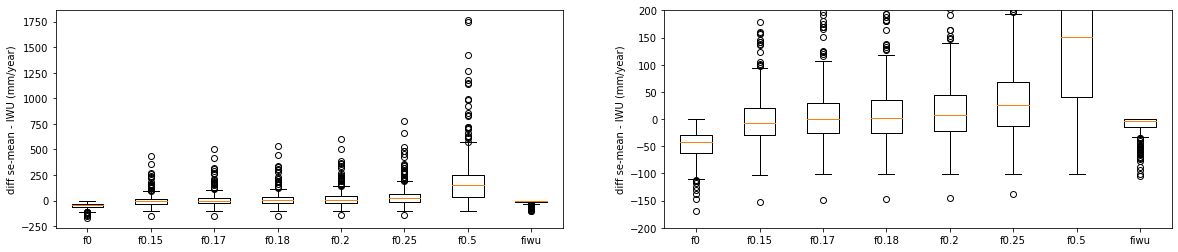

In [33]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dff.iloc[:,1:-2])
ax.set_xticklabels(dff.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dff.iloc[:,1:-2])
ax.set_xticklabels(dff.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=dff.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(dff.iloc[:,1:-2].median(),2)
d['mean']=np.round(dff.iloc[:,1:-2].mean(),2)
d['std']=np.round(dff.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dff.iloc[:,1:-2].quantile(0.75) - dff.iloc[:,1:-2].quantile(0.25)),2)
d

median     mean       std  q75-q25
f0    -100.00  -100.00      0.00     0.00
f0.15  -17.01   220.31   2930.62   140.66
f0.17   -4.22   270.07   3384.93   162.29
f0.18    3.11   295.48   3617.72   172.88
f0.2    16.54   348.03   4098.24   196.04
f0.25   55.61   484.53   5323.05   256.97
f0.5   317.73  1321.73  12268.33   631.33
fiwu    -7.14   -23.74     31.61    35.27

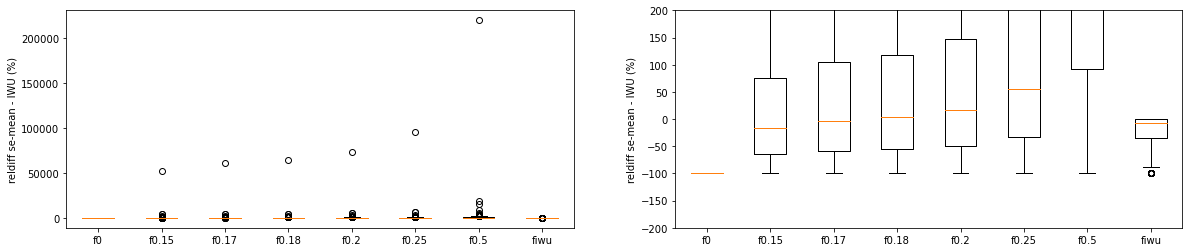

In [34]:
# boxplots of relative errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dffr.iloc[:,1:-2])
ax.set_xticklabels(dffr.iloc[:,1:-2].columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dffr.iloc[:,1:-2])
ax.set_xticklabels(dffr.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dffr.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(dffr.iloc[:,1:-2].median(),2)
d['mean']=np.round(dffr.iloc[:,1:-2].mean(),2)
d['std']=np.round(dffr.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dffr.iloc[:,1:-2].quantile(0.75) - dffr.iloc[:,1:-2].quantile(0.25)),2)
d

## 4. IRRIGATION AREA FRACTION  * F - optimize f

In [35]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*2.2ia.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-11] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [36]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ar = df.area

In [37]:
md_18 = []
md_12 = []
md_0 = []
md_08 = []
md_1 = []
md_15 = []
md_2 = []
md_25 = []
md_22 = []
md_3 = []
md_iwu = []

md_08_rel = []
md_18_rel = []
md_12_rel = []
md_0_rel = []
md_1_rel = []
md_15_rel = []
md_2_rel = []
md_25_rel = []
md_22_rel = []
md_3_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
#     f=0.5
#     d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
#     md_05.append(d.se_used.mean() - d.iwu_mean.mean())
#     if (d.iwu_mean.mean()>0):
#         md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
#     else:
#         md_05_rel.append(np.nan)
    
    f=1.8
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_18.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_18_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_18_rel.append(np.nan)
    
    f=1.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_1.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_1_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_1_rel.append(np.nan)
    
    # f=1.2
    # d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    # md_12.append(d.se_used.mean() - d.iwu_mean.mean())
    # if (d.iwu_mean.mean()>0):
    #     md_12_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    # else:
    #     md_12_rel.append(np.nan)
        
    f=1.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_15.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_15_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_15_rel.append(np.nan)
        
    f=2.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_2.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_2_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_2_rel.append(np.nan)
        
    f=2.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_22.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_22_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_22_rel.append(np.nan)
        
    f=2.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_25.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_25_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_25_rel.append(np.nan)
    
    f=3.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_3.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_3_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_3_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [38]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f1.0ia','f1.5ia','f1.8ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
df['f0'] = md_0
df['f1.0ia'] = md_1
df['f1.8ia'] = md_18
df['f1.5ia'] = md_15
df['f2.0ia'] = md_2
df['f2.2ia'] = md_22
df['f2.5ia'] = md_25
df['f3.0ia'] = md_3
df['fiwu'] = md_iwu

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f1.0ia','f1.5ia','f1.8ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
dfr['f0'] = md_0_rel
dfr['f1.0ia'] = md_1_rel
dfr['f1.8ia'] = md_18_rel
dfr['f1.5ia'] = md_15_rel
dfr['f2.0ia'] = md_2_rel
dfr['f2.2ia'] = md_22_rel
dfr['f2.5ia'] = md_25_rel
dfr['f3.0ia'] = md_3_rel
dfr['fiwu'] = md_iwu_rel

df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

dfia = df
dfria = dfr


median   mean     std  q75-q25
f0      -42.41 -47.54   27.26    33.12
f1.0ia  -22.21 -18.96   38.95    31.56
f1.5ia  -12.81  -2.41   54.85    38.07
f1.8ia   -5.04   8.30   66.12    47.23
f2.0ia   -0.02  15.79   74.25    55.16
f2.2ia    4.64  23.63   82.86    63.04
f2.5ia   10.70  35.89   96.62    76.07
f3.0ia   23.56  57.78  121.50   103.26
fiwu     -2.91 -11.16   18.44    13.67

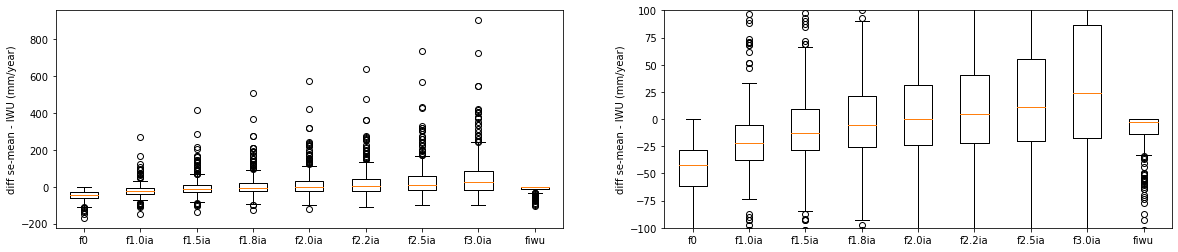

In [39]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfia.iloc[:,1:-2])
ax.set_xticklabels(dfia.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dfia.iloc[:,1:-2])
ax.set_xticklabels(dfia.iloc[:,1:-2].columns)
ax.set_ylim(-100,100)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=dfia.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(dfia.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfia.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfia.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dfia.iloc[:,1:-2].quantile(0.75) - dfia.iloc[:,1:-2].quantile(0.25)),2)

d

median    mean      std  q75-q25
f0     -100.00 -100.00     0.00     0.00
f1.0ia  -54.15   51.60  1319.61    65.28
f1.5ia  -28.38  136.17  2044.08   101.63
f1.8ia  -12.02  190.10  2503.11   123.60
f2.0ia   -0.10  226.92  2810.16   140.32
f2.2ia   11.84  265.27  3131.36   157.98
f2.5ia   30.10  324.70  3626.91   186.12
f3.0ia   63.05  429.70  4495.53   236.02
fiwu     -7.14  -23.74    31.61    35.27

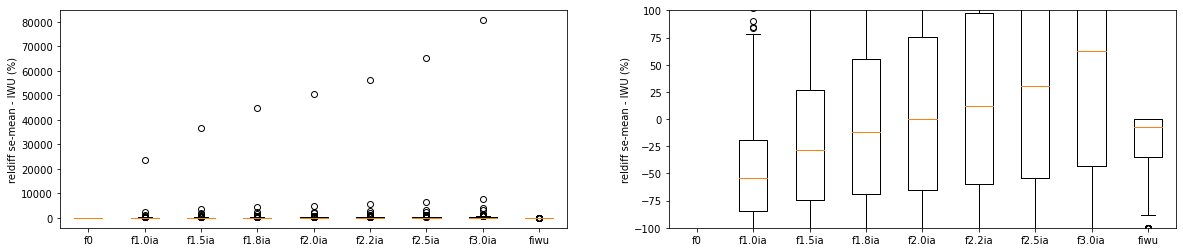

In [40]:
# boxplots of relative errors between se-mean and IWU for different fvalues
dfr2 = dfria.iloc[:,1:-2].dropna()

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfr2)
ax.set_xticklabels(dfr2)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfr2)
ax.set_xticklabels(dfr2)
ax.set_ylim(-100,100)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dfria.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(dfria.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfria.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfria.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dfria.iloc[:,1:-2].quantile(0.75) - dfria.iloc[:,1:-2].quantile(0.25)),2)

d

## 5. COMBINE IRRI OPTIMIZED F WITH AND WITHOUT IRRI AREA FRACTION


In [51]:
df = pd.concat([dff,dfia],axis=1)
dfr = pd.concat([dffr, dfria],axis=1)

dfs = df[['f0','fiwu','f0.17','f0.18','f1.8ia','f2.0ia','f2.2ia']]
dfrs = dfr[['f0','fiwu','f0.17','f0.18','f1.8ia','f2.0ia','f2.2ia']]

dfs = dfs.loc[:,~dfs.columns.duplicated()].copy()
dfrs = dfrs.loc[:,~dfrs.columns.duplicated()].copy()

median   mean    std  q75-q25
f0      -42.41 -47.54  27.26    33.12
fiwu     -2.91 -11.16  18.44    13.67
f0.17    -0.38  12.59  72.38    56.59
f0.18     1.27  16.75  76.69    59.81
f1.8ia   -5.04   8.30  66.12    47.23
f2.0ia   -0.02  15.79  74.25    55.16
f2.2ia    4.64  23.63  82.86    63.04

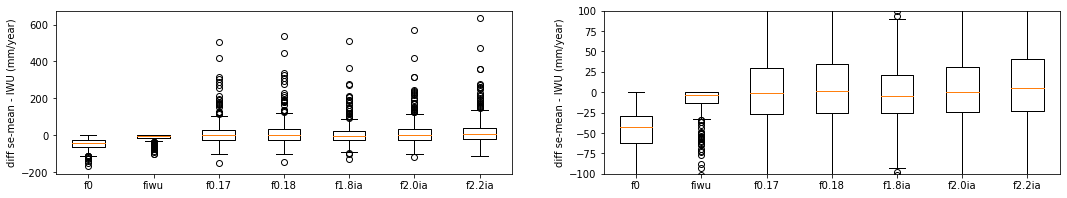

In [60]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(121)
ax.boxplot(dfs)
ax.set_xticklabels(dfs.columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dfs)
ax.set_xticklabels(dfs.columns)
ax.set_ylim(-100,100)
ax.set_ylabel('diff se-mean - IWU (mm/year)')
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_abs_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=dfs.columns, columns=['median','mean','std'])
d['median']=np.round(dfs.median(),2)
d['mean']=np.round(dfs.mean(),2)
d['std']=np.round(dfs.std(),2)
d['q75-q25'] = np.round((dfs.quantile(0.75) - dfs.quantile(0.25)),2)

d

median    mean      std  q75-q25
f0     -100.00 -100.00     0.00     0.00
fiwu     -7.14  -23.74    31.61    35.27
f0.17    -4.22  270.07  3384.93   162.29
f0.18     3.11  295.48  3617.72   172.88
f1.8ia  -12.02  190.10  2503.11   123.60
f2.0ia   -0.10  226.92  2810.16   140.32
f2.2ia   11.84  265.27  3131.36   157.98

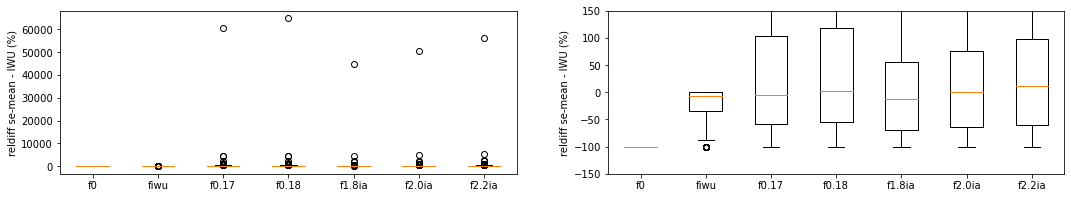

In [61]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
dfrs = dfrs.dropna()

fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(121)
ax.boxplot(dfrs)
ax.set_xticklabels(dfrs.columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfrs)
ax.set_xticklabels(dfrs.columns)
ax.set_ylim(-150,150)
ax.set_ylabel('reldiff se-mean - IWU (%)')
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_rel_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=dfrs.columns, columns=['median','mean','std'])
d['median']=np.round(dfrs.median(),2)
d['mean']=np.round(dfrs.mean(),2)
d['std']=np.round(dfrs.std(),2)
d['q75-q25'] = np.round((dfrs.quantile(0.75) - dfrs.quantile(0.25)),2)

d

Text(0.5, 1.0, 'mean f with fiwu vs f=2.0ia')

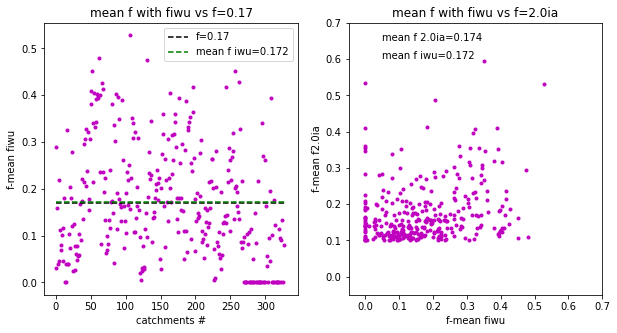

### f optimization

median   mean    std    iqr   rmse
0.0  -0.155 -0.172  0.121  0.176  0.210
1.0  -0.076 -0.084  0.118  0.156  0.145
1.5  -0.032 -0.041  0.121  0.151  0.128
1.8  -0.012 -0.015  0.125  0.153  0.126
2.0   0.005  0.003  0.128  0.152  0.128
2.2   0.022  0.020  0.131  0.148  0.133
2.5   0.042  0.046  0.137  0.154  0.144
3.0   0.081  0.090  0.148  0.165  0.173

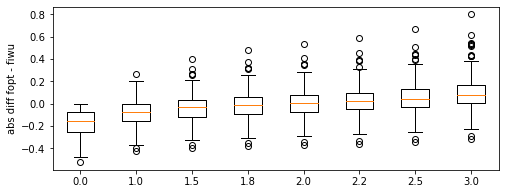

In [195]:
# boxplots
f_array=[0,1,1.5,1.8,2,2.2,2.5,3]
df = pd.DataFrame(index=d.index, columns=f_array)

for f in f_array:
    o = f*d['ia']
    er = o-d['fiwu']
    df[f] = er
    
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.boxplot(df)
ax.set_xticklabels(df.columns)
ax.set_ylabel('abs diff fopt - fiwu')

e = pd.DataFrame(index=df.columns)
e['median']=np.round(df.median(),3)
e['mean']=np.round(df.mean(),3)
e['std']=np.round(df.std(),3)
e['iqr'] = np.round((df.quantile(0.75) - df.quantile(0.25)),3)
e['rmse'] = np.round(np.sqrt(np.mean((df**2))),3)

e

In [243]:
def irrigation_sd(df,catch_id,work_dir):
    s = df
    split_dates = []
    start_date = df.index[0]
    split_dates.append(start_date)
    se_l = []
    se_used = []
    ldd_l = []
    lde_l = []
    days_l = []
    f_ar = []
    s2 = s #make new dataframe, copy of s which is output of initial sd calculation
    s2['p_irri']=s.Pe #set initially p irri to Pe
    s2['sd2']=s.Sd
    s2['se2']=s.se
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed/monthly_mean/{catch_id}.csv',index_col=0)
    iwu_mean = iwu.mean().values[0]*365
    cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/gswp-p_gleam-ep_gswp-t/{catch_id}.csv',index_col=0)
    ir_area = cc.ir_mean.values

    years=len(np.unique(s.index.year)) #count years
    for i in range(years):
        ss = s2.iloc[i*365:(i*365)+365] #select 1 year
        min_date = ss[ss.Sd==ss.Sd.min()].index.values[0] #select date where Sd minimizes
        split_dates.append(min_date) #append first date to split_dates list
        sp = s2.loc[split_dates[i]:split_dates[i+1]]
        se_sum = sp.se2.sum() #sum se from start date to date with min Sd
        se_l.append(se_sum)

        # find last date of Se>0 BEFORE min date = first day deficit
        sss = ss.loc[:min_date]
        if (len(sss.se[sss.se>0])>0):
            lde = sss.se[sss.se>0].index[-1]
        else:
            lde = sss.index[0]   
            
        # find first day of deficit Sd<0 AFTER min date = last day deficit
        sss = ss.loc[min_date:]
        if (len(sss.Sd[sss.Sd<0])>0):
            ldd = sss[sss.Sd<0].index[-1]
        else:
            ldd = sss.Sd.index[-1]
            
        ldd_l.append(ldd)
        lde_l.append(lde)
        dd = ss.loc[lde+timedelta(days=1):ldd] # select from start of deficit until end of deficit period
        days = len(dd) # length of deficit period = length of irrigation period
        days_l.append(days)

        # f = 0.17 #
        # f2 = f
        # f based on fixed factor and irrigated area fraction
        f = 1.85
        f2 = min(f*ir_area, 1) 
        
        # f based on IWU directly
        if (se_sum>0):
            f = iwu_mean/se_sum
        else: 
            f=0
        if (f>1):
            f=1
        f2=f
        
        #use this with fia
        # f_ar.append(f2[0]) 
        # if (days>0):
        #     irri = f2[0] * se_sum/days # calculate the irrigation fraction per day, equally distributed over the deficit period
        #     se_used.append(f2[0]*se_sum)
        # else:
        #     irri=0
        #     se_used.append(0)
            
        # use this with fiwu
        f_ar.append(f2)
        if (days>0):
            irri = f2 * se_sum/days # calculate the irrigation fraction per day, equally distributed over the deficit period
            se_used.append(f2*se_sum)
        else:
            irri=0
            se_used.append(0)

        # add irri to p
        p_irri = dd['Pe'] + irri # preciptiation+irrigation
        dfp2 = pd.DataFrame(index=ss.index, columns=['p_irri'])
        dfp2.p_irri = p_irri
        dfp2 = dfp2.fillna(-1)
        dfp2.p_irri.loc[dfp2[dfp2.p_irri<0].index] = ss.Pe.loc[dfp2[dfp2.p_irri<0].p_irri.index] # set nan values in dfp2 (no irrigation) to original p values
        ss['p_irri'] = dfp2['p_irri'] # add p_irri to ss dataframe
        s2.p_irri.iloc[i*365:(i*365)+365] = ss['p_irri'] #update p_irri in s2

        #update sd and se in full timeseries from year -> end
        for l in range(i*365,len(s2)):
            if (i==0)&(l==0):
                s2['sd2'].iloc[l]=0
            else:
                s2['sd2'].iloc[l] = min(0,s2['sd2'].iloc[l-1]+s2['p_irri'][l]-s2['Et'][l])
            if (s2['sd2'].iloc[l]==0):
                s2['se2'].iloc[l] = s2.p_irri[l]-s2.Et[l]

    # make irrigation dataframe
    df_se = pd.DataFrame(index=range(len(se_used)), columns=['start_date_se','end_date_se','start_date_irri','end_date_irri','se','f','se_used','iwu_mean','days_irri'])
    df_se['se'] = se_l
    df_se['se_used'] = se_used
    df_se['f'] = f_ar
    df_se['start_date_se'] = split_dates[:-1]
    df_se['end_date_se'] = split_dates[1:]
    df_se['start_date_irri'] = lde_l
    df_se['end_date_irri'] = ldd_l
    df_se['days_irri'] = days_l
    df_se['iwu_mean'] = [iwu_mean] * len(df_se.index)
    
    return(s2, df_se, f)

In [346]:
catch_id = 'in_0000281'
# catch_id = 'ca_0004185'
catch_id = 'in_0000052'
catch_id = 'de_0000056'
pep_dir = f'{work_dir}/output/forcing_timeseries/processed/daily'
q_dir = f'{work_dir}/output/q_timeseries_selected'
out_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
snow_id_list = np.genfromtxt(f'{work_dir}/output/snow/catch_id_list_snow_t_and_p.txt',dtype='str')
snow_dir = f'{work_dir}/output/snow/timeseries_gswp'

# run_sd_calculation(catch_id, pep_dir, q_dir, out_dir,snow_id_list,snow_dir,work_dir)


In [347]:
if catch_id in snow_id_list:
    s = 1 # snow is yes
    f_pep = glob.glob(f'{snow_dir}/{catch_id}*.csv')

else:
    s = 0 # snow is no
    # get P Ep and Q files for catch id
    f_pep = glob.glob(f'{pep_dir}/{catch_id}*.csv')

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/gswp-p_gleam-ep_gswp-t/{catch_id}.csv',index_col=0)
ir_area = cc.ir_mean.values

# read q df
f_q = glob.glob(f'{q_dir}/{catch_id}*.csv')

# read files as dataframes
q_ts = pd.read_csv(f_q[0],index_col=0)
q_ts.index = pd.to_datetime(q_ts.index)
pep_ts = pd.read_csv(f_pep[0],index_col=0)
pep_ts.index = pd.to_datetime(pep_ts.index)

if (s==1): #snow
    # convert to monthly dataframes
    df_monthly = pd.DataFrame(index=pd.date_range(pep_ts.index[0],pep_ts.index[-1],freq='M'), columns=['p','ep','ps','pm','pl'])
    df_monthly[['p','ep','ps','pm','pl']] = pep_ts[['p','ep','ps','pm','pl']].groupby(pd.Grouper(freq="M")).sum()

    # calculate start hydroyear -> month after on average the wettest month
    df_monthly_mean = df_monthly.groupby([df_monthly.index.month]).mean()
    df_monthly_mean['liq'] = df_monthly_mean['pm'] + df_monthly_mean['pl']
    wettest_month = (df_monthly_mean['liq']-df_monthly_mean['ep']).idxmax()
    hydro_year_start_month = wettest_month+1
    if hydro_year_start_month==13:
        hydro_year_start_month=1

else: # no snow
    # convert to monthly dataframes
    df_monthly = pd.DataFrame(index=pd.date_range(pep_ts.index[0],pep_ts.index[-1],freq='M'), columns=['p','ep'])
    df_monthly[['p','ep']] = pep_ts[['p','ep']].groupby(pd.Grouper(freq="M")).sum()

    # calculate start hydroyear -> month after on average the wettest month
    df_monthly_mean = df_monthly.groupby([df_monthly.index.month]).mean()
    wettest_month = (df_monthly_mean['p']-df_monthly_mean['ep']).idxmax()
    hydro_year_start_month = wettest_month+1
    if hydro_year_start_month==13:
        hydro_year_start_month=1

# find the start and end date for the sr calculation based on P, Ep, Q timeseries and hydroyear
p_ep_start_year = pep_ts.index.year[0]
q_start_year = int(q_ts.index[0].year)
p_ep_end_year = pep_ts.index.year[-1]
q_end_year = int(q_ts.index[-1].year)

# test if timeseries have overlap -> if not don't continue the sd calculation
if q_start_year>p_ep_end_year:
    a=1
elif p_ep_start_year>q_end_year:
    a=1
else:
    a=0
    start_year = max(q_start_year,p_ep_start_year)
    end_year = min(q_end_year,p_ep_end_year)
    start_date = datetime(start_year,hydro_year_start_month,1)
    end_date = datetime(end_year,hydro_year_start_month,1)
    end_date = end_date - timedelta(days=1)

    #calculate mean Q for startdate enddate timeseries
    q_mean = q_ts.loc[start_date:end_date,'Q'].mean()

    if (s==1): # snow
        # prepare input dataframe for sd calculation
        sd_input = pd.DataFrame(index=pd.date_range(start_date,end_date,freq='d'), columns=['p','ep','ps','pm','pl','date_start','date_end'])
        sd_input[['p','ep','ps','pm','pl']] = pep_ts[['p','ep','ps','pm','pl']]
        sd_input[['date_start','date_end']] = start_date, end_date
        si_0 = 0 #initial interception storage
        si_max = 2.5 #maximum interception storage

    else: # no snow
        # prepare input dataframe for sd calculation
        sd_input = pd.DataFrame(index=pd.date_range(start_date,end_date,freq='d'), columns=['p','ep','date_start','date_end'])
        sd_input[['p','ep']] = pep_ts[['p','ep']]
        sd_input[['date_start','date_end']] = start_date, end_date
        si_0 = 0 #initial interception storage
        si_max = 2.5 #maximum interception storage

    # run sd calculation
    b = sd_initial(sd_input, si_0, si_max, q_mean,s)[0] #b==0: closing wb, b==1: non-closing wb > no sd calculation
    if b==0:      
        # save output dataframe from sd calculation
        out = sd_initial(sd_input, si_0, si_max, q_mean,s)[1]

        # if catch_id in irri_id_list:
        # if ir_area>0.01:
        # if ir_area>0:
            # irri = irrigation_sd(out,catch_id,work_dir)
            # out = irri[0] 
            # se_out = irri[1]
            # f = se_out.f.mean()
            # se_out.to_csv(f'{out_dir}/irri/f1.85ia/se/{catch_id}_f1.8ia.csv')
            # se_out.to_csv(f'{out_dir}/irri/fiwu/se/{catch_id}_fiwu.csv')
            # se_out.to_csv(f'{out_dir}/irri/se/{catch_id}_f{f}ia.csv')

            # out.to_csv(f'{out_dir}/irri/f1.85ia/sd/{catch_id}_f1.8ia.csv')
            # out.to_csv(f'{out_dir}/{catch_id}.csv')
            # out.to_csv(f'{out_dir}/irri/fiwu/sd/{catch_id}_fiwu.csv')
            # out.to_csv(f'{out_dir}/irri/sd/{catch_id}_f{f}ia.csv')
        # else: 
            # out.to_csv(f'{out_dir}/irri/fiwu/sd/{catch_id}_fiwu.csv')
            # out.to_csv(f'{out_dir}/irri/f1.85ia/sd/{catch_id}_f1.8ia.csv')


In [348]:
s = out
split_dates = []
start_date = out.index[0]
split_dates.append(start_date)
se_l = []
se_used = []
ldd_l = []
lde_l = []
days_l = []
f_ar = []
s2 = s #make new dataframe, copy of s which is output of initial sd calculation
s2['p_irri']=s.Pe #set initially p irri to Pe
s2['sd2']=s.Sd
s2['se2']=s.se
iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed/monthly_mean/{catch_id}.csv',index_col=0)
iwu_mean = iwu.mean().values[0]*365
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/gswp-p_gleam-ep_gswp-t/{catch_id}.csv',index_col=0)
ir_area = cc.ir_mean.values

years=len(np.unique(s.index.year)) #count years
for i in range(years):
    ss = s2.iloc[i*365:(i*365)+365] #select 1 year
    min_date = ss[ss.Sd==ss.Sd.min()].index.values[0] #select date where Sd minimizes
    split_dates.append(min_date) #append first date to split_dates list
    sp = s2.loc[split_dates[i]:split_dates[i+1]]
    se_sum = sp.se2.sum() #sum se from start date to date with min Sd
    se_l.append(se_sum)

    # find last date of Se>0 BEFORE min date = first day deficit
    sss = ss.loc[:min_date]
    if (len(sss.se[sss.se>0])>0):
        lde = sss.se[sss.se>0].index[-1]
    else:
        lde = sss.index[0]   

    # find first day of deficit Sd<0 AFTER min date = last day deficit
    sss = ss.loc[min_date:]
    if (len(sss.Sd[sss.Sd<0])>0):
        ldd = sss[sss.Sd<0].index[-1]
    else:
        ldd = sss.Sd.index[-1]

    ldd_l.append(ldd)
    lde_l.append(lde)
    dd = ss.loc[lde+timedelta(days=1):ldd] # select from start of deficit until end of deficit period
    days = len(dd) # length of deficit period = length of irrigation period
    days_l.append(days)

    # f = 0.17 #
    # f2 = f
    # f based on fixed factor and irrigated area fraction
    f = 1.85
    f2 = min(f*ir_area, 1) 

    # f based on IWU directly
    if (se_sum>0):
        f = iwu_mean/se_sum
    else: 
        f=0
    if (f>1):
        f=1
    f2=f

    #use this with fia
    # f_ar.append(f2[0]) 
    # if (days>0):
    #     irri = f2[0] * se_sum/days # calculate the irrigation fraction per day, equally distributed over the deficit period
    #     se_used.append(f2[0]*se_sum)
    # else:
    #     irri=0
    #     se_used.append(0)

    # use this with fiwu
    f_ar.append(f2)
    if (days>0):
        irri = f2 * se_sum/days # calculate the irrigation fraction per day, equally distributed over the deficit period
        se_used.append(f2*se_sum)
    else:
        irri=0
        se_used.append(0)

    # add irri to p
    p_irri = dd['Pe'] + irri # preciptitation+irrigation
    dfp2 = pd.DataFrame(index=ss.index, columns=['p_irri'])
    dfp2.p_irri = p_irri
    dfp2 = dfp2.fillna(-1)
    dfp2.p_irri.loc[dfp2[dfp2.p_irri<0].index] = ss.Pe.loc[dfp2[dfp2.p_irri<0].p_irri.index] # set nan values in dfp2 (no irrigation) to original p values
    ss['p_irri'] = dfp2['p_irri'] # add p_irri to ss dataframe
    s2.p_irri.iloc[i*365:(i*365)+365] = ss['p_irri'] #update p_irri in s2

    #update sd and se in full timeseries from year -> end
    for l in range(i*365,len(s2)):
        if (i==0)&(l==0):
            s2['sd2'].iloc[l]=0
        else:
            s2['sd2'].iloc[l] = min(0,s2['sd2'].iloc[l-1]+s2['p_irri'][l]-s2['Et'][l])
        if (s2['sd2'].iloc[l]==0):
            s2['se2'].iloc[l] = s2.p_irri[l]-s2.Et[l]

# make irrigation dataframe
df_se = pd.DataFrame(index=range(len(se_used)), columns=['start_date_se','end_date_se','start_date_irri','end_date_irri','se','f','se_used','iwu_mean','days_irri'])
df_se['se'] = se_l
df_se['se_used'] = se_used
df_se['f'] = f_ar
df_se['start_date_se'] = split_dates[:-1]
df_se['end_date_se'] = split_dates[1:]
df_se['start_date_irri'] = lde_l
df_se['end_date_irri'] = ldd_l
df_se['days_irri'] = days_l
df_se['iwu_mean'] = [iwu_mean] * len(df_se.index)

In [349]:
out

p        ep date_start   date_end       Si_1         Pe  \
1981-02-01   0.000000  0.267205 1981-02-01 2010-01-31   0.000000   0.000000   
1981-02-02   0.024554  0.392917 1981-02-01 2010-01-31   0.024554   0.000000   
1981-02-03   5.195229  0.753267 1981-02-01 2010-01-31   5.195229   2.695229   
1981-02-04   0.787127  0.679114 1981-02-01 2010-01-31   2.533860   0.033860   
1981-02-05   1.744176  0.648894 1981-02-01 2010-01-31   3.565062   1.065062   
...               ...       ...        ...        ...        ...        ...   
2010-01-27   9.501602  0.247386 1981-02-01 2010-01-31  11.687447   9.187447   
2010-01-28   3.505781  0.314844 1981-02-01 2010-01-31   5.758395   3.258395   
2010-01-29  13.357292  0.353467 1981-02-01 2010-01-31  15.542448  13.042448   
2010-01-30   2.922557  0.165499 1981-02-01 2010-01-31   5.069090   2.569090   
2010-01-31   1.083886  0.137504 1981-02-01 2010-01-31   3.418387   0.918387   

                Si_2        Ei      Si_3        Et        Sd         se  \
1981-02-01  0.000000  0.000000  0.000000  0.214561 -0.214561   0.000000   
1981-02-02  0.024554  0.024554  0.000000  0.315505 -0.530065   0.000000   
1981-02-03  2.500000  0.753267  1.746733  0.604859  0.000000   2.090370   
1981-02-04  2.500000  0.679114  1.820886  0.545315 -0.511456   0.000000   
1981-02-05  2.500000  0.648894  1.851106  0.521049  0.000000   0.544012   
...              ...       ...       ...       ...       ...        ...   
2010-01-27  2.500000  0.247386  2.252614  0.198646  0.000000   8.988801   
2010-01-28  2.500000  0.314844  2.185156  0.252813  0.000000   3.005582   
2010-01-29  2.500000  0.353467  2.146533  0.283827  0.000000  12.758621   
2010-01-30  2.500000  0.165499  2.334501  0.132892  0.000000   2.436197   
2010-01-31  2.500000  0.137504  2.362496  0.110413  0.000000   0.807974   

               p_irri       sd2        se2  
1981-02-01   0.000000  0.000000  -0.214561  
1981-02-02   0.000000 -0.315505   0.000000  
1981-02-03   2.695229  0.000000   2.090370  
1981-02-04   0.033860 -0.511456   0.000000  
1981-02-05   1.065062  0.000000   0.544012  
...               ...       ...        ...  
2010-01-27   9.187447  0.000000   8.988801  
2010-01-28   3.258395  0.000000   3.005582  
2010-01-29  13.042448  0.000000  12.758621  
2010-01-30   2.569090  0.000000   2.436197  
2010-01-31   0.918387  0.000000   0.807974  

[10592 rows x 15 columns]

In [377]:
l1 = out.p.groupby([out.index.month]).count() # count amount of days for each month in total
l = out[out.Sd<-10] # select only days with deficit <-5 mm
l2 = l.p.groupby([l.index.month]).count() # count amount of days for each month with deficit < -5 mm
per = l2/l1 * 100 # compute percentage of days with deficit <-5mm for each month
k = pd.DataFrame(index=per.index, columns=['per','days'])
k.per = per
k.days = [31,28,31,30,31,30,31,31,30,31,30,31]
dm = k[per>50] # deficit months are months with >50% of days deficit <-5mm
days = dm.days.sum()
iwud = iwu.loc[dm.index]
iwu_mean = iwud.mean()
iwu_mean
iwu_sum = iwu_mean*days
iwu_sum

iwu_mmday    32.761487
dtype: float64

In [375]:
days

275

In [376]:
dm

per  days
4   64.942529    30
5   96.218020    31
6   97.701149    30
7   97.330367    31
8   97.886541    31
9   95.977011    30
10  82.313682    31
11  71.494253    30
12  51.279199    31

<AxesSubplot:>

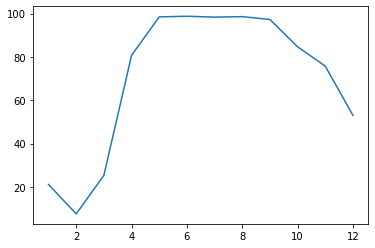

In [351]:
per.plot()

<AxesSubplot:>

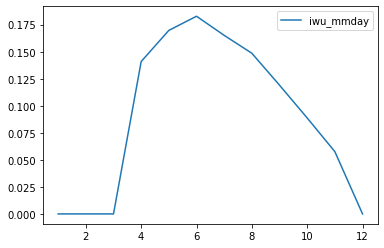

In [352]:
iwu.plot()

In [353]:
iwu.loc[dm.index]

iwu_mmday
4    0.140885
5    0.169685
6    0.182744
7    0.165085
8    0.148538
9    0.119008
10   0.088692
11   0.057557
12   0.000000

In [354]:
iwu

iwu_mmday
1    0.000000
2    0.000000
3    0.000000
4    0.140885
5    0.169685
6    0.182744
7    0.165085
8    0.148538
9    0.119008
10   0.088692
11   0.057557
12   0.000000

In [355]:
iwu.mean()

iwu_mmday    0.08935
dtype: float64

In [356]:
dm

4     80.689655
5     98.442714
6     98.735632
7     98.331479
8     98.553949
9     97.241379
10    84.649611
11    75.747126
12    53.058954
Name: p, dtype: float64

In [357]:
se_out = df_se
se_out

start_date_se end_date_se start_date_irri end_date_irri          se  \
0     1981-02-01  1981-08-09      1981-03-26    1982-01-19  116.772803   
1     1981-08-09  1982-10-06      1982-04-12    1983-01-24  252.635430   
2     1982-10-06  1983-10-07      1983-04-29    1984-01-26  263.446825   
3     1983-10-07  1984-09-08      1984-06-08    1985-01-23  224.199922   
4     1984-09-08  1985-09-03      1985-04-14    1986-01-25  244.751888   
5     1985-09-03  1986-08-17      1986-03-31    1987-01-30  236.999423   
6     1986-08-17  1987-07-18      1987-04-12    1988-01-27  380.418158   
7     1987-07-18  1988-10-06      1988-03-27    1989-01-29  411.906028   
8     1988-10-06  1989-08-24      1989-03-24    1990-01-29   83.992753   
9     1989-08-24  1990-08-20      1990-03-10    1991-01-29  180.825127   
10    1990-08-20  1991-09-25      1991-02-17    1992-01-29  161.573691   
11    1991-09-25  1992-08-07      1992-03-25    1993-01-28  109.177508   
12    1992-08-07  1993-07-14      1993-02-21    1994-01-17  176.044830   
13    1993-07-14  1994-08-09      1994-04-14    1995-01-18  499.377149   
14    1994-08-09  1995-08-25      1995-04-04    1996-01-28  338.467993   
15    1995-08-25  1996-08-27      1996-01-29    1997-01-27   26.201160   
16    1996-08-27  1997-10-08      1997-03-18    1998-01-27  133.792840   
17    1997-10-08  1998-08-20      1998-04-30    1999-01-23  194.790620   
18    1998-08-20  1999-09-20      1999-03-05    2000-01-24  440.308539   
19    1999-09-20  2000-08-20      2000-04-01    2001-01-26  226.657728   
20    2000-08-20  2001-09-06      2001-03-26    2002-01-25   93.997350   
21    2001-09-06  2002-10-04      2002-08-11    2003-01-25  627.481529   
22    2002-10-04  2003-08-28      2003-03-09    2004-01-26  248.786504   
23    2003-08-28  2004-09-20      2004-03-22    2005-01-24   91.252752   
24    2004-09-20  2005-09-09      2005-03-19    2006-01-25  203.191956   
25    2005-09-09  2006-07-27      2006-04-19    2007-01-16  183.104764   
26    2006-07-27  2007-05-06      2007-03-24    2008-01-17  234.403437   
27    2007-05-06  2008-07-02      2008-04-05    2009-01-22  450.620684   
28    2008-07-02  2009-09-30      2009-03-28    2010-01-24  124.748919   
29    2009-09-30  2010-01-26      2010-01-25    2010-01-26  120.157142   

           f    se_used   iwu_mean  days_irri  
0   0.279282  32.612571  32.612571        299  
1   0.129089  32.612571  32.612571        287  
2   0.123792  32.612571  32.612571        272  
3   0.145462  32.612571  32.612571        229  
4   0.133247  32.612571  32.612571        286  
5   0.137606  32.612571  32.612571        305  
6   0.085728  32.612571  32.612571        290  
7   0.079175  32.612571  32.612571        308  
8   0.388278  32.612571  32.612571        311  
9   0.180354  32.612571  32.612571        325  
10  0.201843  32.612571  32.612571        346  
11  0.298711  32.612571  32.612571        309  
12  0.185252  32.612571  32.612571        330  
13  0.065306  32.612571  32.612571        279  
14  0.096353  32.612571  32.612571        299  
15  1.000000  26.201160  32.612571        364  
16  0.243754  32.612571  32.612571        315  
17  0.167424  32.612571  32.612571        268  
18  0.074068  32.612571  32.612571        325  
19  0.143885  32.612571  32.612571        300  
20  0.346952  32.612571  32.612571        305  
21  0.051974  32.612571  32.612571        167  
22  0.131087  32.612571  32.612571        323  
23  0.357387  32.612571  32.612571        308  
24  0.160501  32.612571  32.612571        312  
25  0.178109  32.612571  32.612571        272  
26  0.139130  32.612571  32.612571        299  
27  0.072373  32.612571  32.612571        292  
28  0.261426  32.612571  32.612571        302  
29  0.271416  32.612571  32.612571          1

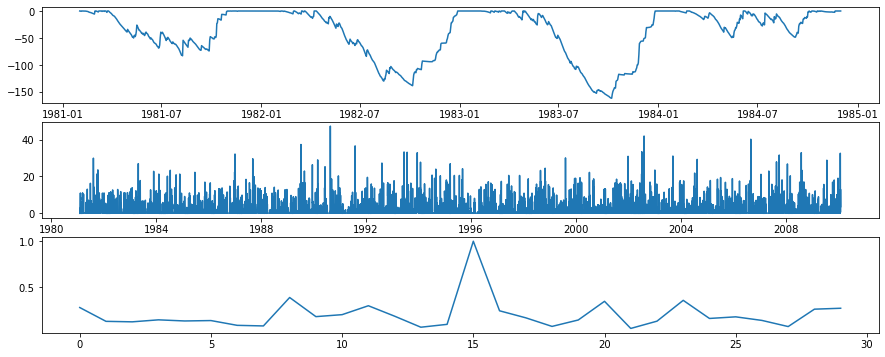

In [358]:
out.index = pd.to_datetime(out.index)
# se_out.index = pd.to_datetime(se_out.index)

fig=plt.figure(figsize=(15,6))
ax = fig.add_subplot(311)
ax.plot(out.index[0:1400],out.sd2[0:1400])
# ax.plot(out.index,out.se2)

ax = fig.add_subplot(312)
ax.plot(out.index, out.p_irri)

ax = fig.add_subplot(313)
ax.plot(se_out.index, se_out.f)

In [359]:
f

0.27141599989672066

In [360]:
se_out.f.mean()

0.20429883972967353

In [361]:
se_out

start_date_se end_date_se start_date_irri end_date_irri          se  \
0     1981-02-01  1981-08-09      1981-03-26    1982-01-19  116.772803   
1     1981-08-09  1982-10-06      1982-04-12    1983-01-24  252.635430   
2     1982-10-06  1983-10-07      1983-04-29    1984-01-26  263.446825   
3     1983-10-07  1984-09-08      1984-06-08    1985-01-23  224.199922   
4     1984-09-08  1985-09-03      1985-04-14    1986-01-25  244.751888   
5     1985-09-03  1986-08-17      1986-03-31    1987-01-30  236.999423   
6     1986-08-17  1987-07-18      1987-04-12    1988-01-27  380.418158   
7     1987-07-18  1988-10-06      1988-03-27    1989-01-29  411.906028   
8     1988-10-06  1989-08-24      1989-03-24    1990-01-29   83.992753   
9     1989-08-24  1990-08-20      1990-03-10    1991-01-29  180.825127   
10    1990-08-20  1991-09-25      1991-02-17    1992-01-29  161.573691   
11    1991-09-25  1992-08-07      1992-03-25    1993-01-28  109.177508   
12    1992-08-07  1993-07-14      1993-02-21    1994-01-17  176.044830   
13    1993-07-14  1994-08-09      1994-04-14    1995-01-18  499.377149   
14    1994-08-09  1995-08-25      1995-04-04    1996-01-28  338.467993   
15    1995-08-25  1996-08-27      1996-01-29    1997-01-27   26.201160   
16    1996-08-27  1997-10-08      1997-03-18    1998-01-27  133.792840   
17    1997-10-08  1998-08-20      1998-04-30    1999-01-23  194.790620   
18    1998-08-20  1999-09-20      1999-03-05    2000-01-24  440.308539   
19    1999-09-20  2000-08-20      2000-04-01    2001-01-26  226.657728   
20    2000-08-20  2001-09-06      2001-03-26    2002-01-25   93.997350   
21    2001-09-06  2002-10-04      2002-08-11    2003-01-25  627.481529   
22    2002-10-04  2003-08-28      2003-03-09    2004-01-26  248.786504   
23    2003-08-28  2004-09-20      2004-03-22    2005-01-24   91.252752   
24    2004-09-20  2005-09-09      2005-03-19    2006-01-25  203.191956   
25    2005-09-09  2006-07-27      2006-04-19    2007-01-16  183.104764   
26    2006-07-27  2007-05-06      2007-03-24    2008-01-17  234.403437   
27    2007-05-06  2008-07-02      2008-04-05    2009-01-22  450.620684   
28    2008-07-02  2009-09-30      2009-03-28    2010-01-24  124.748919   
29    2009-09-30  2010-01-26      2010-01-25    2010-01-26  120.157142   

           f    se_used   iwu_mean  days_irri  
0   0.279282  32.612571  32.612571        299  
1   0.129089  32.612571  32.612571        287  
2   0.123792  32.612571  32.612571        272  
3   0.145462  32.612571  32.612571        229  
4   0.133247  32.612571  32.612571        286  
5   0.137606  32.612571  32.612571        305  
6   0.085728  32.612571  32.612571        290  
7   0.079175  32.612571  32.612571        308  
8   0.388278  32.612571  32.612571        311  
9   0.180354  32.612571  32.612571        325  
10  0.201843  32.612571  32.612571        346  
11  0.298711  32.612571  32.612571        309  
12  0.185252  32.612571  32.612571        330  
13  0.065306  32.612571  32.612571        279  
14  0.096353  32.612571  32.612571        299  
15  1.000000  26.201160  32.612571        364  
16  0.243754  32.612571  32.612571        315  
17  0.167424  32.612571  32.612571        268  
18  0.074068  32.612571  32.612571        325  
19  0.143885  32.612571  32.612571        300  
20  0.346952  32.612571  32.612571        305  
21  0.051974  32.612571  32.612571        167  
22  0.131087  32.612571  32.612571        323  
23  0.357387  32.612571  32.612571        308  
24  0.160501  32.612571  32.612571        312  
25  0.178109  32.612571  32.612571        272  
26  0.139130  32.612571  32.612571        299  
27  0.072373  32.612571  32.612571        292  
28  0.261426  32.612571  32.612571        302  
29  0.271416  32.612571  32.612571          1